### Importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoCV, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,RepeatedKFold,KFold, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error, mean_absolute_error
import shap
from xgboost import XGBRegressor
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from mlxtend.regressor import StackingRegressor
from scipy import stats
from dataprep.eda import create_report
import warnings
warnings.filterwarnings('ignore')

#Loading the datasets
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


### EDA

In [ ]:
#Getting details about the dataset
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

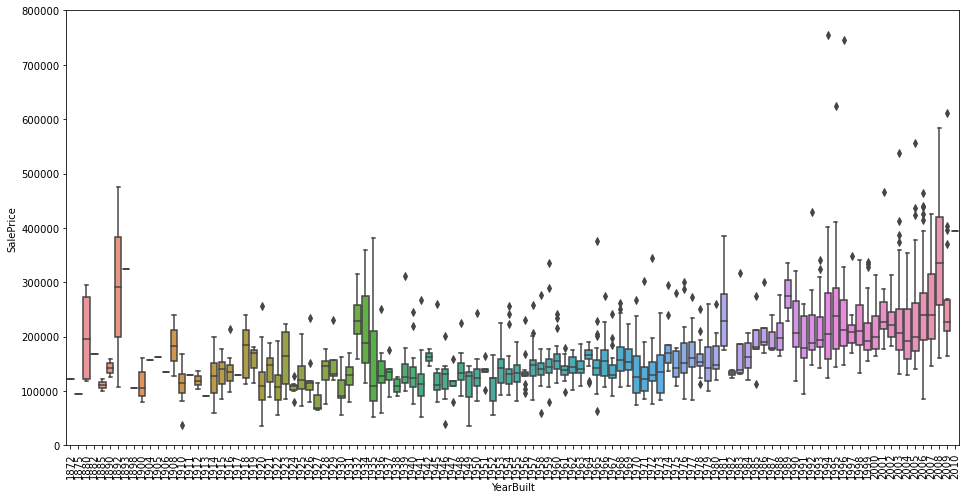

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
#Checking the Target variable's details
print("Saleprice(target variable) details:")
print(train['SalePrice'].describe())

Saleprice(target variable) details:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
#Checking null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

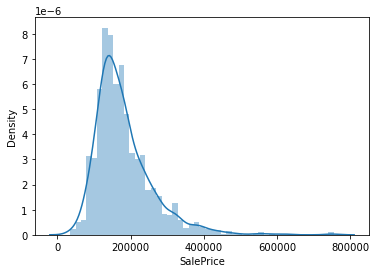

In [ ]:
#Removing the target variable skewness
sns.distplot(train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

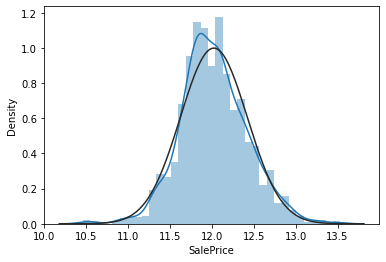

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)

In [ ]:
#Checking the correlation with target variable
corr = train.corr()
print(corr["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

<AxesSubplot:xlabel='OverallQual'>

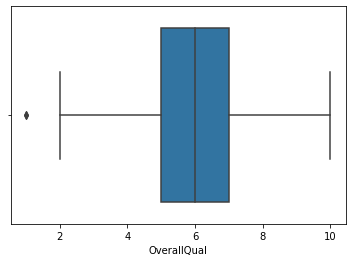

In [ ]:
sns.boxplot(x=train["OverallQual"])

<AxesSubplot:xlabel='GrLivArea'>

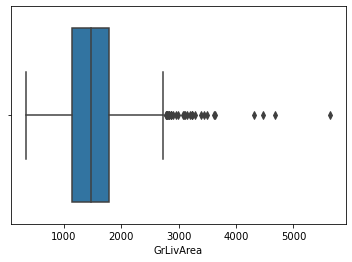

In [ ]:
sns.boxplot(x=train["GrLivArea"])

In [ ]:
sns.boxplot(x=train["GarageCars"])

<AxesSubplot:xlabel='GarageCars'>

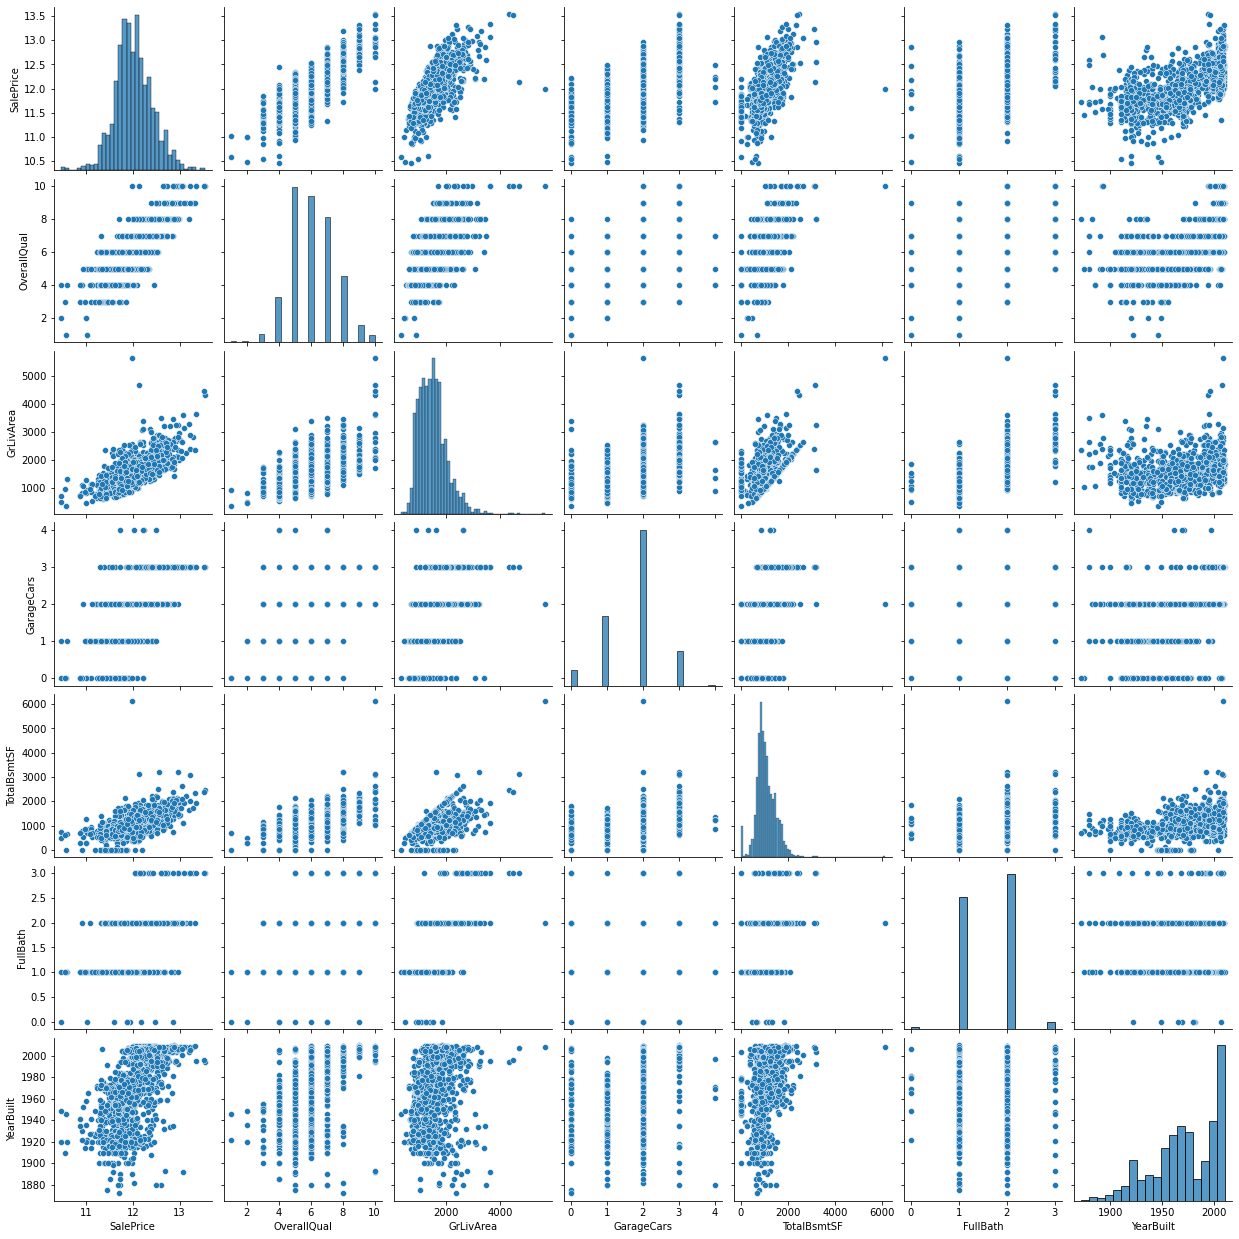

In [ ]:
#Plotting the relation of top correlated features with the target
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(65,60))
sns.set(font_scale=2)
ax = sns.heatmap(train.corr(), annot=True, annot_kws={"fontsize":30},fmt=".2f")

# plt.savefig('heatmap.png')

### Model 1

In [ ]:
#Model 1
# Score on Kaggle: 0.20

#Loading the datasets
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

#Getting details about the dataset
train.describe()

#Checking the Target variable's details
train['SalePrice'].describe()

#Checking null values
train.isnull().sum()

#Detailed report of dataset
# create_report(train)

#Removing the target variable skewness
# sns.distplot(train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])
# sns.distplot(train['SalePrice'], fit=norm)

#Checking the correlation with target variable
corr = train.corr()
# print(corr["SalePrice"].sort_values(ascending=False))

#Plotting the relation of top correlated features with the target
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train[cols])

#Seperating target and features
y = train['SalePrice']
test_id = test['Id']
all_data = pd.concat([train, test], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

#Checking the percentage of null values and deleting columns with missing values greater than 5
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
all_data.isnull().sum().max()
total = all_data.isnull().sum().sort_values(ascending=False)

#Filling numerical values with 0 
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)


#Filling categorical values with mode
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data.drop(['Utilities'], axis=1, inplace=True)

#encoding the data
all_data = pd.get_dummies(all_data)

#Seperating traing and testing data
train_data =all_data[:len(y)]
test_data = all_data[len(y):]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(train_data,y,test_size=.20,random_state=42)

#Applying model and grid search to get best parameters
model1=DecisionTreeRegressor(random_state=42)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(8,13)})
grid1.fit(X_train,Y_train)
grid1.best_params_
regressor1=DecisionTreeRegressor(random_state=42,max_depth=8)
regressor1.fit(X_train,Y_train)
pred1=regressor1.predict(X_test)
pred_main=regressor1.predict(test_data)
print(f"Root Mean Squared Error: {mean_squared_error(Y_test,pred1,squared=False)}")

submission = pd.DataFrame(test_id, columns = ['Id'])
test_pre = np.expm1(pred_main)
submission['SalePrice'] = test_pre
submission.to_csv("sub1.csv", index = False, header = True)

Root Mean Squared Error: 0.20155868402833862


### Model 2 

In [ ]:
# ----- MODEL 2 ----- 

# KAGGLE SCORE: 0.15219

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Drop duplicates in train and test datasets
df_train.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df_test.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total_test = df_test.isna().sum().sort_values(ascending=False)
percent_test = (df_test.isna().sum()/df_test.isna().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])

# Drop all columsn with more than 15% missing values
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_test = df_test.drop((missing_data_test[missing_data_test['Percent'] > 0.15]).index,1)


object_columns_df = df_train.select_dtypes(include=['object'])
columns_None = object_columns_df.columns
object_columns_df[columns_None] = object_columns_df[columns_None].fillna('None')

object_test_df = df_test.select_dtypes(include=['object'])
columns_test_None = object_test_df.columns
object_test_df[columns_test_None] = object_test_df[columns_test_None].fillna('None')

# Use pd.get_dummies for encoding
for x in object_columns_df.columns:
    object_columns_df[x] = pd.get_dummies(object_columns_df[x])
for x in object_test_df.columns:
    object_test_df[x] = pd.get_dummies(object_test_df[x])


numerical_columns_df = df_train.select_dtypes(exclude=['object'])
df_target = df_train['SalePrice']
numerical_columns_df = numerical_columns_df.drop(['SalePrice'], axis = 1)
numerical_test_df = df_test.select_dtypes(exclude=['object'])

# Fill null numerical values with most frequent value
for i in numerical_columns_df:
    numerical_columns_df[i] = numerical_columns_df[i].fillna(numerical_columns_df[i].mode()[0])
for i in numerical_test_df:
    numerical_test_df[i] = numerical_test_df[i].fillna(numerical_test_df[i].mode()[0])

# Concatenate the train and test object columns & numerical columns
df_concat = pd.concat([object_columns_df, numerical_columns_df], axis=1)
df_test_concat = pd.concat([object_test_df, numerical_test_df], axis=1)

total_concat = df_concat.isna().sum().sort_values(ascending=False)
percent_concat = (df_concat.isna().sum()/df_concat.isna().count()).sort_values(ascending=False)
missing_data_concat = pd.concat([total_concat, percent_concat], axis=1, keys=['Total', 'Percent'])


X = df_concat
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test_concat = scaler.transform(df_test_concat)

# Apply Random Forest Classifier
regr = RandomForestRegressor(max_depth=10, random_state=42)
regr.fit(X_train, y_train)

# Printing Score of the models
print ("Training score:", regr.score(X_train, y_train), "\nTest Score:", regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
y_pred_test = regr.predict(df_test_concat)

y_pred_test_df = pd.DataFrame(y_pred_test)

output = pd.merge(df_test['Id'], y_pred_test_df, how = 'left', left_index = True, right_index = True)
output.columns = ['Id', 'SalePrice']

# output.to_csv('Model_2.csv', index=False)

Training score: 0.9719673560050245 
Test Score: 0.898649619108782


### Model 3

In [ ]:
#--------MODEL_3--------

#SCORE FOR THE MODEL ON KAGGLE IS - 0.15483

#Steps ->
# 1) Cleansing 
# 2) Data Preprocessing
# 3) Encoding
# 4) Transformation
# 5) Train Test Split
# 6) Model 


# Importing Train and Test data.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Preparing Data for model by dropping target variable and creating a array of only target variable.
y = train[['Id','SalePrice']]
train = train.drop('SalePrice',axis=1)

#Concatenating data for pre-processing purpose.
combine = [train,test]
x = pd.concat(combine).reset_index(drop=True);

#Drop columns from dataframe, which are having 95% null values.
train_test = x.iloc[:,[17,19,20,26,27,30,38,40,43,46,49,53,54,56,58,60,61,62]]

# #Fill null values with the most frequent and the median of that dataframe.

train_test['MasVnrArea'].fillna(0,inplace=True)
train_test['BsmtQual'].fillna('None', inplace = True)
train_test['GarageType'].fillna('None', inplace = True)
train_test['GarageFinish'].fillna('None', inplace = True)
train_test['TotalBsmtSF'].fillna(value=train_test['TotalBsmtSF'].median(),inplace=True)
train_test['KitchenQual'] = train_test['KitchenQual'].fillna(method = "ffill")
train_test['GarageCars'].fillna(value=train_test['GarageCars'].median(),inplace=True)
train_test['GarageArea'].fillna(value=train_test['GarageArea'].median(),inplace=True)

#Label encoding the categorical variables to process in model.
#Encoding.
LabelEncoder_X = LabelEncoder()
train_test['ExterQual']= LabelEncoder_X.fit_transform(train_test['ExterQual'])
train_test['BsmtQual']= LabelEncoder_X.fit_transform(train_test['BsmtQual'])
train_test['HeatingQC']= LabelEncoder_X.fit_transform(train_test['HeatingQC'])
train_test['KitchenQual']= LabelEncoder_X.fit_transform(train_test['KitchenQual'])
train_test['GarageType']= LabelEncoder_X.fit_transform(train_test['GarageType'])
train_test['GarageFinish']= LabelEncoder_X.fit_transform(train_test['GarageFinish'])

#Transformation
SS= StandardScaler()  
train_test  =    SS.fit_transform(train_test)
train_ss    = pd.DataFrame(train_test[:1460])
test_ss = pd.DataFrame(train_test[1460:2920])


#Split train and test split.
X = train_ss
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.2, random_state=42)

#Gradient Boosting Regressor Model
GBM = GradientBoostingRegressor(random_state=0)
GBM.fit(X_train, y_train)

#Printing Score of the models
print ("Training score:",GBM.score(X_train,y_train),"Test Score:",GBM.score(X_test,y_test))

y_pred_gbm = pd.DataFrame(GBM.predict(test_ss))


Y_pred_final = pd.merge(test['Id'], y_pred_gbm, how = 'left',left_index = True, right_index = True)
Y_pred_final.columns = ['Id', 'SalePrice']
Y_pred_final.to_csv('Model_1.csv',index=False)

Training score: 0.9431181717980018 Test Score: 0.8937900783894773


### Model 4

In [ ]:
#Model 4
# Importing all the libraries
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

# Loading the train dataset and displaying it
df_train_ds = pd.read_csv("train.csv")

# Visualizing the target variable (SalePrice) and removing the positive skewness.
# Graph 1 displays the skewness of the target variable.
# g_1 = sns.histplot(data=df_train_ds, x = df_train_ds['SalePrice'], kde=True)
# plt.show()
df_train_ds['SalePrice'] = np.log1p(df_train_ds['SalePrice'])
# Graph 2 displays distplot of the target variable after normalizing.
# g_2 = sns.distplot(df_train_ds['SalePrice'],fit=norm);
# plt.show()

# Dropping the target column and storing it in a new dataframe
df_target_ds = pd.DataFrame(df_train_ds['SalePrice'],columns=['SalePrice'])
df_train_ds = df_train_ds.drop(['SalePrice'],axis=1)

# Dropping Duplicate values if any
# print("Shape before dropping duplicates:",df_train_ds.shape,"\n")
df_train_ds.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
# print("Shape after dropping duplicates:",df_train_ds.shape)

# Checking for NULL/NAN values and dropping columns having null values greater than 50%
total = df_train_ds.isna().sum().sort_values(ascending=False)
percent = (df_train_ds.isna().sum()/df_train_ds.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print("Missing data columns with null value percentage:\n",missing_data.head(25))
# print("Shape before dropping columns having null values greater than 50%:",df_train_ds.shape,"\n")
df_train_ds = df_train_ds.drop((missing_data[missing_data['Percent'] > 0.50]).index,1)
# print("Shape before after columns having null values greater than 50%:\n",df_train_ds.shape,"\n")
# print("Checking for other columns having null values less than 50%:\n",df_train_ds.isna().sum().sort_values(ascending=False).head(20))

# Filling NULL/NAN Values
df_train_ds['FireplaceQu']= df_train_ds['FireplaceQu'].fillna('none')
df_train_ds['LotFrontage']= df_train_ds['LotFrontage'].fillna(df_train_ds['LotFrontage'].mode()[0])
df_train_ds['GarageYrBlt']= df_train_ds['GarageYrBlt'].fillna(0)
garage_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage_cols:
    df_train_ds[i]= df_train_ds[i].fillna('none')
basement_cols = ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
for i in basement_cols:
    df_train_ds[i]= df_train_ds[i].fillna('none')
df_train_ds['MasVnrType']= df_train_ds['MasVnrType'].fillna('none')
df_train_ds['MasVnrArea']= df_train_ds['MasVnrArea'].fillna(0)
df_train_ds['Electrical']= df_train_ds['Electrical'].fillna(df_train_ds['Electrical'].mode()[0])
# print("Checking for NULL/NAN Values:",df_train_ds.isna().sum().sum(),"\n")

# Normalizing the feature skewness (Log Transformation)
numerical_features = df_train_ds.dtypes[df_train_ds.dtypes != 'object'].index
skewed_features = df_train_ds[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
# print("Skewness of each feature:\n",high_skew)
for feature in high_skew.index:
    df_train_ds[feature] = np.log1p(df_train_ds[feature])

# Applying Label Encoding to columns with datatype "object".
le = preprocessing.LabelEncoder()
for x in df_train_ds.columns:
    if df_train_ds[x].dtype != 'int64' or df_train_ds[x].dtype != 'float64':
        df_train_ds[x] = le.fit_transform(df_train_ds[x])

# Plotting a Heatmap to visualize correlation between the features and the target variable. 
final_ds = pd.concat([df_train_ds,df_target_ds],axis=1)
# plt.figure(figsize=(40,40)) 
# g_3 = sns.heatmap(final_ds.corr(),annot_kws={'size': 12},fmt='.2f',annot=True)

# Storing the dataframe in X and y variables
X_ds = df_train_ds.iloc[:,1:]
y_ds = df_target_ds
# print("Features:",X_ds,"\n")
# print("Target:",y_ds,"\n")

# Applying Standard Scaler and PCA.
sc_ds = StandardScaler()
X_train_ds, X_val_ds, y_train_ds, y_val_ds = train_test_split(X_ds, y_ds, test_size = 0.20, random_state = 1)
X_train_ds = sc_ds.fit_transform(X_train_ds)
X_val_ds = sc_ds.transform(X_val_ds) 

pca_ds = PCA(n_components = 0.98)
X_train_ds = pca_ds.fit_transform(X_train_ds)
X_val_ds = pca_ds.transform(X_val_ds)

# Applying the XGBoost Regressor model
xgb_r = xg.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=2200, random_state =7)

xgb_r.fit(X_train_ds, y_train_ds)

# Predict the model
pred_ds = xgb_r.predict(X_val_ds)

# RMSE Computation
rmse_ds = np.sqrt(MSE(y_val_ds, pred_ds))
print("Root Mean Squared Error : % f" %(rmse_ds))

# Loading the test dataset, storing ID column in a different variable and using similar preprocessing techniques.
df_test_ds = pd.read_csv("test.csv")
df_test_id = df_test_ds['Id']
# print("Shape before dropping duplicates:",df_test_ds.shape,"\n")
df_test_ds.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
# print("Shape after dropping duplicates:",df_test_ds.shape)
total_test = df_test_ds.isna().sum().sort_values(ascending=False)
percent_test = (df_test_ds.isna().sum()/df_test_ds.isna().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
# print("Missing test data columns with null value percentage:\n",missing_data_test.head(25))
# print("Shape before dropping columns having null values greater than 80%:",df_test_ds.shape,"\n")
df_test_ds = df_test_ds.drop((missing_data_test[missing_data_test['Percent'] > 0.80]).index,1)
# print("Shape before after columns having null values greater than 80%:",df_test_ds.shape,"\n")
# print("Checking for other columns having null values less than 80%:\n",df_test_ds.isna().sum().sort_values(ascending=False).head(30))
df_test_ds['FireplaceQu']= df_test_ds['FireplaceQu'].fillna('none')
df_test_ds['LotFrontage']= df_test_ds['LotFrontage'].fillna(df_test_ds['LotFrontage'].mode()[0])
df_test_ds['GarageYrBlt']= df_test_ds['GarageYrBlt'].fillna(0)
garage_cols_test = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage_cols_test:
    df_test_ds[i]= df_test_ds[i].fillna('none')
basement_cols_test = ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
for i in basement_cols_test:
    df_test_ds[i]= df_test_ds[i].fillna('none')
df_test_ds['MasVnrType']= df_test_ds['MasVnrType'].fillna('none')
df_test_ds['MasVnrArea']= df_test_ds['MasVnrArea'].fillna(0)
# df_test['Electrical']= df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test_ds['MSZoning']= df_test_ds['MSZoning'].fillna(df_test_ds['MSZoning'].mode()[0])
df_test_ds['BsmtHalfBath']= df_test_ds['BsmtHalfBath'].fillna(df_test_ds['BsmtHalfBath'].mode()[0])
df_test_ds['Utilities']= df_test_ds['Utilities'].fillna(df_test_ds['Utilities'].mode()[0])
df_test_ds['Functional']= df_test_ds['Functional'].fillna(df_test_ds['Functional'].mode()[0])
df_test_ds['BsmtFullBath']= df_test_ds['BsmtFullBath'].fillna(df_test_ds['BsmtFullBath'].mode()[0])
df_test_ds['BsmtUnfSF']= df_test_ds['BsmtUnfSF'].fillna(df_test_ds['BsmtUnfSF'].mode()[0])
df_test_ds['SaleType']= df_test_ds['SaleType'].fillna(df_test_ds['SaleType'].mode()[0])
df_test_ds['BsmtFinSF2']= df_test_ds['BsmtFinSF2'].fillna(0)
df_test_ds['BsmtFinSF1']= df_test_ds['BsmtFinSF1'].fillna(0)
df_test_ds['Exterior2nd']= df_test_ds['Exterior2nd'].fillna(df_test_ds['Exterior2nd'].mode()[0])
df_test_ds['Exterior1st']= df_test_ds['Exterior1st'].fillna(df_test_ds['Exterior1st'].mode()[0])
df_test_ds['TotalBsmtSF']= df_test_ds['TotalBsmtSF'].fillna(0)
df_test_ds['GarageCars']= df_test_ds['GarageCars'].fillna(0)
df_test_ds['KitchenQual']= df_test_ds['KitchenQual'].fillna(df_test_ds['KitchenQual'].mode()[0])
df_test_ds['GarageArea']= df_test_ds['GarageArea'].fillna(0)
# print("Checking for NULL/NAN Values:",df_test_ds.isna().sum().sort_values(ascending=False).head(30))
numerical_features_test = df_test_ds.dtypes[df_test_ds.dtypes != 'object'].index
skewed_features_test = df_test_ds[numerical_features_test].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew_test = skewed_features_test[abs(skewed_features_test) > 0.5]
# print("Skewness of each feature:\n",high_skew_test)
for feature in high_skew_test.index:
    df_test_ds[feature] = np.log1p(df_test_ds[feature])
# print("Detail of the Test dataset:",df_test_ds.info())
for y in df_test_ds.columns:
    if df_test_ds[y].dtype != 'int64' or df_test_ds[y].dtype != 'float64':
        df_test_ds[y] = le.fit_transform(df_test_ds[y])
# print("Test Dataset after preprocessing:",df_test_ds)  
df_test_ds = df_test_ds.drop(['Id'],axis=1)
df_test_ds = sc_ds.transform(df_test_ds) 
df_test_ds = pca_ds.transform(df_test_ds) 
pred_sub = np.floor(np.expm1(xgb_r.predict(df_test_ds)))
final_ds = pd.DataFrame(df_test_id,columns=['Id'])
final_ds['SalePrice'] = pd.DataFrame(pred_sub)
# print("Final Submission on Kaggle:\n",final_ds)
final_ds.to_csv('submission_model_4.csv', index = False)

Root Mean Squared Error :  0.129648


### Model 5

In [ ]:
#--------MODEL_5--------

#Model implemented by using blending an ensemble machine learning algorithm.
#SCORE FOR THE MODEL ON KAGGLE IS - 0.13449

#Steps ->
# 1) Cleaning 
# 2) Data Preprocessing
# 3) Encoding
# 4) Transformation
# 5) Train Test Split
# 6) Model applied and then performed model Ensembling technique Blending

# Importing Train and Test data into the notebook.
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

#Preparing Data for model by dropping target variable and creating a array of only target variable.
y = train[['Id','SalePrice']]
train = train.drop('SalePrice',axis=1)

#Concatenating data for pre-processing purpose.
all_dfs = [train,test]
all_df = pd.concat(all_dfs).reset_index(drop=True);

#Drop columns from dataframe, which are having 95% null values.
all_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],axis=1,inplace=True)

#Fill null values with the most frequent and the median of that dataframe.
all_df['LotFrontage'].fillna(value=all_df['LotFrontage'].median(),inplace=True)
all_df['MasVnrType'].fillna(value='None',inplace=True)
all_df['MasVnrArea'].fillna(0,inplace=True)
all_df['BsmtCond'].fillna(value='TA',inplace=True)
all_df['BsmtExposure'].fillna(value='No',inplace=True)
all_df['Electrical'].fillna(value='SBrkr',inplace=True)
all_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
all_df['GarageType'].fillna(value='Attchd',inplace=True)
all_df['GarageYrBlt'].fillna(value=all_df['GarageYrBlt'].median(),inplace=True)
all_df['GarageFinish'].fillna(value='Unf',inplace=True)
all_df['GarageQual'].fillna(value='TA',inplace=True)
all_df['GarageCond'].fillna(value='TA',inplace=True)
all_df['BsmtFinType1'].fillna(value='NO',inplace=True)
all_df['BsmtQual'].fillna(value='No',inplace=True)
all_df['BsmtFullBath'].fillna(value=all_df['BsmtFullBath'].median(),inplace=True)
all_df['BsmtFinSF1'].fillna(value=all_df['BsmtFinSF1'].median(),inplace=True)
all_df['BsmtFinSF2'].fillna(value=0,inplace=True)
all_df['BsmtUnfSF'].fillna(value=0,inplace=True)
all_df['TotalBsmtSF'].fillna(value=all_df['TotalBsmtSF'].median(),inplace=True)
all_df['BsmtHalfBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=all_df['GarageCars'].median(),inplace=True)
all_df['GarageArea'].fillna(value=all_df['GarageArea'].median(),inplace=True)


#Label encoding the categorical variables to process in model.
#Encoding.
labelencoder=LabelEncoder()
all_df['MSZoning']      = labelencoder.fit_transform(all_df['MSZoning'].astype(str))
all_df['Exterior1st']   = labelencoder.fit_transform(all_df['Exterior1st'].astype(str))
all_df['Exterior2nd']   = labelencoder.fit_transform(all_df['Exterior2nd'].astype(str))
all_df['KitchenQual']   = labelencoder.fit_transform(all_df['KitchenQual'].astype(str))
all_df['Functional']    = labelencoder.fit_transform(all_df['Functional'].astype(str))
all_df['SaleType']      = labelencoder.fit_transform(all_df['SaleType'].astype(str))
all_df['Street']        = labelencoder.fit_transform(all_df['Street'])   
all_df['LotShape']      = labelencoder.fit_transform(all_df['LotShape'])   
all_df['LandContour']   = labelencoder.fit_transform(all_df['LandContour'])   
all_df['LotConfig']     = labelencoder.fit_transform(all_df['LotConfig'])   
all_df['LandSlope']     = labelencoder.fit_transform(all_df['LandSlope'])   
all_df['Neighborhood']  = labelencoder.fit_transform(all_df['Neighborhood'])   
all_df['Condition1']    = labelencoder.fit_transform(all_df['Condition1'])   
all_df['Condition2']    = labelencoder.fit_transform(all_df['Condition2'])   
all_df['BldgType']      = labelencoder.fit_transform(all_df['BldgType'])   
all_df['HouseStyle']    = labelencoder.fit_transform(all_df['HouseStyle'])   
all_df['RoofStyle']     = labelencoder.fit_transform(all_df['RoofStyle'])   
all_df['RoofMatl']      = labelencoder.fit_transform(all_df['RoofMatl'])    
all_df['MasVnrType']    = labelencoder.fit_transform(all_df['MasVnrType'])   
all_df['ExterQual']     = labelencoder.fit_transform(all_df['ExterQual'])  
all_df['ExterCond']     = labelencoder.fit_transform(all_df['ExterCond'])   
all_df['Foundation']    = labelencoder.fit_transform(all_df['Foundation'])   
all_df['BsmtQual']      = labelencoder.fit_transform(all_df['BsmtQual'])   
all_df['BsmtCond']      = labelencoder.fit_transform(all_df['BsmtCond'])   
all_df['BsmtExposure']  = labelencoder.fit_transform(all_df['BsmtExposure'])   
all_df['BsmtFinType1']  = labelencoder.fit_transform(all_df['BsmtFinType1'])   
all_df['BsmtFinType2']  = labelencoder.fit_transform(all_df['BsmtFinType2'])   
all_df['Heating']       = labelencoder.fit_transform(all_df['Heating'])   
all_df['HeatingQC']     = labelencoder.fit_transform(all_df['HeatingQC'])   
all_df['CentralAir']    = labelencoder.fit_transform(all_df['CentralAir'])   
all_df['Electrical']    = labelencoder.fit_transform(all_df['Electrical'])    
all_df['GarageType']    = labelencoder.fit_transform(all_df['GarageType'])  
all_df['GarageFinish']  = labelencoder.fit_transform(all_df['GarageFinish'])   
all_df['GarageQual']    = labelencoder.fit_transform(all_df['GarageQual'])  
all_df['GarageCond']    = labelencoder.fit_transform(all_df['GarageCond'])   
all_df['PavedDrive']    = labelencoder.fit_transform(all_df['PavedDrive'])  
all_df['SaleCondition'] = labelencoder.fit_transform(all_df['SaleCondition'])  

#Transformation
Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))
train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled = pd.DataFrame(all_scaled[1460:2920])

#Split train and test split.
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

#XGBRegressor Model
XGB = XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

#LGBMRegressor Model
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

#Printing Score of the models
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))
print ("Training score:",LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

y_pred_xgb  = pd.DataFrame( XGB.predict(test_scaled))
y_pred_lgbm = pd.DataFrame(LGBM.predict(test_scaled))

#Exploration of Blending an ensemble machine learning algorithm.
y_pred=pd.DataFrame()
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

y_pred.to_csv('Model_5_part.csv',index=False)

Training score: 0.9878463275580356 Test Score: 0.930856175748829
Training score: 0.9999557727264998 Test Score: 0.9101390980189892


# --------------------------------------------------------------------------------------------------------------

###  BEST MODEL

In [ ]:
train=pd.read_csv('AmesHousing.csv') #Getting extra data
test=pd.read_csv('test.csv')
train2=pd.read_csv('train.csv')

In [ ]:
train.columns = train.columns.str.replace(' ', '')
train=train.rename(columns={"YearRemod/Add": "YearRemodAdd"})


In [ ]:
print("Size of the Ames Dataset",len(train))
print("Size of the Housing Dataset",len(train2))
print("Size of the Housing Test Dataset",len(test))

Size of the Ames Dataset 2930
Size of the Housing Dataset 1460
Size of the Housing Test Dataset 1459


In [ ]:
data=pd.concat([train,train2,test], axis=0, sort=False)

In [ ]:
print("Size of the Housing Dataset",len(data))

Size of the Housing Dataset 5849


In [ ]:
useless = ['Id','PID','Order','SalePrice'] 
data = data.drop(useless, axis = 1)

In [ ]:
duplicate = data[data.duplicated(keep='last')].index
len(duplicate)
duplicate=duplicate[0:390]
train = train.drop(duplicate, axis = 0)
print('Length of the Ames Dataset now',len(train))

Length of the Ames Dataset now 2540


In [ ]:
training=pd.concat([train,train2], axis=0, sort=False)

useless = ['Id','PID','Order','Alley','PoolQC','MiscFeature','FireplaceQu','Fence','LotFrontage'] 
training = training.drop(useless, axis = 1)

useless = ['Alley','PoolQC','MiscFeature','FireplaceQu','Fence','LotFrontage'] 
test = test.drop(useless, axis = 1)

In [ ]:
# Separating Target and Features

target = training['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
training2 = training.drop(['SalePrice'], axis = 1)


# Concatenating train & test set

train_test = pd.concat([training2,test], axis=0, sort=False)

In [ ]:
# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)
train_test['OverallQual'] = train_test['OverallQual'].apply(str)
train_test['OverallCond'] = train_test['OverallCond'].apply(str)

In [ ]:
# Filling Categorical NaN (That we know how to fill due to the description file )

train_test['Functional'] = train_test['Functional'].fillna(train_test['Functional'].mode())
train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode())
train_test['KitchenQual'] = train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode())
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    train_test[col] = train_test[col].fillna(0)

# train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train['LotFrontage'].median())
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][1])

1    RH
1    RL
1    RL
Name: MSZoning, dtype: object
1    AllPub
1    AllPub
1    AllPub
Name: Utilities, dtype: object
1       None
1       None
1    BrkFace
Name: MasVnrType, dtype: object
1    SBrkr
1    SBrkr
1    SBrkr
Name: Electrical, dtype: object
1    TA
1    TA
1    Gd
Name: KitchenQual, dtype: object
1    Typ
1    Typ
1    Typ
Name: Functional, dtype: object
1    1961.0
1    1976.0
1    1958.0
Name: GarageYrBlt, dtype: float64


In [ ]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]
train_test['renovated']=train_test['YearRemodAdd']+train_test['YearBuilt']

In [ ]:
useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

In [ ]:
train_test_dummy = pd.get_dummies(train_test)
from scipy.stats import skew
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

In [ ]:
# Normalize skewed features using log_transformation
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i] )

In [ ]:
from scipy import stats
import statsmodels.api as sm
target_log = np.log1p(target)

In [ ]:
# Train-Test separation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train = train_test_dummy[0:4000]
X_test = train_test_dummy[4000:]

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [ ]:
# 10 Fold Cross validation
kf = KFold(n_splits=11, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Bayesian_Ridge_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

In [ ]:
# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          BayesianRidge()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

Learning rate set to 0.049112
0:	learn: 0.3788321	total: 114ms	remaining: 1m 53s
1:	learn: 0.3671160	total: 135ms	remaining: 1m 7s
2:	learn: 0.3554515	total: 157ms	remaining: 52.1s
3:	learn: 0.3448127	total: 181ms	remaining: 45s
4:	learn: 0.3351046	total: 203ms	remaining: 40.4s
5:	learn: 0.3249473	total: 222ms	remaining: 36.8s
6:	learn: 0.3158180	total: 233ms	remaining: 33.1s
7:	learn: 0.3064408	total: 246ms	remaining: 30.5s
8:	learn: 0.2974456	total: 257ms	remaining: 28.3s
9:	learn: 0.2892312	total: 268ms	remaining: 26.6s
10:	learn: 0.2813492	total: 280ms	remaining: 25.2s
11:	learn: 0.2739853	total: 293ms	remaining: 24.1s
12:	learn: 0.2673303	total: 303ms	remaining: 23s
13:	learn: 0.2605299	total: 316ms	remaining: 22.2s
14:	learn: 0.2543953	total: 326ms	remaining: 21.4s
15:	learn: 0.2487505	total: 337ms	remaining: 20.7s
16:	learn: 0.2428204	total: 348ms	remaining: 20.1s
17:	learn: 0.2373009	total: 357ms	remaining: 19.5s
18:	learn: 0.2320476	total: 368ms	remaining: 19s
19:	learn: 0.227

173:	learn: 0.1013295	total: 2.14s	remaining: 10.2s
174:	learn: 0.1010960	total: 2.15s	remaining: 10.1s
175:	learn: 0.1008322	total: 2.16s	remaining: 10.1s
176:	learn: 0.1006074	total: 2.17s	remaining: 10.1s
177:	learn: 0.1004794	total: 2.18s	remaining: 10.1s
178:	learn: 0.1002548	total: 2.19s	remaining: 10s
179:	learn: 0.1000821	total: 2.2s	remaining: 10s
180:	learn: 0.0998954	total: 2.21s	remaining: 9.99s
181:	learn: 0.0996876	total: 2.22s	remaining: 9.97s
182:	learn: 0.0996533	total: 2.23s	remaining: 9.94s
183:	learn: 0.0995936	total: 2.24s	remaining: 9.93s
184:	learn: 0.0994045	total: 2.25s	remaining: 9.92s
185:	learn: 0.0992580	total: 2.27s	remaining: 9.91s
186:	learn: 0.0990573	total: 2.28s	remaining: 9.9s
187:	learn: 0.0990260	total: 2.28s	remaining: 9.86s
188:	learn: 0.0988967	total: 2.29s	remaining: 9.85s
189:	learn: 0.0987197	total: 2.31s	remaining: 9.84s
190:	learn: 0.0985572	total: 2.32s	remaining: 9.83s
191:	learn: 0.0982852	total: 2.33s	remaining: 9.82s
192:	learn: 0.0982

332:	learn: 0.0805073	total: 3.93s	remaining: 7.88s
333:	learn: 0.0803845	total: 3.94s	remaining: 7.86s
334:	learn: 0.0802346	total: 3.95s	remaining: 7.85s
335:	learn: 0.0801382	total: 3.97s	remaining: 7.84s
336:	learn: 0.0801212	total: 3.98s	remaining: 7.83s
337:	learn: 0.0800178	total: 3.99s	remaining: 7.82s
338:	learn: 0.0798977	total: 4s	remaining: 7.81s
339:	learn: 0.0798473	total: 4.02s	remaining: 7.8s
340:	learn: 0.0797909	total: 4.03s	remaining: 7.79s
341:	learn: 0.0796689	total: 4.04s	remaining: 7.78s
342:	learn: 0.0796494	total: 4.05s	remaining: 7.77s
343:	learn: 0.0795062	total: 4.07s	remaining: 7.76s
344:	learn: 0.0794340	total: 4.08s	remaining: 7.75s
345:	learn: 0.0793015	total: 4.09s	remaining: 7.74s
346:	learn: 0.0791406	total: 4.11s	remaining: 7.73s
347:	learn: 0.0791212	total: 4.12s	remaining: 7.72s
348:	learn: 0.0790141	total: 4.13s	remaining: 7.71s
349:	learn: 0.0789984	total: 4.14s	remaining: 7.7s
350:	learn: 0.0788744	total: 4.16s	remaining: 7.69s
351:	learn: 0.078

496:	learn: 0.0667922	total: 5.88s	remaining: 5.95s
497:	learn: 0.0667237	total: 5.89s	remaining: 5.93s
498:	learn: 0.0667146	total: 5.9s	remaining: 5.92s
499:	learn: 0.0666440	total: 5.91s	remaining: 5.91s
500:	learn: 0.0665855	total: 5.92s	remaining: 5.9s
501:	learn: 0.0665293	total: 5.93s	remaining: 5.88s
502:	learn: 0.0664881	total: 5.94s	remaining: 5.87s
503:	learn: 0.0664434	total: 5.96s	remaining: 5.86s
504:	learn: 0.0663628	total: 5.97s	remaining: 5.85s
505:	learn: 0.0662765	total: 5.98s	remaining: 5.84s
506:	learn: 0.0662025	total: 5.99s	remaining: 5.83s
507:	learn: 0.0661420	total: 6s	remaining: 5.81s
508:	learn: 0.0660913	total: 6.01s	remaining: 5.8s
509:	learn: 0.0660166	total: 6.02s	remaining: 5.79s
510:	learn: 0.0659566	total: 6.03s	remaining: 5.77s
511:	learn: 0.0658631	total: 6.05s	remaining: 5.76s
512:	learn: 0.0658144	total: 6.06s	remaining: 5.75s
513:	learn: 0.0657038	total: 6.07s	remaining: 5.74s
514:	learn: 0.0656232	total: 6.09s	remaining: 5.73s
515:	learn: 0.0655

657:	learn: 0.0572871	total: 7.85s	remaining: 4.08s
658:	learn: 0.0572815	total: 7.86s	remaining: 4.07s
659:	learn: 0.0572397	total: 7.87s	remaining: 4.06s
660:	learn: 0.0572347	total: 7.89s	remaining: 4.04s
661:	learn: 0.0571501	total: 7.9s	remaining: 4.03s
662:	learn: 0.0570757	total: 7.92s	remaining: 4.02s
663:	learn: 0.0570517	total: 7.93s	remaining: 4.01s
664:	learn: 0.0569976	total: 7.94s	remaining: 4s
665:	learn: 0.0569399	total: 7.95s	remaining: 3.99s
666:	learn: 0.0568729	total: 7.96s	remaining: 3.98s
667:	learn: 0.0568251	total: 7.98s	remaining: 3.96s
668:	learn: 0.0567682	total: 7.99s	remaining: 3.95s
669:	learn: 0.0567126	total: 8.01s	remaining: 3.94s
670:	learn: 0.0566674	total: 8.02s	remaining: 3.93s
671:	learn: 0.0566091	total: 8.03s	remaining: 3.92s
672:	learn: 0.0565449	total: 8.04s	remaining: 3.91s
673:	learn: 0.0564485	total: 8.05s	remaining: 3.89s
674:	learn: 0.0564226	total: 8.06s	remaining: 3.88s
675:	learn: 0.0563468	total: 8.07s	remaining: 3.87s
676:	learn: 0.05

824:	learn: 0.0495907	total: 9.99s	remaining: 2.12s
825:	learn: 0.0495873	total: 10s	remaining: 2.11s
826:	learn: 0.0495592	total: 10s	remaining: 2.1s
827:	learn: 0.0495191	total: 10s	remaining: 2.08s
828:	learn: 0.0494565	total: 10s	remaining: 2.07s
829:	learn: 0.0494145	total: 10s	remaining: 2.06s
830:	learn: 0.0493889	total: 10.1s	remaining: 2.05s
831:	learn: 0.0493285	total: 10.1s	remaining: 2.03s
832:	learn: 0.0492812	total: 10.1s	remaining: 2.02s
833:	learn: 0.0492350	total: 10.1s	remaining: 2.01s
834:	learn: 0.0491813	total: 10.1s	remaining: 2s
835:	learn: 0.0491376	total: 10.1s	remaining: 1.99s
836:	learn: 0.0491245	total: 10.1s	remaining: 1.97s
837:	learn: 0.0490728	total: 10.1s	remaining: 1.96s
838:	learn: 0.0490408	total: 10.2s	remaining: 1.95s
839:	learn: 0.0489858	total: 10.2s	remaining: 1.94s
840:	learn: 0.0489478	total: 10.2s	remaining: 1.92s
841:	learn: 0.0489084	total: 10.2s	remaining: 1.91s
842:	learn: 0.0488845	total: 10.2s	remaining: 1.9s
843:	learn: 0.0488354	total

983:	learn: 0.0440403	total: 11.8s	remaining: 192ms
984:	learn: 0.0439843	total: 11.8s	remaining: 180ms
985:	learn: 0.0439520	total: 11.8s	remaining: 168ms
986:	learn: 0.0438996	total: 11.8s	remaining: 156ms
987:	learn: 0.0438803	total: 11.8s	remaining: 144ms
988:	learn: 0.0438565	total: 11.9s	remaining: 132ms
989:	learn: 0.0437981	total: 11.9s	remaining: 120ms
990:	learn: 0.0437748	total: 11.9s	remaining: 108ms
991:	learn: 0.0437097	total: 11.9s	remaining: 96ms
992:	learn: 0.0436648	total: 11.9s	remaining: 84ms
993:	learn: 0.0436453	total: 11.9s	remaining: 72ms
994:	learn: 0.0436113	total: 11.9s	remaining: 60ms
995:	learn: 0.0435826	total: 11.9s	remaining: 48ms
996:	learn: 0.0435455	total: 11.9s	remaining: 36ms
997:	learn: 0.0435054	total: 12s	remaining: 24ms
998:	learn: 0.0434823	total: 12s	remaining: 12ms
999:	learn: 0.0434559	total: 12s	remaining: 0us
Learning rate set to 0.049112
0:	learn: 0.3792161	total: 16.9ms	remaining: 16.8s
1:	learn: 0.3673086	total: 28.2ms	remaining: 14.1s


148:	learn: 0.1065123	total: 1.81s	remaining: 10.3s
149:	learn: 0.1064238	total: 1.82s	remaining: 10.3s
150:	learn: 0.1062113	total: 1.83s	remaining: 10.3s
151:	learn: 0.1059375	total: 1.84s	remaining: 10.3s
152:	learn: 0.1057203	total: 1.86s	remaining: 10.3s
153:	learn: 0.1056399	total: 1.87s	remaining: 10.3s
154:	learn: 0.1053237	total: 1.88s	remaining: 10.3s
155:	learn: 0.1050729	total: 1.9s	remaining: 10.3s
156:	learn: 0.1048380	total: 1.91s	remaining: 10.3s
157:	learn: 0.1046362	total: 1.92s	remaining: 10.2s
158:	learn: 0.1044100	total: 1.93s	remaining: 10.2s
159:	learn: 0.1041634	total: 1.95s	remaining: 10.2s
160:	learn: 0.1039570	total: 1.96s	remaining: 10.2s
161:	learn: 0.1038575	total: 1.97s	remaining: 10.2s
162:	learn: 0.1037782	total: 1.99s	remaining: 10.2s
163:	learn: 0.1035383	total: 2s	remaining: 10.2s
164:	learn: 0.1033871	total: 2.02s	remaining: 10.2s
165:	learn: 0.1031062	total: 2.03s	remaining: 10.2s
166:	learn: 0.1028920	total: 2.04s	remaining: 10.2s
167:	learn: 0.10

308:	learn: 0.0842290	total: 4.28s	remaining: 9.57s
309:	learn: 0.0841073	total: 4.29s	remaining: 9.55s
310:	learn: 0.0840009	total: 4.3s	remaining: 9.53s
311:	learn: 0.0838965	total: 4.31s	remaining: 9.5s
312:	learn: 0.0837698	total: 4.32s	remaining: 9.48s
313:	learn: 0.0836115	total: 4.33s	remaining: 9.46s
314:	learn: 0.0834696	total: 4.34s	remaining: 9.44s
315:	learn: 0.0833299	total: 4.35s	remaining: 9.42s
316:	learn: 0.0833119	total: 4.36s	remaining: 9.4s
317:	learn: 0.0832030	total: 4.37s	remaining: 9.38s
318:	learn: 0.0831004	total: 4.38s	remaining: 9.36s
319:	learn: 0.0829197	total: 4.4s	remaining: 9.34s
320:	learn: 0.0827690	total: 4.41s	remaining: 9.33s
321:	learn: 0.0825593	total: 4.42s	remaining: 9.31s
322:	learn: 0.0825338	total: 4.43s	remaining: 9.29s
323:	learn: 0.0824064	total: 4.44s	remaining: 9.27s
324:	learn: 0.0823184	total: 4.45s	remaining: 9.25s
325:	learn: 0.0822170	total: 4.46s	remaining: 9.23s
326:	learn: 0.0820691	total: 4.47s	remaining: 9.21s
327:	learn: 0.08

467:	learn: 0.0684859	total: 6.45s	remaining: 7.33s
468:	learn: 0.0684134	total: 6.46s	remaining: 7.32s
469:	learn: 0.0683525	total: 6.48s	remaining: 7.3s
470:	learn: 0.0682420	total: 6.49s	remaining: 7.29s
471:	learn: 0.0681740	total: 6.5s	remaining: 7.27s
472:	learn: 0.0680890	total: 6.51s	remaining: 7.25s
473:	learn: 0.0679695	total: 6.52s	remaining: 7.24s
474:	learn: 0.0678869	total: 6.53s	remaining: 7.22s
475:	learn: 0.0678156	total: 6.54s	remaining: 7.2s
476:	learn: 0.0677307	total: 6.55s	remaining: 7.18s
477:	learn: 0.0676315	total: 6.57s	remaining: 7.17s
478:	learn: 0.0675735	total: 6.58s	remaining: 7.15s
479:	learn: 0.0674491	total: 6.59s	remaining: 7.14s
480:	learn: 0.0674406	total: 6.6s	remaining: 7.12s
481:	learn: 0.0673846	total: 6.61s	remaining: 7.1s
482:	learn: 0.0672618	total: 6.62s	remaining: 7.08s
483:	learn: 0.0671983	total: 6.63s	remaining: 7.07s
484:	learn: 0.0671637	total: 6.64s	remaining: 7.05s
485:	learn: 0.0670819	total: 6.65s	remaining: 7.04s
486:	learn: 0.067

628:	learn: 0.0579656	total: 8.45s	remaining: 4.98s
629:	learn: 0.0579219	total: 8.46s	remaining: 4.97s
630:	learn: 0.0578472	total: 8.47s	remaining: 4.95s
631:	learn: 0.0578369	total: 8.48s	remaining: 4.94s
632:	learn: 0.0577830	total: 8.49s	remaining: 4.92s
633:	learn: 0.0577242	total: 8.51s	remaining: 4.91s
634:	learn: 0.0576752	total: 8.52s	remaining: 4.9s
635:	learn: 0.0575959	total: 8.54s	remaining: 4.88s
636:	learn: 0.0575380	total: 8.55s	remaining: 4.87s
637:	learn: 0.0574852	total: 8.57s	remaining: 4.86s
638:	learn: 0.0573888	total: 8.59s	remaining: 4.85s
639:	learn: 0.0573777	total: 8.6s	remaining: 4.84s
640:	learn: 0.0572759	total: 8.62s	remaining: 4.83s
641:	learn: 0.0572378	total: 8.63s	remaining: 4.81s
642:	learn: 0.0572325	total: 8.64s	remaining: 4.8s
643:	learn: 0.0571913	total: 8.65s	remaining: 4.78s
644:	learn: 0.0571281	total: 8.66s	remaining: 4.77s
645:	learn: 0.0570788	total: 8.68s	remaining: 4.75s
646:	learn: 0.0570115	total: 8.69s	remaining: 4.74s
647:	learn: 0.0

796:	learn: 0.0496834	total: 10.6s	remaining: 2.71s
797:	learn: 0.0496336	total: 10.6s	remaining: 2.69s
798:	learn: 0.0495954	total: 10.7s	remaining: 2.68s
799:	learn: 0.0495535	total: 10.7s	remaining: 2.67s
800:	learn: 0.0495254	total: 10.7s	remaining: 2.65s
801:	learn: 0.0494656	total: 10.7s	remaining: 2.64s
802:	learn: 0.0494331	total: 10.7s	remaining: 2.63s
803:	learn: 0.0493806	total: 10.7s	remaining: 2.62s
804:	learn: 0.0493435	total: 10.7s	remaining: 2.6s
805:	learn: 0.0493335	total: 10.8s	remaining: 2.59s
806:	learn: 0.0493046	total: 10.8s	remaining: 2.58s
807:	learn: 0.0492650	total: 10.8s	remaining: 2.56s
808:	learn: 0.0492470	total: 10.8s	remaining: 2.55s
809:	learn: 0.0491887	total: 10.8s	remaining: 2.54s
810:	learn: 0.0491301	total: 10.8s	remaining: 2.52s
811:	learn: 0.0491005	total: 10.8s	remaining: 2.51s
812:	learn: 0.0490952	total: 10.9s	remaining: 2.5s
813:	learn: 0.0490354	total: 10.9s	remaining: 2.48s
814:	learn: 0.0490050	total: 10.9s	remaining: 2.47s
815:	learn: 0.

960:	learn: 0.0435962	total: 13s	remaining: 526ms
961:	learn: 0.0435602	total: 13s	remaining: 513ms
962:	learn: 0.0435204	total: 13s	remaining: 501ms
963:	learn: 0.0435118	total: 13.1s	remaining: 488ms
964:	learn: 0.0434761	total: 13.1s	remaining: 474ms
965:	learn: 0.0434383	total: 13.1s	remaining: 461ms
966:	learn: 0.0434362	total: 13.1s	remaining: 447ms
967:	learn: 0.0434327	total: 13.1s	remaining: 434ms
968:	learn: 0.0433968	total: 13.2s	remaining: 421ms
969:	learn: 0.0433708	total: 13.2s	remaining: 408ms
970:	learn: 0.0433480	total: 13.2s	remaining: 394ms
971:	learn: 0.0433345	total: 13.2s	remaining: 380ms
972:	learn: 0.0433078	total: 13.2s	remaining: 367ms
973:	learn: 0.0433031	total: 13.2s	remaining: 354ms
974:	learn: 0.0432692	total: 13.3s	remaining: 340ms
975:	learn: 0.0432346	total: 13.3s	remaining: 326ms
976:	learn: 0.0432075	total: 13.3s	remaining: 313ms
977:	learn: 0.0431726	total: 13.3s	remaining: 299ms
978:	learn: 0.0431400	total: 13.3s	remaining: 286ms
979:	learn: 0.0431

125:	learn: 0.1121358	total: 1.81s	remaining: 12.6s
126:	learn: 0.1120710	total: 1.83s	remaining: 12.6s
127:	learn: 0.1118614	total: 1.84s	remaining: 12.6s
128:	learn: 0.1115425	total: 1.86s	remaining: 12.5s
129:	learn: 0.1111805	total: 1.87s	remaining: 12.5s
130:	learn: 0.1108215	total: 1.89s	remaining: 12.5s
131:	learn: 0.1107598	total: 1.9s	remaining: 12.5s
132:	learn: 0.1104801	total: 1.92s	remaining: 12.5s
133:	learn: 0.1104239	total: 1.93s	remaining: 12.5s
134:	learn: 0.1101159	total: 1.94s	remaining: 12.5s
135:	learn: 0.1097431	total: 1.96s	remaining: 12.5s
136:	learn: 0.1094352	total: 1.98s	remaining: 12.4s
137:	learn: 0.1091855	total: 1.99s	remaining: 12.4s
138:	learn: 0.1089398	total: 2s	remaining: 12.4s
139:	learn: 0.1086857	total: 2.02s	remaining: 12.4s
140:	learn: 0.1084786	total: 2.03s	remaining: 12.4s
141:	learn: 0.1082627	total: 2.05s	remaining: 12.4s
142:	learn: 0.1080394	total: 2.06s	remaining: 12.3s
143:	learn: 0.1079747	total: 2.08s	remaining: 12.3s
144:	learn: 0.10

284:	learn: 0.0864742	total: 3.98s	remaining: 9.97s
285:	learn: 0.0864515	total: 3.99s	remaining: 9.96s
286:	learn: 0.0863437	total: 4s	remaining: 9.95s
287:	learn: 0.0863215	total: 4.02s	remaining: 9.94s
288:	learn: 0.0861976	total: 4.03s	remaining: 9.91s
289:	learn: 0.0860754	total: 4.04s	remaining: 9.89s
290:	learn: 0.0860051	total: 4.05s	remaining: 9.87s
291:	learn: 0.0859287	total: 4.07s	remaining: 9.86s
292:	learn: 0.0859056	total: 4.08s	remaining: 9.84s
293:	learn: 0.0857676	total: 4.09s	remaining: 9.83s
294:	learn: 0.0856125	total: 4.1s	remaining: 9.81s
295:	learn: 0.0854756	total: 4.12s	remaining: 9.79s
296:	learn: 0.0853004	total: 4.13s	remaining: 9.77s
297:	learn: 0.0852635	total: 4.14s	remaining: 9.74s
298:	learn: 0.0851323	total: 4.15s	remaining: 9.73s
299:	learn: 0.0849789	total: 4.16s	remaining: 9.71s
300:	learn: 0.0849479	total: 4.17s	remaining: 9.69s
301:	learn: 0.0847832	total: 4.19s	remaining: 9.69s
302:	learn: 0.0846848	total: 4.21s	remaining: 9.68s
303:	learn: 0.08

444:	learn: 0.0714037	total: 7.32s	remaining: 9.13s
445:	learn: 0.0713585	total: 7.33s	remaining: 9.11s
446:	learn: 0.0712750	total: 7.34s	remaining: 9.08s
447:	learn: 0.0712036	total: 7.35s	remaining: 9.06s
448:	learn: 0.0711409	total: 7.37s	remaining: 9.05s
449:	learn: 0.0710597	total: 7.39s	remaining: 9.03s
450:	learn: 0.0709714	total: 7.4s	remaining: 9s
451:	learn: 0.0709156	total: 7.41s	remaining: 8.99s
452:	learn: 0.0708798	total: 7.42s	remaining: 8.96s
453:	learn: 0.0707854	total: 7.43s	remaining: 8.94s
454:	learn: 0.0706719	total: 7.45s	remaining: 8.92s
455:	learn: 0.0705849	total: 7.46s	remaining: 8.9s
456:	learn: 0.0704937	total: 7.47s	remaining: 8.88s
457:	learn: 0.0704006	total: 7.48s	remaining: 8.86s
458:	learn: 0.0703144	total: 7.5s	remaining: 8.84s
459:	learn: 0.0702281	total: 7.51s	remaining: 8.82s
460:	learn: 0.0701753	total: 7.52s	remaining: 8.79s
461:	learn: 0.0700302	total: 7.54s	remaining: 8.78s
462:	learn: 0.0699564	total: 7.55s	remaining: 8.76s
463:	learn: 0.0698

606:	learn: 0.0606716	total: 9.49s	remaining: 6.14s
607:	learn: 0.0606371	total: 9.5s	remaining: 6.13s
608:	learn: 0.0605853	total: 9.52s	remaining: 6.11s
609:	learn: 0.0605078	total: 9.53s	remaining: 6.09s
610:	learn: 0.0604492	total: 9.54s	remaining: 6.08s
611:	learn: 0.0604288	total: 9.56s	remaining: 6.06s
612:	learn: 0.0603536	total: 9.57s	remaining: 6.04s
613:	learn: 0.0603448	total: 9.59s	remaining: 6.03s
614:	learn: 0.0602840	total: 9.6s	remaining: 6.01s
615:	learn: 0.0602201	total: 9.62s	remaining: 6s
616:	learn: 0.0601899	total: 9.63s	remaining: 5.98s
617:	learn: 0.0601200	total: 9.65s	remaining: 5.96s
618:	learn: 0.0600816	total: 9.65s	remaining: 5.94s
619:	learn: 0.0600722	total: 9.67s	remaining: 5.93s
620:	learn: 0.0600621	total: 9.68s	remaining: 5.91s
621:	learn: 0.0599831	total: 9.7s	remaining: 5.89s
622:	learn: 0.0599269	total: 9.71s	remaining: 5.88s
623:	learn: 0.0598493	total: 9.73s	remaining: 5.86s
624:	learn: 0.0597534	total: 9.74s	remaining: 5.84s
625:	learn: 0.0597

766:	learn: 0.0527430	total: 11.8s	remaining: 3.59s
767:	learn: 0.0526919	total: 11.8s	remaining: 3.58s
768:	learn: 0.0526458	total: 11.9s	remaining: 3.56s
769:	learn: 0.0526079	total: 11.9s	remaining: 3.55s
770:	learn: 0.0525778	total: 11.9s	remaining: 3.53s
771:	learn: 0.0525260	total: 11.9s	remaining: 3.52s
772:	learn: 0.0524612	total: 11.9s	remaining: 3.5s
773:	learn: 0.0523940	total: 11.9s	remaining: 3.49s
774:	learn: 0.0523890	total: 12s	remaining: 3.47s
775:	learn: 0.0523651	total: 12s	remaining: 3.46s
776:	learn: 0.0523443	total: 12s	remaining: 3.44s
777:	learn: 0.0523077	total: 12s	remaining: 3.43s
778:	learn: 0.0522638	total: 12s	remaining: 3.41s
779:	learn: 0.0522032	total: 12.1s	remaining: 3.4s
780:	learn: 0.0521782	total: 12.1s	remaining: 3.39s
781:	learn: 0.0521742	total: 12.1s	remaining: 3.37s
782:	learn: 0.0521154	total: 12.1s	remaining: 3.36s
783:	learn: 0.0520984	total: 12.1s	remaining: 3.34s
784:	learn: 0.0520689	total: 12.1s	remaining: 3.32s
785:	learn: 0.0520259	to

927:	learn: 0.0465152	total: 14.8s	remaining: 1.14s
928:	learn: 0.0464918	total: 14.8s	remaining: 1.13s
929:	learn: 0.0464433	total: 14.8s	remaining: 1.11s
930:	learn: 0.0464409	total: 14.8s	remaining: 1.1s
931:	learn: 0.0463862	total: 14.8s	remaining: 1.08s
932:	learn: 0.0463640	total: 14.9s	remaining: 1.07s
933:	learn: 0.0463421	total: 14.9s	remaining: 1.05s
934:	learn: 0.0462976	total: 14.9s	remaining: 1.04s
935:	learn: 0.0462668	total: 14.9s	remaining: 1.02s
936:	learn: 0.0462479	total: 15s	remaining: 1.01s
937:	learn: 0.0462065	total: 15s	remaining: 992ms
938:	learn: 0.0461537	total: 15s	remaining: 977ms
939:	learn: 0.0461510	total: 15.1s	remaining: 962ms
940:	learn: 0.0461023	total: 15.1s	remaining: 946ms
941:	learn: 0.0460602	total: 15.1s	remaining: 931ms
942:	learn: 0.0460204	total: 15.1s	remaining: 916ms
943:	learn: 0.0459796	total: 15.2s	remaining: 901ms
944:	learn: 0.0459759	total: 15.2s	remaining: 886ms
945:	learn: 0.0459342	total: 15.2s	remaining: 870ms
946:	learn: 0.04589

90:	learn: 0.1200525	total: 1.06s	remaining: 10.6s
91:	learn: 0.1195908	total: 1.08s	remaining: 10.6s
92:	learn: 0.1192319	total: 1.09s	remaining: 10.7s
93:	learn: 0.1188576	total: 1.11s	remaining: 10.8s
94:	learn: 0.1185123	total: 1.13s	remaining: 10.8s
95:	learn: 0.1184301	total: 1.14s	remaining: 10.7s
96:	learn: 0.1181320	total: 1.15s	remaining: 10.7s
97:	learn: 0.1178131	total: 1.15s	remaining: 10.6s
98:	learn: 0.1174686	total: 1.16s	remaining: 10.6s
99:	learn: 0.1172719	total: 1.17s	remaining: 10.6s
100:	learn: 0.1169734	total: 1.18s	remaining: 10.5s
101:	learn: 0.1168635	total: 1.19s	remaining: 10.5s
102:	learn: 0.1164349	total: 1.2s	remaining: 10.5s
103:	learn: 0.1161132	total: 1.21s	remaining: 10.5s
104:	learn: 0.1157643	total: 1.23s	remaining: 10.5s
105:	learn: 0.1154106	total: 1.24s	remaining: 10.5s
106:	learn: 0.1150543	total: 1.25s	remaining: 10.5s
107:	learn: 0.1149479	total: 1.26s	remaining: 10.4s
108:	learn: 0.1146193	total: 1.28s	remaining: 10.4s
109:	learn: 0.1142743	t

249:	learn: 0.0900596	total: 3.49s	remaining: 10.5s
250:	learn: 0.0898442	total: 3.53s	remaining: 10.5s
251:	learn: 0.0897527	total: 3.6s	remaining: 10.7s
252:	learn: 0.0896365	total: 3.63s	remaining: 10.7s
253:	learn: 0.0895752	total: 3.66s	remaining: 10.7s
254:	learn: 0.0894282	total: 3.67s	remaining: 10.7s
255:	learn: 0.0893626	total: 3.68s	remaining: 10.7s
256:	learn: 0.0891533	total: 3.69s	remaining: 10.7s
257:	learn: 0.0890031	total: 3.7s	remaining: 10.6s
258:	learn: 0.0887750	total: 3.71s	remaining: 10.6s
259:	learn: 0.0886404	total: 3.71s	remaining: 10.6s
260:	learn: 0.0885196	total: 3.72s	remaining: 10.5s
261:	learn: 0.0883393	total: 3.73s	remaining: 10.5s
262:	learn: 0.0882285	total: 3.73s	remaining: 10.5s
263:	learn: 0.0880722	total: 3.74s	remaining: 10.4s
264:	learn: 0.0879384	total: 3.75s	remaining: 10.4s
265:	learn: 0.0878191	total: 3.76s	remaining: 10.4s
266:	learn: 0.0877929	total: 3.77s	remaining: 10.3s
267:	learn: 0.0877673	total: 3.78s	remaining: 10.3s
268:	learn: 0.

412:	learn: 0.0733253	total: 5.61s	remaining: 7.98s
413:	learn: 0.0732098	total: 5.63s	remaining: 7.97s
414:	learn: 0.0731014	total: 5.64s	remaining: 7.96s
415:	learn: 0.0730059	total: 5.66s	remaining: 7.95s
416:	learn: 0.0729136	total: 5.68s	remaining: 7.93s
417:	learn: 0.0727902	total: 5.69s	remaining: 7.93s
418:	learn: 0.0727208	total: 5.72s	remaining: 7.93s
419:	learn: 0.0726389	total: 5.73s	remaining: 7.91s
420:	learn: 0.0725505	total: 5.75s	remaining: 7.9s
421:	learn: 0.0724878	total: 5.76s	remaining: 7.89s
422:	learn: 0.0723866	total: 5.78s	remaining: 7.88s
423:	learn: 0.0723054	total: 5.79s	remaining: 7.87s
424:	learn: 0.0722221	total: 5.81s	remaining: 7.86s
425:	learn: 0.0721416	total: 5.82s	remaining: 7.84s
426:	learn: 0.0720400	total: 5.83s	remaining: 7.82s
427:	learn: 0.0719399	total: 5.84s	remaining: 7.81s
428:	learn: 0.0718393	total: 5.86s	remaining: 7.8s
429:	learn: 0.0717396	total: 5.87s	remaining: 7.78s
430:	learn: 0.0716655	total: 5.89s	remaining: 7.77s
431:	learn: 0.

578:	learn: 0.0622803	total: 7.98s	remaining: 5.8s
579:	learn: 0.0622092	total: 8.01s	remaining: 5.8s
580:	learn: 0.0621313	total: 8.02s	remaining: 5.78s
581:	learn: 0.0620419	total: 8.03s	remaining: 5.77s
582:	learn: 0.0619832	total: 8.04s	remaining: 5.75s
583:	learn: 0.0619190	total: 8.06s	remaining: 5.74s
584:	learn: 0.0619040	total: 8.07s	remaining: 5.73s
585:	learn: 0.0618374	total: 8.09s	remaining: 5.71s
586:	learn: 0.0617615	total: 8.1s	remaining: 5.7s
587:	learn: 0.0616883	total: 8.12s	remaining: 5.69s
588:	learn: 0.0616813	total: 8.14s	remaining: 5.68s
589:	learn: 0.0616379	total: 8.15s	remaining: 5.66s
590:	learn: 0.0615716	total: 8.16s	remaining: 5.65s
591:	learn: 0.0614941	total: 8.18s	remaining: 5.64s
592:	learn: 0.0613987	total: 8.19s	remaining: 5.62s
593:	learn: 0.0613434	total: 8.21s	remaining: 5.61s
594:	learn: 0.0612818	total: 8.22s	remaining: 5.6s
595:	learn: 0.0612753	total: 8.23s	remaining: 5.58s
596:	learn: 0.0612182	total: 8.25s	remaining: 5.57s
597:	learn: 0.061

751:	learn: 0.0539555	total: 10.3s	remaining: 3.4s
752:	learn: 0.0539132	total: 10.3s	remaining: 3.38s
753:	learn: 0.0538478	total: 10.3s	remaining: 3.37s
754:	learn: 0.0537881	total: 10.3s	remaining: 3.35s
755:	learn: 0.0537401	total: 10.3s	remaining: 3.34s
756:	learn: 0.0536912	total: 10.4s	remaining: 3.33s
757:	learn: 0.0536374	total: 10.4s	remaining: 3.31s
758:	learn: 0.0535981	total: 10.4s	remaining: 3.3s
759:	learn: 0.0535704	total: 10.4s	remaining: 3.28s
760:	learn: 0.0535342	total: 10.4s	remaining: 3.27s
761:	learn: 0.0534840	total: 10.4s	remaining: 3.26s
762:	learn: 0.0534334	total: 10.4s	remaining: 3.24s
763:	learn: 0.0533517	total: 10.5s	remaining: 3.23s
764:	learn: 0.0533121	total: 10.5s	remaining: 3.21s
765:	learn: 0.0532949	total: 10.5s	remaining: 3.2s
766:	learn: 0.0532592	total: 10.5s	remaining: 3.19s
767:	learn: 0.0532103	total: 10.5s	remaining: 3.17s
768:	learn: 0.0531690	total: 10.5s	remaining: 3.16s
769:	learn: 0.0531350	total: 10.5s	remaining: 3.15s
770:	learn: 0.0

912:	learn: 0.0475567	total: 13.5s	remaining: 1.29s
913:	learn: 0.0475367	total: 13.5s	remaining: 1.27s
914:	learn: 0.0474890	total: 13.6s	remaining: 1.26s
915:	learn: 0.0474490	total: 13.6s	remaining: 1.25s
916:	learn: 0.0474119	total: 13.6s	remaining: 1.23s
917:	learn: 0.0473550	total: 13.6s	remaining: 1.22s
918:	learn: 0.0473203	total: 13.7s	remaining: 1.21s
919:	learn: 0.0473004	total: 13.7s	remaining: 1.19s
920:	learn: 0.0472737	total: 13.7s	remaining: 1.18s
921:	learn: 0.0472186	total: 13.7s	remaining: 1.16s
922:	learn: 0.0471897	total: 13.8s	remaining: 1.15s
923:	learn: 0.0471593	total: 13.8s	remaining: 1.13s
924:	learn: 0.0471352	total: 13.8s	remaining: 1.12s
925:	learn: 0.0471068	total: 13.8s	remaining: 1.1s
926:	learn: 0.0470735	total: 13.8s	remaining: 1.09s
927:	learn: 0.0470215	total: 13.9s	remaining: 1.08s
928:	learn: 0.0469839	total: 13.9s	remaining: 1.06s
929:	learn: 0.0469400	total: 13.9s	remaining: 1.05s
930:	learn: 0.0468997	total: 13.9s	remaining: 1.03s
931:	learn: 0

83:	learn: 0.1236141	total: 1.09s	remaining: 11.9s
84:	learn: 0.1232018	total: 1.1s	remaining: 11.8s
85:	learn: 0.1226660	total: 1.11s	remaining: 11.8s
86:	learn: 0.1222008	total: 1.12s	remaining: 11.8s
87:	learn: 0.1221118	total: 1.14s	remaining: 11.8s
88:	learn: 0.1220149	total: 1.15s	remaining: 11.8s
89:	learn: 0.1215563	total: 1.16s	remaining: 11.8s
90:	learn: 0.1214699	total: 1.18s	remaining: 11.8s
91:	learn: 0.1209728	total: 1.19s	remaining: 11.8s
92:	learn: 0.1206918	total: 1.21s	remaining: 11.8s
93:	learn: 0.1202163	total: 1.22s	remaining: 11.8s
94:	learn: 0.1198610	total: 1.23s	remaining: 11.7s
95:	learn: 0.1194599	total: 1.25s	remaining: 11.7s
96:	learn: 0.1192664	total: 1.26s	remaining: 11.7s
97:	learn: 0.1188235	total: 1.27s	remaining: 11.7s
98:	learn: 0.1184188	total: 1.29s	remaining: 11.7s
99:	learn: 0.1179854	total: 1.3s	remaining: 11.7s
100:	learn: 0.1176847	total: 1.31s	remaining: 11.7s
101:	learn: 0.1172149	total: 1.33s	remaining: 11.7s
102:	learn: 0.1168655	total: 1.

252:	learn: 0.0891650	total: 3.45s	remaining: 10.2s
253:	learn: 0.0890103	total: 3.46s	remaining: 10.2s
254:	learn: 0.0888516	total: 3.47s	remaining: 10.1s
255:	learn: 0.0886905	total: 3.48s	remaining: 10.1s
256:	learn: 0.0885761	total: 3.5s	remaining: 10.1s
257:	learn: 0.0885465	total: 3.51s	remaining: 10.1s
258:	learn: 0.0884185	total: 3.53s	remaining: 10.1s
259:	learn: 0.0882228	total: 3.54s	remaining: 10.1s
260:	learn: 0.0880273	total: 3.56s	remaining: 10.1s
261:	learn: 0.0878587	total: 3.57s	remaining: 10.1s
262:	learn: 0.0877516	total: 3.58s	remaining: 10s
263:	learn: 0.0876012	total: 3.6s	remaining: 10s
264:	learn: 0.0875768	total: 3.61s	remaining: 10s
265:	learn: 0.0874417	total: 3.63s	remaining: 10s
266:	learn: 0.0872904	total: 3.64s	remaining: 10s
267:	learn: 0.0870873	total: 3.65s	remaining: 9.98s
268:	learn: 0.0870600	total: 3.67s	remaining: 9.97s
269:	learn: 0.0869562	total: 3.68s	remaining: 9.95s
270:	learn: 0.0867904	total: 3.69s	remaining: 9.94s
271:	learn: 0.0867670	to

415:	learn: 0.0724149	total: 5.63s	remaining: 7.9s
416:	learn: 0.0723210	total: 5.64s	remaining: 7.88s
417:	learn: 0.0722375	total: 5.66s	remaining: 7.87s
418:	learn: 0.0721729	total: 5.67s	remaining: 7.86s
419:	learn: 0.0720814	total: 5.68s	remaining: 7.85s
420:	learn: 0.0720686	total: 5.7s	remaining: 7.83s
421:	learn: 0.0720447	total: 5.71s	remaining: 7.82s
422:	learn: 0.0719798	total: 5.72s	remaining: 7.8s
423:	learn: 0.0718991	total: 5.74s	remaining: 7.79s
424:	learn: 0.0718003	total: 5.75s	remaining: 7.78s
425:	learn: 0.0716931	total: 5.77s	remaining: 7.77s
426:	learn: 0.0716092	total: 5.78s	remaining: 7.76s
427:	learn: 0.0715300	total: 5.79s	remaining: 7.75s
428:	learn: 0.0714446	total: 5.81s	remaining: 7.73s
429:	learn: 0.0713351	total: 5.83s	remaining: 7.72s
430:	learn: 0.0713168	total: 5.84s	remaining: 7.71s
431:	learn: 0.0712909	total: 5.85s	remaining: 7.7s
432:	learn: 0.0712725	total: 5.86s	remaining: 7.67s
433:	learn: 0.0711583	total: 5.87s	remaining: 7.66s
434:	learn: 0.07

578:	learn: 0.0612728	total: 8.38s	remaining: 6.09s
579:	learn: 0.0612062	total: 8.39s	remaining: 6.08s
580:	learn: 0.0611444	total: 8.41s	remaining: 6.06s
581:	learn: 0.0611389	total: 8.42s	remaining: 6.05s
582:	learn: 0.0610678	total: 8.44s	remaining: 6.04s
583:	learn: 0.0610295	total: 8.45s	remaining: 6.02s
584:	learn: 0.0609884	total: 8.46s	remaining: 6s
585:	learn: 0.0609248	total: 8.48s	remaining: 5.99s
586:	learn: 0.0609162	total: 8.49s	remaining: 5.97s
587:	learn: 0.0608518	total: 8.5s	remaining: 5.96s
588:	learn: 0.0608064	total: 8.52s	remaining: 5.94s
589:	learn: 0.0607467	total: 8.53s	remaining: 5.93s
590:	learn: 0.0607050	total: 8.54s	remaining: 5.91s
591:	learn: 0.0606982	total: 8.55s	remaining: 5.89s
592:	learn: 0.0606719	total: 8.57s	remaining: 5.88s
593:	learn: 0.0605763	total: 8.58s	remaining: 5.87s
594:	learn: 0.0605269	total: 8.6s	remaining: 5.85s
595:	learn: 0.0604609	total: 8.61s	remaining: 5.84s
596:	learn: 0.0604101	total: 8.62s	remaining: 5.82s
597:	learn: 0.060

748:	learn: 0.0526375	total: 10.5s	remaining: 3.53s
749:	learn: 0.0525924	total: 10.5s	remaining: 3.52s
750:	learn: 0.0525379	total: 10.6s	remaining: 3.5s
751:	learn: 0.0524924	total: 10.6s	remaining: 3.48s
752:	learn: 0.0524418	total: 10.6s	remaining: 3.47s
753:	learn: 0.0523663	total: 10.6s	remaining: 3.46s
754:	learn: 0.0523161	total: 10.6s	remaining: 3.44s
755:	learn: 0.0522536	total: 10.6s	remaining: 3.43s
756:	learn: 0.0522095	total: 10.6s	remaining: 3.41s
757:	learn: 0.0521629	total: 10.6s	remaining: 3.4s
758:	learn: 0.0521410	total: 10.7s	remaining: 3.38s
759:	learn: 0.0520593	total: 10.7s	remaining: 3.37s
760:	learn: 0.0520526	total: 10.7s	remaining: 3.35s
761:	learn: 0.0520032	total: 10.7s	remaining: 3.34s
762:	learn: 0.0519442	total: 10.7s	remaining: 3.33s
763:	learn: 0.0519058	total: 10.7s	remaining: 3.31s
764:	learn: 0.0518506	total: 10.7s	remaining: 3.3s
765:	learn: 0.0517956	total: 10.8s	remaining: 3.28s
766:	learn: 0.0517700	total: 10.8s	remaining: 3.27s
767:	learn: 0.0

911:	learn: 0.0459630	total: 12.7s	remaining: 1.22s
912:	learn: 0.0459487	total: 12.7s	remaining: 1.21s
913:	learn: 0.0459152	total: 12.7s	remaining: 1.19s
914:	learn: 0.0458654	total: 12.7s	remaining: 1.18s
915:	learn: 0.0458141	total: 12.7s	remaining: 1.17s
916:	learn: 0.0457542	total: 12.7s	remaining: 1.15s
917:	learn: 0.0457085	total: 12.7s	remaining: 1.14s
918:	learn: 0.0456767	total: 12.8s	remaining: 1.12s
919:	learn: 0.0456379	total: 12.8s	remaining: 1.11s
920:	learn: 0.0456017	total: 12.8s	remaining: 1.1s
921:	learn: 0.0455430	total: 12.8s	remaining: 1.08s
922:	learn: 0.0455400	total: 12.8s	remaining: 1.07s
923:	learn: 0.0455297	total: 12.8s	remaining: 1.05s
924:	learn: 0.0454873	total: 12.8s	remaining: 1.04s
925:	learn: 0.0454478	total: 12.8s	remaining: 1.03s
926:	learn: 0.0454083	total: 12.9s	remaining: 1.01s
927:	learn: 0.0453638	total: 12.9s	remaining: 998ms
928:	learn: 0.0453389	total: 12.9s	remaining: 984ms
929:	learn: 0.0453013	total: 12.9s	remaining: 970ms
930:	learn: 0

79:	learn: 0.1246494	total: 1.12s	remaining: 12.8s
80:	learn: 0.1245210	total: 1.13s	remaining: 12.8s
81:	learn: 0.1241053	total: 1.14s	remaining: 12.8s
82:	learn: 0.1235079	total: 1.16s	remaining: 12.8s
83:	learn: 0.1229086	total: 1.19s	remaining: 12.9s
84:	learn: 0.1224008	total: 1.23s	remaining: 13.3s
85:	learn: 0.1222798	total: 1.24s	remaining: 13.2s
86:	learn: 0.1222054	total: 1.26s	remaining: 13.2s
87:	learn: 0.1216439	total: 1.27s	remaining: 13.2s
88:	learn: 0.1212488	total: 1.28s	remaining: 13.1s
89:	learn: 0.1211273	total: 1.3s	remaining: 13.1s
90:	learn: 0.1209807	total: 1.31s	remaining: 13.1s
91:	learn: 0.1208638	total: 1.33s	remaining: 13.1s
92:	learn: 0.1201932	total: 1.34s	remaining: 13.1s
93:	learn: 0.1200723	total: 1.35s	remaining: 13.1s
94:	learn: 0.1195674	total: 1.37s	remaining: 13s
95:	learn: 0.1193498	total: 1.38s	remaining: 13s
96:	learn: 0.1187871	total: 1.4s	remaining: 13s
97:	learn: 0.1185240	total: 1.42s	remaining: 13s
98:	learn: 0.1180627	total: 1.43s	remaini

248:	learn: 0.0890988	total: 3.4s	remaining: 10.3s
249:	learn: 0.0888973	total: 3.42s	remaining: 10.3s
250:	learn: 0.0888614	total: 3.43s	remaining: 10.2s
251:	learn: 0.0887370	total: 3.44s	remaining: 10.2s
252:	learn: 0.0885554	total: 3.46s	remaining: 10.2s
253:	learn: 0.0883689	total: 3.47s	remaining: 10.2s
254:	learn: 0.0881711	total: 3.48s	remaining: 10.2s
255:	learn: 0.0879832	total: 3.49s	remaining: 10.2s
256:	learn: 0.0878570	total: 3.5s	remaining: 10.1s
257:	learn: 0.0877172	total: 3.52s	remaining: 10.1s
258:	learn: 0.0875765	total: 3.53s	remaining: 10.1s
259:	learn: 0.0875505	total: 3.54s	remaining: 10.1s
260:	learn: 0.0874614	total: 3.55s	remaining: 10.1s
261:	learn: 0.0874305	total: 3.56s	remaining: 10s
262:	learn: 0.0873047	total: 3.58s	remaining: 10s
263:	learn: 0.0871644	total: 3.59s	remaining: 10s
264:	learn: 0.0871400	total: 3.61s	remaining: 10s
265:	learn: 0.0871162	total: 3.62s	remaining: 9.99s
266:	learn: 0.0870155	total: 3.63s	remaining: 9.97s
267:	learn: 0.0869175	

414:	learn: 0.0725459	total: 5.73s	remaining: 8.08s
415:	learn: 0.0724524	total: 5.87s	remaining: 8.24s
416:	learn: 0.0724439	total: 5.9s	remaining: 8.25s
417:	learn: 0.0723228	total: 5.94s	remaining: 8.28s
418:	learn: 0.0722626	total: 5.99s	remaining: 8.3s
419:	learn: 0.0722036	total: 6.01s	remaining: 8.3s
420:	learn: 0.0721228	total: 6.04s	remaining: 8.3s
421:	learn: 0.0721144	total: 6.13s	remaining: 8.4s
422:	learn: 0.0720148	total: 6.18s	remaining: 8.43s
423:	learn: 0.0719940	total: 6.2s	remaining: 8.43s
424:	learn: 0.0718965	total: 6.29s	remaining: 8.51s
425:	learn: 0.0718884	total: 6.31s	remaining: 8.5s
426:	learn: 0.0717622	total: 6.38s	remaining: 8.56s
427:	learn: 0.0716342	total: 6.4s	remaining: 8.56s
428:	learn: 0.0715550	total: 6.44s	remaining: 8.57s
429:	learn: 0.0714250	total: 6.46s	remaining: 8.56s
430:	learn: 0.0713419	total: 6.48s	remaining: 8.55s
431:	learn: 0.0712945	total: 6.49s	remaining: 8.54s
432:	learn: 0.0712064	total: 6.52s	remaining: 8.54s
433:	learn: 0.071124

576:	learn: 0.0618748	total: 8.54s	remaining: 6.26s
577:	learn: 0.0618183	total: 8.55s	remaining: 6.24s
578:	learn: 0.0617318	total: 8.56s	remaining: 6.23s
579:	learn: 0.0616453	total: 8.58s	remaining: 6.21s
580:	learn: 0.0616314	total: 8.59s	remaining: 6.19s
581:	learn: 0.0615798	total: 8.59s	remaining: 6.17s
582:	learn: 0.0615289	total: 8.6s	remaining: 6.15s
583:	learn: 0.0614275	total: 8.61s	remaining: 6.13s
584:	learn: 0.0614046	total: 8.63s	remaining: 6.12s
585:	learn: 0.0613240	total: 8.64s	remaining: 6.1s
586:	learn: 0.0612704	total: 8.65s	remaining: 6.09s
587:	learn: 0.0611994	total: 8.67s	remaining: 6.07s
588:	learn: 0.0611258	total: 8.68s	remaining: 6.06s
589:	learn: 0.0610497	total: 8.69s	remaining: 6.04s
590:	learn: 0.0609648	total: 8.71s	remaining: 6.03s
591:	learn: 0.0609478	total: 8.72s	remaining: 6.01s
592:	learn: 0.0609428	total: 8.73s	remaining: 5.99s
593:	learn: 0.0608993	total: 8.74s	remaining: 5.98s
594:	learn: 0.0608289	total: 8.76s	remaining: 5.96s
595:	learn: 0.

748:	learn: 0.0530714	total: 10.7s	remaining: 3.58s
749:	learn: 0.0530318	total: 10.7s	remaining: 3.56s
750:	learn: 0.0529821	total: 10.7s	remaining: 3.55s
751:	learn: 0.0529262	total: 10.7s	remaining: 3.54s
752:	learn: 0.0528946	total: 10.7s	remaining: 3.52s
753:	learn: 0.0528351	total: 10.7s	remaining: 3.5s
754:	learn: 0.0528040	total: 10.8s	remaining: 3.49s
755:	learn: 0.0527622	total: 10.8s	remaining: 3.48s
756:	learn: 0.0527560	total: 10.8s	remaining: 3.46s
757:	learn: 0.0527328	total: 10.8s	remaining: 3.45s
758:	learn: 0.0526827	total: 10.8s	remaining: 3.43s
759:	learn: 0.0526472	total: 10.8s	remaining: 3.42s
760:	learn: 0.0525949	total: 10.8s	remaining: 3.4s
761:	learn: 0.0525630	total: 10.9s	remaining: 3.39s
762:	learn: 0.0524985	total: 10.9s	remaining: 3.37s
763:	learn: 0.0524443	total: 10.9s	remaining: 3.36s
764:	learn: 0.0524252	total: 10.9s	remaining: 3.34s
765:	learn: 0.0523733	total: 10.9s	remaining: 3.33s
766:	learn: 0.0523260	total: 10.9s	remaining: 3.31s
767:	learn: 0.

914:	learn: 0.0469940	total: 12.8s	remaining: 1.19s
915:	learn: 0.0469733	total: 12.9s	remaining: 1.18s
916:	learn: 0.0469038	total: 12.9s	remaining: 1.16s
917:	learn: 0.0468500	total: 12.9s	remaining: 1.15s
918:	learn: 0.0468160	total: 12.9s	remaining: 1.14s
919:	learn: 0.0467902	total: 12.9s	remaining: 1.12s
920:	learn: 0.0467638	total: 12.9s	remaining: 1.11s
921:	learn: 0.0466947	total: 12.9s	remaining: 1.09s
922:	learn: 0.0466924	total: 12.9s	remaining: 1.08s
923:	learn: 0.0466902	total: 13s	remaining: 1.06s
924:	learn: 0.0466873	total: 13s	remaining: 1.05s
925:	learn: 0.0466467	total: 13s	remaining: 1.04s
926:	learn: 0.0466203	total: 13s	remaining: 1.02s
927:	learn: 0.0465519	total: 13s	remaining: 1.01s
928:	learn: 0.0464989	total: 13s	remaining: 995ms
929:	learn: 0.0464551	total: 13s	remaining: 981ms
930:	learn: 0.0464242	total: 13.1s	remaining: 967ms
931:	learn: 0.0464047	total: 13.1s	remaining: 953ms
932:	learn: 0.0463372	total: 13.1s	remaining: 939ms
933:	learn: 0.0463001	tota

81:	learn: 0.1282382	total: 1.09s	remaining: 12.2s
82:	learn: 0.1279112	total: 1.1s	remaining: 12.2s
83:	learn: 0.1275767	total: 1.11s	remaining: 12.2s
84:	learn: 0.1269501	total: 1.13s	remaining: 12.1s
85:	learn: 0.1263196	total: 1.14s	remaining: 12.1s
86:	learn: 0.1256924	total: 1.16s	remaining: 12.1s
87:	learn: 0.1250444	total: 1.17s	remaining: 12.1s
88:	learn: 0.1249414	total: 1.18s	remaining: 12.1s
89:	learn: 0.1248213	total: 1.2s	remaining: 12.1s
90:	learn: 0.1242866	total: 1.21s	remaining: 12s
91:	learn: 0.1237192	total: 1.22s	remaining: 12s
92:	learn: 0.1234970	total: 1.23s	remaining: 12s
93:	learn: 0.1229848	total: 1.24s	remaining: 12s
94:	learn: 0.1228826	total: 1.25s	remaining: 11.9s
95:	learn: 0.1227818	total: 1.26s	remaining: 11.9s
96:	learn: 0.1222960	total: 1.27s	remaining: 11.8s
97:	learn: 0.1218082	total: 1.28s	remaining: 11.8s
98:	learn: 0.1213498	total: 1.29s	remaining: 11.8s
99:	learn: 0.1208245	total: 1.31s	remaining: 11.8s
100:	learn: 0.1207386	total: 1.32s	remain

246:	learn: 0.0914765	total: 3.26s	remaining: 9.94s
247:	learn: 0.0913349	total: 3.28s	remaining: 9.94s
248:	learn: 0.0911887	total: 3.29s	remaining: 9.93s
249:	learn: 0.0911445	total: 3.31s	remaining: 9.92s
250:	learn: 0.0909783	total: 3.32s	remaining: 9.91s
251:	learn: 0.0908252	total: 3.33s	remaining: 9.89s
252:	learn: 0.0907906	total: 3.35s	remaining: 9.88s
253:	learn: 0.0906328	total: 3.36s	remaining: 9.87s
254:	learn: 0.0904634	total: 3.37s	remaining: 9.85s
255:	learn: 0.0902633	total: 3.38s	remaining: 9.84s
256:	learn: 0.0900882	total: 3.39s	remaining: 9.81s
257:	learn: 0.0899458	total: 3.41s	remaining: 9.8s
258:	learn: 0.0897433	total: 3.42s	remaining: 9.79s
259:	learn: 0.0895801	total: 3.44s	remaining: 9.78s
260:	learn: 0.0894688	total: 3.45s	remaining: 9.77s
261:	learn: 0.0892956	total: 3.46s	remaining: 9.76s
262:	learn: 0.0891227	total: 3.48s	remaining: 9.74s
263:	learn: 0.0889867	total: 3.49s	remaining: 9.73s
264:	learn: 0.0889631	total: 3.5s	remaining: 9.72s
265:	learn: 0.

406:	learn: 0.0735643	total: 5.4s	remaining: 7.87s
407:	learn: 0.0734726	total: 5.42s	remaining: 7.86s
408:	learn: 0.0734374	total: 5.43s	remaining: 7.85s
409:	learn: 0.0734130	total: 5.44s	remaining: 7.83s
410:	learn: 0.0733217	total: 5.46s	remaining: 7.82s
411:	learn: 0.0732489	total: 5.47s	remaining: 7.81s
412:	learn: 0.0731266	total: 5.49s	remaining: 7.8s
413:	learn: 0.0730302	total: 5.5s	remaining: 7.78s
414:	learn: 0.0729618	total: 5.51s	remaining: 7.77s
415:	learn: 0.0728705	total: 5.53s	remaining: 7.76s
416:	learn: 0.0727604	total: 5.54s	remaining: 7.75s
417:	learn: 0.0726859	total: 5.56s	remaining: 7.74s
418:	learn: 0.0725662	total: 5.58s	remaining: 7.73s
419:	learn: 0.0724939	total: 5.59s	remaining: 7.71s
420:	learn: 0.0724018	total: 5.6s	remaining: 7.7s
421:	learn: 0.0723240	total: 5.61s	remaining: 7.68s
422:	learn: 0.0722881	total: 5.61s	remaining: 7.66s
423:	learn: 0.0722192	total: 5.63s	remaining: 7.64s
424:	learn: 0.0721350	total: 5.64s	remaining: 7.63s
425:	learn: 0.072

576:	learn: 0.0618032	total: 7.38s	remaining: 5.41s
577:	learn: 0.0617076	total: 7.4s	remaining: 5.4s
578:	learn: 0.0616583	total: 7.41s	remaining: 5.39s
579:	learn: 0.0615831	total: 7.42s	remaining: 5.38s
580:	learn: 0.0615763	total: 7.43s	remaining: 5.36s
581:	learn: 0.0615504	total: 7.45s	remaining: 5.35s
582:	learn: 0.0614782	total: 7.46s	remaining: 5.34s
583:	learn: 0.0614214	total: 7.47s	remaining: 5.32s
584:	learn: 0.0613738	total: 7.48s	remaining: 5.31s
585:	learn: 0.0613319	total: 7.49s	remaining: 5.29s
586:	learn: 0.0613253	total: 7.5s	remaining: 5.28s
587:	learn: 0.0612710	total: 7.52s	remaining: 5.27s
588:	learn: 0.0612187	total: 7.53s	remaining: 5.25s
589:	learn: 0.0611432	total: 7.54s	remaining: 5.24s
590:	learn: 0.0610740	total: 7.55s	remaining: 5.22s
591:	learn: 0.0610047	total: 7.56s	remaining: 5.21s
592:	learn: 0.0609286	total: 7.57s	remaining: 5.2s
593:	learn: 0.0608717	total: 7.58s	remaining: 5.18s
594:	learn: 0.0607940	total: 7.59s	remaining: 5.17s
595:	learn: 0.06

741:	learn: 0.0534571	total: 9.36s	remaining: 3.25s
742:	learn: 0.0534088	total: 9.37s	remaining: 3.24s
743:	learn: 0.0534042	total: 9.38s	remaining: 3.23s
744:	learn: 0.0533716	total: 9.39s	remaining: 3.21s
745:	learn: 0.0533360	total: 9.41s	remaining: 3.2s
746:	learn: 0.0532818	total: 9.42s	remaining: 3.19s
747:	learn: 0.0532369	total: 9.43s	remaining: 3.18s
748:	learn: 0.0531697	total: 9.44s	remaining: 3.16s
749:	learn: 0.0531251	total: 9.46s	remaining: 3.15s
750:	learn: 0.0530678	total: 9.47s	remaining: 3.14s
751:	learn: 0.0530178	total: 9.48s	remaining: 3.13s
752:	learn: 0.0529789	total: 9.49s	remaining: 3.11s
753:	learn: 0.0529652	total: 9.51s	remaining: 3.1s
754:	learn: 0.0528967	total: 9.52s	remaining: 3.09s
755:	learn: 0.0528414	total: 9.53s	remaining: 3.08s
756:	learn: 0.0528069	total: 9.54s	remaining: 3.06s
757:	learn: 0.0527839	total: 9.56s	remaining: 3.05s
758:	learn: 0.0527172	total: 9.57s	remaining: 3.04s
759:	learn: 0.0526528	total: 9.59s	remaining: 3.03s
760:	learn: 0.

912:	learn: 0.0465992	total: 11.9s	remaining: 1.14s
913:	learn: 0.0465540	total: 12s	remaining: 1.12s
914:	learn: 0.0465241	total: 12s	remaining: 1.11s
915:	learn: 0.0464748	total: 12s	remaining: 1.1s
916:	learn: 0.0464306	total: 12s	remaining: 1.08s
917:	learn: 0.0464063	total: 12s	remaining: 1.07s
918:	learn: 0.0463424	total: 12s	remaining: 1.06s
919:	learn: 0.0463171	total: 12s	remaining: 1.04s
920:	learn: 0.0462799	total: 12s	remaining: 1.03s
921:	learn: 0.0462358	total: 12.1s	remaining: 1.02s
922:	learn: 0.0462181	total: 12.1s	remaining: 1.01s
923:	learn: 0.0461844	total: 12.1s	remaining: 993ms
924:	learn: 0.0461401	total: 12.1s	remaining: 980ms
925:	learn: 0.0460961	total: 12.1s	remaining: 967ms
926:	learn: 0.0460448	total: 12.1s	remaining: 954ms
927:	learn: 0.0460227	total: 12.1s	remaining: 941ms
928:	learn: 0.0460173	total: 12.1s	remaining: 928ms
929:	learn: 0.0460138	total: 12.2s	remaining: 915ms
930:	learn: 0.0459720	total: 12.2s	remaining: 902ms
931:	learn: 0.0459409	total: 

72:	learn: 0.1290242	total: 1.08s	remaining: 13.8s
73:	learn: 0.1284895	total: 1.1s	remaining: 13.7s
74:	learn: 0.1279770	total: 1.11s	remaining: 13.7s
75:	learn: 0.1274051	total: 1.13s	remaining: 13.7s
76:	learn: 0.1271760	total: 1.14s	remaining: 13.7s
77:	learn: 0.1270801	total: 1.15s	remaining: 13.7s
78:	learn: 0.1265595	total: 1.17s	remaining: 13.6s
79:	learn: 0.1264519	total: 1.18s	remaining: 13.5s
80:	learn: 0.1258914	total: 1.19s	remaining: 13.5s
81:	learn: 0.1253528	total: 1.21s	remaining: 13.5s
82:	learn: 0.1248730	total: 1.22s	remaining: 13.5s
83:	learn: 0.1243860	total: 1.24s	remaining: 13.5s
84:	learn: 0.1240242	total: 1.25s	remaining: 13.5s
85:	learn: 0.1234200	total: 1.26s	remaining: 13.4s
86:	learn: 0.1230574	total: 1.28s	remaining: 13.4s
87:	learn: 0.1225921	total: 1.29s	remaining: 13.4s
88:	learn: 0.1223532	total: 1.3s	remaining: 13.3s
89:	learn: 0.1217909	total: 1.31s	remaining: 13.3s
90:	learn: 0.1212560	total: 1.33s	remaining: 13.3s
91:	learn: 0.1208010	total: 1.34s

242:	learn: 0.0914791	total: 3.43s	remaining: 10.7s
243:	learn: 0.0913119	total: 3.44s	remaining: 10.7s
244:	learn: 0.0911088	total: 3.46s	remaining: 10.7s
245:	learn: 0.0909597	total: 3.47s	remaining: 10.6s
246:	learn: 0.0908846	total: 3.48s	remaining: 10.6s
247:	learn: 0.0907320	total: 3.5s	remaining: 10.6s
248:	learn: 0.0905575	total: 3.51s	remaining: 10.6s
249:	learn: 0.0905224	total: 3.53s	remaining: 10.6s
250:	learn: 0.0904916	total: 3.54s	remaining: 10.6s
251:	learn: 0.0903976	total: 3.55s	remaining: 10.5s
252:	learn: 0.0902409	total: 3.57s	remaining: 10.5s
253:	learn: 0.0902004	total: 3.58s	remaining: 10.5s
254:	learn: 0.0900471	total: 3.6s	remaining: 10.5s
255:	learn: 0.0899174	total: 3.61s	remaining: 10.5s
256:	learn: 0.0897425	total: 3.63s	remaining: 10.5s
257:	learn: 0.0897091	total: 3.64s	remaining: 10.5s
258:	learn: 0.0895643	total: 3.65s	remaining: 10.5s
259:	learn: 0.0894119	total: 3.67s	remaining: 10.4s
260:	learn: 0.0892823	total: 3.68s	remaining: 10.4s
261:	learn: 0.

411:	learn: 0.0745977	total: 5.77s	remaining: 8.23s
412:	learn: 0.0744776	total: 5.78s	remaining: 8.21s
413:	learn: 0.0743718	total: 5.79s	remaining: 8.2s
414:	learn: 0.0743039	total: 5.8s	remaining: 8.18s
415:	learn: 0.0741986	total: 5.82s	remaining: 8.16s
416:	learn: 0.0740856	total: 5.83s	remaining: 8.15s
417:	learn: 0.0740192	total: 5.84s	remaining: 8.13s
418:	learn: 0.0739971	total: 5.85s	remaining: 8.12s
419:	learn: 0.0738592	total: 5.86s	remaining: 8.1s
420:	learn: 0.0737493	total: 5.88s	remaining: 8.08s
421:	learn: 0.0736220	total: 5.89s	remaining: 8.07s
422:	learn: 0.0735251	total: 5.9s	remaining: 8.05s
423:	learn: 0.0734114	total: 5.92s	remaining: 8.04s
424:	learn: 0.0732867	total: 5.93s	remaining: 8.02s
425:	learn: 0.0731898	total: 5.94s	remaining: 8.01s
426:	learn: 0.0731178	total: 5.96s	remaining: 8s
427:	learn: 0.0730330	total: 5.97s	remaining: 7.98s
428:	learn: 0.0729193	total: 5.99s	remaining: 7.97s
429:	learn: 0.0728657	total: 6s	remaining: 7.96s
430:	learn: 0.0727228	

575:	learn: 0.0626033	total: 7.92s	remaining: 5.83s
576:	learn: 0.0625234	total: 7.93s	remaining: 5.82s
577:	learn: 0.0624261	total: 7.95s	remaining: 5.8s
578:	learn: 0.0623571	total: 7.96s	remaining: 5.79s
579:	learn: 0.0622812	total: 7.98s	remaining: 5.78s
580:	learn: 0.0622338	total: 7.99s	remaining: 5.76s
581:	learn: 0.0621324	total: 8s	remaining: 5.75s
582:	learn: 0.0620854	total: 8.02s	remaining: 5.73s
583:	learn: 0.0620121	total: 8.03s	remaining: 5.72s
584:	learn: 0.0619465	total: 8.04s	remaining: 5.7s
585:	learn: 0.0619406	total: 8.06s	remaining: 5.69s
586:	learn: 0.0618755	total: 8.07s	remaining: 5.68s
587:	learn: 0.0617949	total: 8.08s	remaining: 5.66s
588:	learn: 0.0617433	total: 8.1s	remaining: 5.65s
589:	learn: 0.0617327	total: 8.11s	remaining: 5.64s
590:	learn: 0.0616591	total: 8.12s	remaining: 5.62s
591:	learn: 0.0616003	total: 8.13s	remaining: 5.61s
592:	learn: 0.0615012	total: 8.15s	remaining: 5.59s
593:	learn: 0.0614435	total: 8.16s	remaining: 5.58s
594:	learn: 0.0613

751:	learn: 0.0530719	total: 10.1s	remaining: 3.32s
752:	learn: 0.0530160	total: 10.1s	remaining: 3.3s
753:	learn: 0.0530021	total: 10.1s	remaining: 3.29s
754:	learn: 0.0529731	total: 10.1s	remaining: 3.27s
755:	learn: 0.0529315	total: 10.1s	remaining: 3.26s
756:	learn: 0.0528868	total: 10.1s	remaining: 3.24s
757:	learn: 0.0528705	total: 10.1s	remaining: 3.23s
758:	learn: 0.0528245	total: 10.1s	remaining: 3.22s
759:	learn: 0.0528034	total: 10.1s	remaining: 3.2s
760:	learn: 0.0527496	total: 10.2s	remaining: 3.19s
761:	learn: 0.0527461	total: 10.2s	remaining: 3.17s
762:	learn: 0.0526822	total: 10.2s	remaining: 3.16s
763:	learn: 0.0526073	total: 10.2s	remaining: 3.15s
764:	learn: 0.0525485	total: 10.2s	remaining: 3.13s
765:	learn: 0.0525088	total: 10.2s	remaining: 3.12s
766:	learn: 0.0524519	total: 10.2s	remaining: 3.1s
767:	learn: 0.0524111	total: 10.2s	remaining: 3.09s
768:	learn: 0.0523515	total: 10.2s	remaining: 3.07s
769:	learn: 0.0522561	total: 10.2s	remaining: 3.06s
770:	learn: 0.0

925:	learn: 0.0461854	total: 12.1s	remaining: 964ms
926:	learn: 0.0461820	total: 12.1s	remaining: 951ms
927:	learn: 0.0461236	total: 12.1s	remaining: 938ms
928:	learn: 0.0460663	total: 12.1s	remaining: 924ms
929:	learn: 0.0460645	total: 12.1s	remaining: 911ms
930:	learn: 0.0460218	total: 12.1s	remaining: 898ms
931:	learn: 0.0460176	total: 12.1s	remaining: 884ms
932:	learn: 0.0459954	total: 12.1s	remaining: 871ms
933:	learn: 0.0459537	total: 12.1s	remaining: 858ms
934:	learn: 0.0458996	total: 12.2s	remaining: 845ms
935:	learn: 0.0458647	total: 12.2s	remaining: 832ms
936:	learn: 0.0458350	total: 12.2s	remaining: 818ms
937:	learn: 0.0457983	total: 12.2s	remaining: 805ms
938:	learn: 0.0457445	total: 12.2s	remaining: 792ms
939:	learn: 0.0457225	total: 12.2s	remaining: 779ms
940:	learn: 0.0456769	total: 12.2s	remaining: 766ms
941:	learn: 0.0456386	total: 12.2s	remaining: 753ms
942:	learn: 0.0456367	total: 12.2s	remaining: 739ms
943:	learn: 0.0455907	total: 12.2s	remaining: 726ms
944:	learn: 

86:	learn: 0.1230242	total: 1.09s	remaining: 11.5s
87:	learn: 0.1224853	total: 1.1s	remaining: 11.4s
88:	learn: 0.1223531	total: 1.11s	remaining: 11.4s
89:	learn: 0.1222654	total: 1.13s	remaining: 11.4s
90:	learn: 0.1217085	total: 1.14s	remaining: 11.4s
91:	learn: 0.1211523	total: 1.15s	remaining: 11.3s
92:	learn: 0.1206783	total: 1.16s	remaining: 11.3s
93:	learn: 0.1202781	total: 1.17s	remaining: 11.3s
94:	learn: 0.1197747	total: 1.18s	remaining: 11.3s
95:	learn: 0.1192281	total: 1.19s	remaining: 11.2s
96:	learn: 0.1190709	total: 1.21s	remaining: 11.2s
97:	learn: 0.1186000	total: 1.22s	remaining: 11.2s
98:	learn: 0.1181529	total: 1.23s	remaining: 11.2s
99:	learn: 0.1178898	total: 1.24s	remaining: 11.2s
100:	learn: 0.1175353	total: 1.25s	remaining: 11.2s
101:	learn: 0.1171994	total: 1.27s	remaining: 11.2s
102:	learn: 0.1167685	total: 1.28s	remaining: 11.2s
103:	learn: 0.1163988	total: 1.29s	remaining: 11.2s
104:	learn: 0.1160622	total: 1.31s	remaining: 11.1s
105:	learn: 0.1157394	total

254:	learn: 0.0890285	total: 3.26s	remaining: 9.53s
255:	learn: 0.0888360	total: 3.28s	remaining: 9.52s
256:	learn: 0.0887268	total: 3.29s	remaining: 9.52s
257:	learn: 0.0885857	total: 3.33s	remaining: 9.57s
258:	learn: 0.0885649	total: 3.36s	remaining: 9.61s
259:	learn: 0.0884452	total: 3.38s	remaining: 9.61s
260:	learn: 0.0883120	total: 3.39s	remaining: 9.61s
261:	learn: 0.0881851	total: 3.41s	remaining: 9.6s
262:	learn: 0.0880607	total: 3.42s	remaining: 9.58s
263:	learn: 0.0878803	total: 3.44s	remaining: 9.58s
264:	learn: 0.0877515	total: 3.45s	remaining: 9.57s
265:	learn: 0.0877253	total: 3.46s	remaining: 9.56s
266:	learn: 0.0877014	total: 3.48s	remaining: 9.55s
267:	learn: 0.0875908	total: 3.5s	remaining: 9.56s
268:	learn: 0.0875708	total: 3.52s	remaining: 9.55s
269:	learn: 0.0874308	total: 3.53s	remaining: 9.54s
270:	learn: 0.0872549	total: 3.54s	remaining: 9.54s
271:	learn: 0.0872312	total: 3.57s	remaining: 9.56s
272:	learn: 0.0871140	total: 3.58s	remaining: 9.55s
273:	learn: 0.

420:	learn: 0.0736507	total: 5.42s	remaining: 7.46s
421:	learn: 0.0735614	total: 5.44s	remaining: 7.45s
422:	learn: 0.0734370	total: 5.45s	remaining: 7.44s
423:	learn: 0.0733212	total: 5.47s	remaining: 7.43s
424:	learn: 0.0732170	total: 5.48s	remaining: 7.41s
425:	learn: 0.0731268	total: 5.49s	remaining: 7.39s
426:	learn: 0.0730934	total: 5.5s	remaining: 7.38s
427:	learn: 0.0729793	total: 5.51s	remaining: 7.36s
428:	learn: 0.0729569	total: 5.52s	remaining: 7.34s
429:	learn: 0.0728621	total: 5.53s	remaining: 7.33s
430:	learn: 0.0727602	total: 5.54s	remaining: 7.32s
431:	learn: 0.0726690	total: 5.55s	remaining: 7.3s
432:	learn: 0.0726122	total: 5.56s	remaining: 7.29s
433:	learn: 0.0725235	total: 5.57s	remaining: 7.27s
434:	learn: 0.0724456	total: 5.58s	remaining: 7.25s
435:	learn: 0.0723413	total: 5.6s	remaining: 7.24s
436:	learn: 0.0722261	total: 5.61s	remaining: 7.22s
437:	learn: 0.0721298	total: 5.62s	remaining: 7.21s
438:	learn: 0.0721236	total: 5.63s	remaining: 7.19s
439:	learn: 0.0

579:	learn: 0.0622159	total: 7.93s	remaining: 5.75s
580:	learn: 0.0621234	total: 7.95s	remaining: 5.73s
581:	learn: 0.0620555	total: 7.96s	remaining: 5.71s
582:	learn: 0.0619790	total: 7.97s	remaining: 5.7s
583:	learn: 0.0618955	total: 7.98s	remaining: 5.68s
584:	learn: 0.0618536	total: 7.99s	remaining: 5.67s
585:	learn: 0.0617551	total: 8s	remaining: 5.65s
586:	learn: 0.0616459	total: 8.01s	remaining: 5.64s
587:	learn: 0.0615901	total: 8.03s	remaining: 5.62s
588:	learn: 0.0615093	total: 8.04s	remaining: 5.61s
589:	learn: 0.0614814	total: 8.05s	remaining: 5.6s
590:	learn: 0.0614308	total: 8.07s	remaining: 5.58s
591:	learn: 0.0613683	total: 8.08s	remaining: 5.57s
592:	learn: 0.0613096	total: 8.1s	remaining: 5.56s
593:	learn: 0.0612495	total: 8.11s	remaining: 5.54s
594:	learn: 0.0611239	total: 8.13s	remaining: 5.53s
595:	learn: 0.0610682	total: 8.14s	remaining: 5.52s
596:	learn: 0.0610021	total: 8.15s	remaining: 5.5s
597:	learn: 0.0609627	total: 8.17s	remaining: 5.49s
598:	learn: 0.06090

750:	learn: 0.0530556	total: 9.9s	remaining: 3.28s
751:	learn: 0.0530008	total: 9.91s	remaining: 3.27s
752:	learn: 0.0529213	total: 9.92s	remaining: 3.25s
753:	learn: 0.0528773	total: 9.93s	remaining: 3.24s
754:	learn: 0.0528352	total: 9.94s	remaining: 3.23s
755:	learn: 0.0528322	total: 9.95s	remaining: 3.21s
756:	learn: 0.0527934	total: 9.96s	remaining: 3.2s
757:	learn: 0.0527412	total: 9.97s	remaining: 3.18s
758:	learn: 0.0526741	total: 9.98s	remaining: 3.17s
759:	learn: 0.0526127	total: 10s	remaining: 3.16s
760:	learn: 0.0525710	total: 10s	remaining: 3.14s
761:	learn: 0.0524838	total: 10s	remaining: 3.13s
762:	learn: 0.0524245	total: 10s	remaining: 3.12s
763:	learn: 0.0523790	total: 10s	remaining: 3.1s
764:	learn: 0.0523102	total: 10.1s	remaining: 3.09s
765:	learn: 0.0522487	total: 10.1s	remaining: 3.07s
766:	learn: 0.0521850	total: 10.1s	remaining: 3.06s
767:	learn: 0.0521335	total: 10.1s	remaining: 3.05s
768:	learn: 0.0520853	total: 10.1s	remaining: 3.04s
769:	learn: 0.0520112	tot

916:	learn: 0.0462878	total: 11.9s	remaining: 1.07s
917:	learn: 0.0462344	total: 11.9s	remaining: 1.06s
918:	learn: 0.0462323	total: 11.9s	remaining: 1.05s
919:	learn: 0.0461836	total: 11.9s	remaining: 1.03s
920:	learn: 0.0461474	total: 11.9s	remaining: 1.02s
921:	learn: 0.0461055	total: 11.9s	remaining: 1.01s
922:	learn: 0.0460646	total: 11.9s	remaining: 996ms
923:	learn: 0.0460301	total: 11.9s	remaining: 983ms
924:	learn: 0.0459943	total: 12s	remaining: 970ms
925:	learn: 0.0459619	total: 12s	remaining: 956ms
926:	learn: 0.0459280	total: 12s	remaining: 943ms
927:	learn: 0.0458826	total: 12s	remaining: 930ms
928:	learn: 0.0458430	total: 12s	remaining: 917ms
929:	learn: 0.0458004	total: 12s	remaining: 904ms
930:	learn: 0.0457967	total: 12s	remaining: 891ms
931:	learn: 0.0457611	total: 12s	remaining: 878ms
932:	learn: 0.0457587	total: 12s	remaining: 865ms
933:	learn: 0.0457213	total: 12.1s	remaining: 852ms
934:	learn: 0.0456654	total: 12.1s	remaining: 839ms
935:	learn: 0.0456447	total: 1

81:	learn: 0.1253712	total: 1.08s	remaining: 12.1s
82:	learn: 0.1247152	total: 1.1s	remaining: 12.1s
83:	learn: 0.1246053	total: 1.11s	remaining: 12.1s
84:	learn: 0.1239718	total: 1.12s	remaining: 12s
85:	learn: 0.1237753	total: 1.13s	remaining: 12s
86:	learn: 0.1232903	total: 1.15s	remaining: 12s
87:	learn: 0.1228513	total: 1.16s	remaining: 12s
88:	learn: 0.1223838	total: 1.18s	remaining: 12s
89:	learn: 0.1219427	total: 1.19s	remaining: 12s
90:	learn: 0.1214362	total: 1.2s	remaining: 12s
91:	learn: 0.1210017	total: 1.21s	remaining: 12s
92:	learn: 0.1205474	total: 1.23s	remaining: 12s
93:	learn: 0.1200272	total: 1.25s	remaining: 12s
94:	learn: 0.1194864	total: 1.26s	remaining: 12s
95:	learn: 0.1191093	total: 1.27s	remaining: 11.9s
96:	learn: 0.1188299	total: 1.28s	remaining: 11.9s
97:	learn: 0.1184178	total: 1.29s	remaining: 11.9s
98:	learn: 0.1179806	total: 1.31s	remaining: 11.9s
99:	learn: 0.1175924	total: 1.32s	remaining: 11.9s
100:	learn: 0.1171700	total: 1.33s	remaining: 11.9s
101

249:	learn: 0.0896667	total: 3.23s	remaining: 9.68s
250:	learn: 0.0895121	total: 3.24s	remaining: 9.66s
251:	learn: 0.0893896	total: 3.25s	remaining: 9.64s
252:	learn: 0.0892178	total: 3.26s	remaining: 9.62s
253:	learn: 0.0890059	total: 3.27s	remaining: 9.61s
254:	learn: 0.0888722	total: 3.28s	remaining: 9.59s
255:	learn: 0.0887413	total: 3.29s	remaining: 9.57s
256:	learn: 0.0885922	total: 3.3s	remaining: 9.55s
257:	learn: 0.0884539	total: 3.32s	remaining: 9.54s
258:	learn: 0.0883182	total: 3.33s	remaining: 9.52s
259:	learn: 0.0881576	total: 3.34s	remaining: 9.51s
260:	learn: 0.0881306	total: 3.35s	remaining: 9.5s
261:	learn: 0.0881043	total: 3.37s	remaining: 9.49s
262:	learn: 0.0879802	total: 3.39s	remaining: 9.49s
263:	learn: 0.0879193	total: 3.4s	remaining: 9.48s
264:	learn: 0.0878032	total: 3.41s	remaining: 9.46s
265:	learn: 0.0877772	total: 3.42s	remaining: 9.44s
266:	learn: 0.0876295	total: 3.43s	remaining: 9.42s
267:	learn: 0.0874795	total: 3.44s	remaining: 9.41s
268:	learn: 0.0

411:	learn: 0.0732494	total: 5.24s	remaining: 7.48s
412:	learn: 0.0732196	total: 5.25s	remaining: 7.46s
413:	learn: 0.0731376	total: 5.26s	remaining: 7.44s
414:	learn: 0.0730337	total: 5.27s	remaining: 7.43s
415:	learn: 0.0729722	total: 5.28s	remaining: 7.41s
416:	learn: 0.0728368	total: 5.29s	remaining: 7.39s
417:	learn: 0.0727699	total: 5.3s	remaining: 7.38s
418:	learn: 0.0727066	total: 5.31s	remaining: 7.37s
419:	learn: 0.0726502	total: 5.32s	remaining: 7.35s
420:	learn: 0.0725745	total: 5.33s	remaining: 7.33s
421:	learn: 0.0725020	total: 5.34s	remaining: 7.32s
422:	learn: 0.0724644	total: 5.36s	remaining: 7.3s
423:	learn: 0.0724430	total: 5.37s	remaining: 7.29s
424:	learn: 0.0723388	total: 5.38s	remaining: 7.27s
425:	learn: 0.0722126	total: 5.39s	remaining: 7.26s
426:	learn: 0.0721049	total: 5.4s	remaining: 7.24s
427:	learn: 0.0720171	total: 5.41s	remaining: 7.23s
428:	learn: 0.0718947	total: 5.42s	remaining: 7.21s
429:	learn: 0.0717741	total: 5.43s	remaining: 7.2s
430:	learn: 0.07

570:	learn: 0.0617805	total: 7.21s	remaining: 5.42s
571:	learn: 0.0617279	total: 7.22s	remaining: 5.4s
572:	learn: 0.0616919	total: 7.23s	remaining: 5.39s
573:	learn: 0.0616215	total: 7.24s	remaining: 5.38s
574:	learn: 0.0615667	total: 7.25s	remaining: 5.36s
575:	learn: 0.0615377	total: 7.26s	remaining: 5.34s
576:	learn: 0.0614796	total: 7.27s	remaining: 5.33s
577:	learn: 0.0614192	total: 7.28s	remaining: 5.32s
578:	learn: 0.0613660	total: 7.29s	remaining: 5.3s
579:	learn: 0.0613054	total: 7.3s	remaining: 5.28s
580:	learn: 0.0612467	total: 7.31s	remaining: 5.27s
581:	learn: 0.0611490	total: 7.32s	remaining: 5.26s
582:	learn: 0.0610793	total: 7.33s	remaining: 5.24s
583:	learn: 0.0610005	total: 7.34s	remaining: 5.23s
584:	learn: 0.0609900	total: 7.35s	remaining: 5.21s
585:	learn: 0.0609501	total: 7.36s	remaining: 5.2s
586:	learn: 0.0608688	total: 7.37s	remaining: 5.19s
587:	learn: 0.0608578	total: 7.39s	remaining: 5.17s
588:	learn: 0.0608140	total: 7.4s	remaining: 5.16s
589:	learn: 0.060

745:	learn: 0.0533730	total: 9.37s	remaining: 3.19s
746:	learn: 0.0533450	total: 9.38s	remaining: 3.18s
747:	learn: 0.0533221	total: 9.39s	remaining: 3.16s
748:	learn: 0.0532869	total: 9.4s	remaining: 3.15s
749:	learn: 0.0532616	total: 9.41s	remaining: 3.14s
750:	learn: 0.0532057	total: 9.42s	remaining: 3.12s
751:	learn: 0.0531390	total: 9.43s	remaining: 3.11s
752:	learn: 0.0530623	total: 9.44s	remaining: 3.1s
753:	learn: 0.0529990	total: 9.45s	remaining: 3.08s
754:	learn: 0.0529410	total: 9.47s	remaining: 3.07s
755:	learn: 0.0529162	total: 9.48s	remaining: 3.06s
756:	learn: 0.0529130	total: 9.49s	remaining: 3.05s
757:	learn: 0.0528430	total: 9.51s	remaining: 3.03s
758:	learn: 0.0527947	total: 9.52s	remaining: 3.02s
759:	learn: 0.0527539	total: 9.53s	remaining: 3.01s
760:	learn: 0.0527163	total: 9.54s	remaining: 3s
761:	learn: 0.0526526	total: 9.56s	remaining: 2.99s
762:	learn: 0.0526495	total: 9.58s	remaining: 2.98s
763:	learn: 0.0526233	total: 9.59s	remaining: 2.96s
764:	learn: 0.052

908:	learn: 0.0471196	total: 11.3s	remaining: 1.13s
909:	learn: 0.0470569	total: 11.3s	remaining: 1.12s
910:	learn: 0.0470350	total: 11.4s	remaining: 1.11s
911:	learn: 0.0470129	total: 11.4s	remaining: 1.1s
912:	learn: 0.0469577	total: 11.4s	remaining: 1.08s
913:	learn: 0.0469527	total: 11.4s	remaining: 1.07s
914:	learn: 0.0469218	total: 11.4s	remaining: 1.06s
915:	learn: 0.0469190	total: 11.4s	remaining: 1.05s
916:	learn: 0.0468678	total: 11.4s	remaining: 1.03s
917:	learn: 0.0468169	total: 11.4s	remaining: 1.02s
918:	learn: 0.0468134	total: 11.4s	remaining: 1.01s
919:	learn: 0.0467836	total: 11.4s	remaining: 996ms
920:	learn: 0.0467632	total: 11.5s	remaining: 983ms
921:	learn: 0.0467348	total: 11.5s	remaining: 971ms
922:	learn: 0.0466992	total: 11.5s	remaining: 958ms
923:	learn: 0.0466457	total: 11.5s	remaining: 946ms
924:	learn: 0.0466407	total: 11.5s	remaining: 933ms
925:	learn: 0.0466146	total: 11.5s	remaining: 920ms
926:	learn: 0.0465906	total: 11.5s	remaining: 908ms
927:	learn: 0

73:	learn: 0.1232405	total: 890ms	remaining: 11.1s
74:	learn: 0.1225845	total: 900ms	remaining: 11.1s
75:	learn: 0.1219431	total: 910ms	remaining: 11.1s
76:	learn: 0.1214648	total: 923ms	remaining: 11.1s
77:	learn: 0.1208365	total: 938ms	remaining: 11.1s
78:	learn: 0.1201605	total: 954ms	remaining: 11.1s
79:	learn: 0.1194878	total: 968ms	remaining: 11.1s
80:	learn: 0.1189167	total: 981ms	remaining: 11.1s
81:	learn: 0.1183668	total: 991ms	remaining: 11.1s
82:	learn: 0.1179567	total: 1s	remaining: 11.1s
83:	learn: 0.1173442	total: 1.01s	remaining: 11.1s
84:	learn: 0.1168842	total: 1.02s	remaining: 11s
85:	learn: 0.1163833	total: 1.03s	remaining: 11s
86:	learn: 0.1158813	total: 1.05s	remaining: 11s
87:	learn: 0.1155889	total: 1.06s	remaining: 11s
88:	learn: 0.1151808	total: 1.07s	remaining: 10.9s
89:	learn: 0.1146818	total: 1.08s	remaining: 10.9s
90:	learn: 0.1143478	total: 1.09s	remaining: 10.9s
91:	learn: 0.1139512	total: 1.1s	remaining: 10.8s
92:	learn: 0.1135432	total: 1.11s	remaining

238:	learn: 0.0871355	total: 3.04s	remaining: 9.67s
239:	learn: 0.0869928	total: 3.05s	remaining: 9.65s
240:	learn: 0.0869550	total: 3.06s	remaining: 9.63s
241:	learn: 0.0867830	total: 3.07s	remaining: 9.61s
242:	learn: 0.0867618	total: 3.08s	remaining: 9.6s
243:	learn: 0.0866388	total: 3.09s	remaining: 9.58s
244:	learn: 0.0865434	total: 3.1s	remaining: 9.56s
245:	learn: 0.0864438	total: 3.11s	remaining: 9.54s
246:	learn: 0.0863123	total: 3.12s	remaining: 9.52s
247:	learn: 0.0861601	total: 3.13s	remaining: 9.5s
248:	learn: 0.0860638	total: 3.14s	remaining: 9.48s
249:	learn: 0.0859583	total: 3.15s	remaining: 9.46s
250:	learn: 0.0857782	total: 3.16s	remaining: 9.44s
251:	learn: 0.0856519	total: 3.17s	remaining: 9.42s
252:	learn: 0.0855398	total: 3.19s	remaining: 9.4s
253:	learn: 0.0855106	total: 3.19s	remaining: 9.38s
254:	learn: 0.0854020	total: 3.2s	remaining: 9.36s
255:	learn: 0.0853531	total: 3.21s	remaining: 9.34s
256:	learn: 0.0851867	total: 3.23s	remaining: 9.32s
257:	learn: 0.085

410:	learn: 0.0707244	total: 5.01s	remaining: 7.19s
411:	learn: 0.0706453	total: 5.02s	remaining: 7.17s
412:	learn: 0.0705808	total: 5.04s	remaining: 7.16s
413:	learn: 0.0704915	total: 5.04s	remaining: 7.14s
414:	learn: 0.0703644	total: 5.05s	remaining: 7.13s
415:	learn: 0.0702342	total: 5.07s	remaining: 7.12s
416:	learn: 0.0701451	total: 5.08s	remaining: 7.1s
417:	learn: 0.0700840	total: 5.09s	remaining: 7.09s
418:	learn: 0.0699878	total: 5.1s	remaining: 7.07s
419:	learn: 0.0698882	total: 5.11s	remaining: 7.06s
420:	learn: 0.0698175	total: 5.12s	remaining: 7.04s
421:	learn: 0.0698017	total: 5.13s	remaining: 7.03s
422:	learn: 0.0697424	total: 5.14s	remaining: 7.01s
423:	learn: 0.0696206	total: 5.15s	remaining: 7s
424:	learn: 0.0695695	total: 5.16s	remaining: 6.98s
425:	learn: 0.0694970	total: 5.17s	remaining: 6.97s
426:	learn: 0.0694299	total: 5.18s	remaining: 6.96s
427:	learn: 0.0694210	total: 5.19s	remaining: 6.94s
428:	learn: 0.0693597	total: 5.2s	remaining: 6.93s
429:	learn: 0.0692

576:	learn: 0.0598051	total: 6.82s	remaining: 5s
577:	learn: 0.0597853	total: 6.83s	remaining: 4.99s
578:	learn: 0.0597794	total: 6.84s	remaining: 4.97s
579:	learn: 0.0597737	total: 6.85s	remaining: 4.96s
580:	learn: 0.0597020	total: 6.86s	remaining: 4.95s
581:	learn: 0.0596434	total: 6.88s	remaining: 4.94s
582:	learn: 0.0595773	total: 6.88s	remaining: 4.92s
583:	learn: 0.0595125	total: 6.89s	remaining: 4.91s
584:	learn: 0.0594617	total: 6.91s	remaining: 4.9s
585:	learn: 0.0594126	total: 6.92s	remaining: 4.89s
586:	learn: 0.0593644	total: 6.93s	remaining: 4.87s
587:	learn: 0.0592861	total: 6.94s	remaining: 4.86s
588:	learn: 0.0592158	total: 6.95s	remaining: 4.85s
589:	learn: 0.0591581	total: 6.96s	remaining: 4.84s
590:	learn: 0.0591070	total: 6.97s	remaining: 4.82s
591:	learn: 0.0590638	total: 6.98s	remaining: 4.81s
592:	learn: 0.0589830	total: 6.99s	remaining: 4.8s
593:	learn: 0.0589263	total: 7s	remaining: 4.79s
594:	learn: 0.0588804	total: 7.01s	remaining: 4.77s
595:	learn: 0.058825

741:	learn: 0.0512944	total: 8.6s	remaining: 2.99s
742:	learn: 0.0512491	total: 8.61s	remaining: 2.98s
743:	learn: 0.0512433	total: 8.62s	remaining: 2.96s
744:	learn: 0.0512127	total: 8.63s	remaining: 2.95s
745:	learn: 0.0511542	total: 8.64s	remaining: 2.94s
746:	learn: 0.0511226	total: 8.65s	remaining: 2.93s
747:	learn: 0.0510510	total: 8.66s	remaining: 2.92s
748:	learn: 0.0509871	total: 8.67s	remaining: 2.9s
749:	learn: 0.0509380	total: 8.69s	remaining: 2.9s
750:	learn: 0.0509149	total: 8.7s	remaining: 2.88s
751:	learn: 0.0508737	total: 8.71s	remaining: 2.87s
752:	learn: 0.0508137	total: 8.72s	remaining: 2.86s
753:	learn: 0.0507684	total: 8.73s	remaining: 2.85s
754:	learn: 0.0507197	total: 8.74s	remaining: 2.84s
755:	learn: 0.0507122	total: 8.75s	remaining: 2.83s
756:	learn: 0.0506611	total: 8.76s	remaining: 2.81s
757:	learn: 0.0506571	total: 8.77s	remaining: 2.8s
758:	learn: 0.0506076	total: 8.78s	remaining: 2.79s
759:	learn: 0.0505831	total: 8.79s	remaining: 2.78s
760:	learn: 0.050

905:	learn: 0.0450897	total: 10.4s	remaining: 1.08s
906:	learn: 0.0450492	total: 10.4s	remaining: 1.07s
907:	learn: 0.0450182	total: 10.4s	remaining: 1.05s
908:	learn: 0.0449916	total: 10.4s	remaining: 1.04s
909:	learn: 0.0449745	total: 10.4s	remaining: 1.03s
910:	learn: 0.0449371	total: 10.5s	remaining: 1.02s
911:	learn: 0.0449330	total: 10.5s	remaining: 1.01s
912:	learn: 0.0448920	total: 10.5s	remaining: 998ms
913:	learn: 0.0448519	total: 10.5s	remaining: 986ms
914:	learn: 0.0448140	total: 10.5s	remaining: 975ms
915:	learn: 0.0447678	total: 10.5s	remaining: 963ms
916:	learn: 0.0447506	total: 10.5s	remaining: 952ms
917:	learn: 0.0447051	total: 10.5s	remaining: 940ms
918:	learn: 0.0446745	total: 10.5s	remaining: 929ms
919:	learn: 0.0446315	total: 10.6s	remaining: 917ms
920:	learn: 0.0446191	total: 10.6s	remaining: 906ms
921:	learn: 0.0445785	total: 10.6s	remaining: 894ms
922:	learn: 0.0445757	total: 10.6s	remaining: 883ms
923:	learn: 0.0445538	total: 10.6s	remaining: 871ms
924:	learn: 

In [ ]:
score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

Learning rate set to 0.049112
0:	learn: 0.3788321	total: 13.7ms	remaining: 13.7s
1:	learn: 0.3671160	total: 27.5ms	remaining: 13.7s
2:	learn: 0.3554515	total: 37.8ms	remaining: 12.6s
3:	learn: 0.3448127	total: 50.9ms	remaining: 12.7s
4:	learn: 0.3351046	total: 64ms	remaining: 12.7s
5:	learn: 0.3249473	total: 74.4ms	remaining: 12.3s
6:	learn: 0.3158180	total: 84.3ms	remaining: 12s
7:	learn: 0.3064408	total: 95.6ms	remaining: 11.9s
8:	learn: 0.2974456	total: 109ms	remaining: 12.1s
9:	learn: 0.2892312	total: 122ms	remaining: 12.1s
10:	learn: 0.2813492	total: 134ms	remaining: 12.1s
11:	learn: 0.2739853	total: 144ms	remaining: 11.9s
12:	learn: 0.2673303	total: 158ms	remaining: 12s
13:	learn: 0.2605299	total: 171ms	remaining: 12s
14:	learn: 0.2543953	total: 184ms	remaining: 12.1s
15:	learn: 0.2487505	total: 195ms	remaining: 12s
16:	learn: 0.2428204	total: 209ms	remaining: 12.1s
17:	learn: 0.2373009	total: 221ms	remaining: 12.1s
18:	learn: 0.2320476	total: 235ms	remaining: 12.1s
19:	learn: 0.

165:	learn: 0.1026167	total: 1.78s	remaining: 8.96s
166:	learn: 0.1022888	total: 1.79s	remaining: 8.94s
167:	learn: 0.1020834	total: 1.8s	remaining: 8.94s
168:	learn: 0.1020264	total: 1.81s	remaining: 8.91s
169:	learn: 0.1019743	total: 1.82s	remaining: 8.88s
170:	learn: 0.1017576	total: 1.83s	remaining: 8.88s
171:	learn: 0.1015013	total: 1.84s	remaining: 8.86s
172:	learn: 0.1014359	total: 1.85s	remaining: 8.84s
173:	learn: 0.1013295	total: 1.86s	remaining: 8.82s
174:	learn: 0.1010960	total: 1.87s	remaining: 8.8s
175:	learn: 0.1008322	total: 1.88s	remaining: 8.79s
176:	learn: 0.1006074	total: 1.89s	remaining: 8.77s
177:	learn: 0.1004794	total: 1.9s	remaining: 8.76s
178:	learn: 0.1002548	total: 1.91s	remaining: 8.74s
179:	learn: 0.1000821	total: 1.92s	remaining: 8.73s
180:	learn: 0.0998954	total: 1.93s	remaining: 8.72s
181:	learn: 0.0996876	total: 1.94s	remaining: 8.71s
182:	learn: 0.0996533	total: 1.95s	remaining: 8.7s
183:	learn: 0.0995936	total: 1.96s	remaining: 8.69s
184:	learn: 0.09

335:	learn: 0.0801382	total: 3.57s	remaining: 7.06s
336:	learn: 0.0801212	total: 3.58s	remaining: 7.04s
337:	learn: 0.0800178	total: 3.59s	remaining: 7.03s
338:	learn: 0.0798977	total: 3.6s	remaining: 7.02s
339:	learn: 0.0798473	total: 3.61s	remaining: 7.01s
340:	learn: 0.0797909	total: 3.62s	remaining: 7s
341:	learn: 0.0796689	total: 3.63s	remaining: 6.99s
342:	learn: 0.0796494	total: 3.64s	remaining: 6.98s
343:	learn: 0.0795062	total: 3.65s	remaining: 6.97s
344:	learn: 0.0794340	total: 3.66s	remaining: 6.96s
345:	learn: 0.0793015	total: 3.67s	remaining: 6.95s
346:	learn: 0.0791406	total: 3.69s	remaining: 6.94s
347:	learn: 0.0791212	total: 3.7s	remaining: 6.93s
348:	learn: 0.0790141	total: 3.71s	remaining: 6.91s
349:	learn: 0.0789984	total: 3.71s	remaining: 6.9s
350:	learn: 0.0788744	total: 3.72s	remaining: 6.88s
351:	learn: 0.0787596	total: 3.73s	remaining: 6.87s
352:	learn: 0.0786792	total: 3.74s	remaining: 6.86s
353:	learn: 0.0785707	total: 3.75s	remaining: 6.85s
354:	learn: 0.0784

494:	learn: 0.0669548	total: 5.56s	remaining: 5.67s
495:	learn: 0.0668668	total: 5.57s	remaining: 5.66s
496:	learn: 0.0667922	total: 5.58s	remaining: 5.65s
497:	learn: 0.0667237	total: 5.59s	remaining: 5.64s
498:	learn: 0.0667146	total: 5.6s	remaining: 5.63s
499:	learn: 0.0666440	total: 5.62s	remaining: 5.62s
500:	learn: 0.0665855	total: 5.63s	remaining: 5.61s
501:	learn: 0.0665293	total: 5.65s	remaining: 5.6s
502:	learn: 0.0664881	total: 5.66s	remaining: 5.59s
503:	learn: 0.0664434	total: 5.68s	remaining: 5.59s
504:	learn: 0.0663628	total: 5.69s	remaining: 5.58s
505:	learn: 0.0662765	total: 5.7s	remaining: 5.57s
506:	learn: 0.0662025	total: 5.72s	remaining: 5.56s
507:	learn: 0.0661420	total: 5.73s	remaining: 5.55s
508:	learn: 0.0660913	total: 5.75s	remaining: 5.54s
509:	learn: 0.0660166	total: 5.76s	remaining: 5.54s
510:	learn: 0.0659566	total: 5.79s	remaining: 5.54s
511:	learn: 0.0658631	total: 5.8s	remaining: 5.53s
512:	learn: 0.0658144	total: 5.81s	remaining: 5.52s
513:	learn: 0.06

662:	learn: 0.0570757	total: 7.52s	remaining: 3.82s
663:	learn: 0.0570517	total: 7.53s	remaining: 3.81s
664:	learn: 0.0569976	total: 7.54s	remaining: 3.8s
665:	learn: 0.0569399	total: 7.55s	remaining: 3.79s
666:	learn: 0.0568729	total: 7.56s	remaining: 3.77s
667:	learn: 0.0568251	total: 7.57s	remaining: 3.76s
668:	learn: 0.0567682	total: 7.58s	remaining: 3.75s
669:	learn: 0.0567126	total: 7.59s	remaining: 3.74s
670:	learn: 0.0566674	total: 7.6s	remaining: 3.73s
671:	learn: 0.0566091	total: 7.61s	remaining: 3.71s
672:	learn: 0.0565449	total: 7.62s	remaining: 3.7s
673:	learn: 0.0564485	total: 7.63s	remaining: 3.69s
674:	learn: 0.0564226	total: 7.64s	remaining: 3.68s
675:	learn: 0.0563468	total: 7.65s	remaining: 3.67s
676:	learn: 0.0562894	total: 7.66s	remaining: 3.65s
677:	learn: 0.0562288	total: 7.67s	remaining: 3.64s
678:	learn: 0.0561775	total: 7.68s	remaining: 3.63s
679:	learn: 0.0561210	total: 7.7s	remaining: 3.62s
680:	learn: 0.0560612	total: 7.71s	remaining: 3.61s
681:	learn: 0.05

822:	learn: 0.0496416	total: 9.68s	remaining: 2.08s
823:	learn: 0.0496380	total: 9.69s	remaining: 2.07s
824:	learn: 0.0495907	total: 9.7s	remaining: 2.06s
825:	learn: 0.0495873	total: 9.71s	remaining: 2.04s
826:	learn: 0.0495592	total: 9.72s	remaining: 2.03s
827:	learn: 0.0495191	total: 9.73s	remaining: 2.02s
828:	learn: 0.0494565	total: 9.75s	remaining: 2.01s
829:	learn: 0.0494145	total: 9.76s	remaining: 2s
830:	learn: 0.0493889	total: 9.78s	remaining: 1.99s
831:	learn: 0.0493285	total: 9.79s	remaining: 1.98s
832:	learn: 0.0492812	total: 9.8s	remaining: 1.97s
833:	learn: 0.0492350	total: 9.81s	remaining: 1.95s
834:	learn: 0.0491813	total: 9.82s	remaining: 1.94s
835:	learn: 0.0491376	total: 9.84s	remaining: 1.93s
836:	learn: 0.0491245	total: 9.85s	remaining: 1.92s
837:	learn: 0.0490728	total: 9.86s	remaining: 1.91s
838:	learn: 0.0490408	total: 9.87s	remaining: 1.89s
839:	learn: 0.0489858	total: 9.88s	remaining: 1.88s
840:	learn: 0.0489478	total: 9.88s	remaining: 1.87s
841:	learn: 0.048

986:	learn: 0.0438996	total: 11.7s	remaining: 153ms
987:	learn: 0.0438803	total: 11.7s	remaining: 142ms
988:	learn: 0.0438565	total: 11.7s	remaining: 130ms
989:	learn: 0.0437981	total: 11.7s	remaining: 118ms
990:	learn: 0.0437748	total: 11.7s	remaining: 106ms
991:	learn: 0.0437097	total: 11.7s	remaining: 94.4ms
992:	learn: 0.0436648	total: 11.7s	remaining: 82.6ms
993:	learn: 0.0436453	total: 11.7s	remaining: 70.8ms
994:	learn: 0.0436113	total: 11.7s	remaining: 59ms
995:	learn: 0.0435826	total: 11.7s	remaining: 47.2ms
996:	learn: 0.0435455	total: 11.8s	remaining: 35.4ms
997:	learn: 0.0435054	total: 11.8s	remaining: 23.6ms
998:	learn: 0.0434823	total: 11.8s	remaining: 11.8ms
999:	learn: 0.0434559	total: 11.8s	remaining: 0us
Learning rate set to 0.049112
0:	learn: 0.3753850	total: 14.5ms	remaining: 14.4s
1:	learn: 0.3607798	total: 26.3ms	remaining: 13.1s
2:	learn: 0.3464288	total: 39.4ms	remaining: 13.1s
3:	learn: 0.3332392	total: 51.8ms	remaining: 12.9s
4:	learn: 0.3206115	total: 65.4ms	

146:	learn: 0.0527026	total: 1.82s	remaining: 10.6s
147:	learn: 0.0526064	total: 1.83s	remaining: 10.5s
148:	learn: 0.0524889	total: 1.84s	remaining: 10.5s
149:	learn: 0.0524649	total: 1.86s	remaining: 10.5s
150:	learn: 0.0523785	total: 1.87s	remaining: 10.5s
151:	learn: 0.0522485	total: 1.88s	remaining: 10.5s
152:	learn: 0.0521897	total: 1.9s	remaining: 10.5s
153:	learn: 0.0520383	total: 1.92s	remaining: 10.5s
154:	learn: 0.0519671	total: 1.93s	remaining: 10.5s
155:	learn: 0.0518909	total: 1.95s	remaining: 10.5s
156:	learn: 0.0517391	total: 1.96s	remaining: 10.5s
157:	learn: 0.0516929	total: 1.98s	remaining: 10.5s
158:	learn: 0.0516601	total: 1.99s	remaining: 10.5s
159:	learn: 0.0516439	total: 2.01s	remaining: 10.5s
160:	learn: 0.0515989	total: 2.02s	remaining: 10.5s
161:	learn: 0.0514886	total: 2.04s	remaining: 10.5s
162:	learn: 0.0513254	total: 2.05s	remaining: 10.5s
163:	learn: 0.0512860	total: 2.07s	remaining: 10.6s
164:	learn: 0.0512703	total: 2.09s	remaining: 10.6s
165:	learn: 0

310:	learn: 0.0410973	total: 4s	remaining: 8.87s
311:	learn: 0.0410529	total: 4.01s	remaining: 8.85s
312:	learn: 0.0409847	total: 4.03s	remaining: 8.84s
313:	learn: 0.0409546	total: 4.04s	remaining: 8.82s
314:	learn: 0.0409119	total: 4.05s	remaining: 8.82s
315:	learn: 0.0408551	total: 4.07s	remaining: 8.81s
316:	learn: 0.0408053	total: 4.08s	remaining: 8.8s
317:	learn: 0.0407445	total: 4.1s	remaining: 8.8s
318:	learn: 0.0407016	total: 4.11s	remaining: 8.78s
319:	learn: 0.0406466	total: 4.13s	remaining: 8.77s
320:	learn: 0.0405626	total: 4.14s	remaining: 8.76s
321:	learn: 0.0405346	total: 4.15s	remaining: 8.74s
322:	learn: 0.0405048	total: 4.17s	remaining: 8.74s
323:	learn: 0.0404725	total: 4.18s	remaining: 8.72s
324:	learn: 0.0404067	total: 4.19s	remaining: 8.7s
325:	learn: 0.0403527	total: 4.21s	remaining: 8.69s
326:	learn: 0.0402769	total: 4.22s	remaining: 8.69s
327:	learn: 0.0402344	total: 4.23s	remaining: 8.67s
328:	learn: 0.0401679	total: 4.25s	remaining: 8.66s
329:	learn: 0.04011

479:	learn: 0.0341880	total: 6.17s	remaining: 6.68s
480:	learn: 0.0341681	total: 6.18s	remaining: 6.66s
481:	learn: 0.0341362	total: 6.19s	remaining: 6.65s
482:	learn: 0.0341146	total: 6.2s	remaining: 6.63s
483:	learn: 0.0340931	total: 6.21s	remaining: 6.62s
484:	learn: 0.0340682	total: 6.22s	remaining: 6.6s
485:	learn: 0.0340374	total: 6.23s	remaining: 6.59s
486:	learn: 0.0339952	total: 6.24s	remaining: 6.57s
487:	learn: 0.0339688	total: 6.25s	remaining: 6.56s
488:	learn: 0.0339248	total: 6.26s	remaining: 6.54s
489:	learn: 0.0339194	total: 6.28s	remaining: 6.53s
490:	learn: 0.0338915	total: 6.29s	remaining: 6.52s
491:	learn: 0.0338559	total: 6.3s	remaining: 6.5s
492:	learn: 0.0338083	total: 6.31s	remaining: 6.49s
493:	learn: 0.0337690	total: 6.33s	remaining: 6.48s
494:	learn: 0.0337306	total: 6.34s	remaining: 6.47s
495:	learn: 0.0336986	total: 6.36s	remaining: 6.46s
496:	learn: 0.0336931	total: 6.37s	remaining: 6.45s
497:	learn: 0.0336582	total: 6.39s	remaining: 6.44s
498:	learn: 0.03

647:	learn: 0.0298873	total: 8.39s	remaining: 4.56s
648:	learn: 0.0298632	total: 8.4s	remaining: 4.54s
649:	learn: 0.0298398	total: 8.41s	remaining: 4.53s
650:	learn: 0.0298306	total: 8.42s	remaining: 4.51s
651:	learn: 0.0297935	total: 8.43s	remaining: 4.5s
652:	learn: 0.0297753	total: 8.44s	remaining: 4.48s
653:	learn: 0.0297355	total: 8.45s	remaining: 4.47s
654:	learn: 0.0297032	total: 8.46s	remaining: 4.46s
655:	learn: 0.0296853	total: 8.47s	remaining: 4.44s
656:	learn: 0.0296644	total: 8.49s	remaining: 4.43s
657:	learn: 0.0296465	total: 8.5s	remaining: 4.42s
658:	learn: 0.0296206	total: 8.51s	remaining: 4.41s
659:	learn: 0.0296033	total: 8.52s	remaining: 4.39s
660:	learn: 0.0295861	total: 8.53s	remaining: 4.38s
661:	learn: 0.0295553	total: 8.54s	remaining: 4.36s
662:	learn: 0.0295280	total: 8.56s	remaining: 4.35s
663:	learn: 0.0295143	total: 8.57s	remaining: 4.34s
664:	learn: 0.0294975	total: 8.58s	remaining: 4.32s
665:	learn: 0.0294627	total: 8.59s	remaining: 4.31s
666:	learn: 0.0

810:	learn: 0.0266936	total: 10.4s	remaining: 2.41s
811:	learn: 0.0266819	total: 10.4s	remaining: 2.4s
812:	learn: 0.0266741	total: 10.4s	remaining: 2.39s
813:	learn: 0.0266620	total: 10.4s	remaining: 2.37s
814:	learn: 0.0266364	total: 10.4s	remaining: 2.36s
815:	learn: 0.0266208	total: 10.4s	remaining: 2.35s
816:	learn: 0.0266071	total: 10.4s	remaining: 2.33s
817:	learn: 0.0266058	total: 10.4s	remaining: 2.32s
818:	learn: 0.0265941	total: 10.4s	remaining: 2.31s
819:	learn: 0.0265788	total: 10.5s	remaining: 2.29s
820:	learn: 0.0265486	total: 10.5s	remaining: 2.28s
821:	learn: 0.0265371	total: 10.5s	remaining: 2.27s
822:	learn: 0.0265124	total: 10.5s	remaining: 2.25s
823:	learn: 0.0264954	total: 10.5s	remaining: 2.24s
824:	learn: 0.0264768	total: 10.5s	remaining: 2.23s
825:	learn: 0.0264575	total: 10.5s	remaining: 2.22s
826:	learn: 0.0264404	total: 10.5s	remaining: 2.2s
827:	learn: 0.0264394	total: 10.5s	remaining: 2.19s
828:	learn: 0.0264384	total: 10.6s	remaining: 2.18s
829:	learn: 0.

972:	learn: 0.0243670	total: 12.2s	remaining: 337ms
973:	learn: 0.0243532	total: 12.2s	remaining: 325ms
974:	learn: 0.0243488	total: 12.2s	remaining: 312ms
975:	learn: 0.0243278	total: 12.2s	remaining: 300ms
976:	learn: 0.0243090	total: 12.2s	remaining: 287ms
977:	learn: 0.0242955	total: 12.2s	remaining: 275ms
978:	learn: 0.0242886	total: 12.2s	remaining: 262ms
979:	learn: 0.0242801	total: 12.2s	remaining: 250ms
980:	learn: 0.0242793	total: 12.2s	remaining: 237ms
981:	learn: 0.0242596	total: 12.3s	remaining: 225ms
982:	learn: 0.0242508	total: 12.3s	remaining: 212ms
983:	learn: 0.0242406	total: 12.3s	remaining: 200ms
984:	learn: 0.0242357	total: 12.3s	remaining: 187ms
985:	learn: 0.0242242	total: 12.3s	remaining: 175ms
986:	learn: 0.0241979	total: 12.3s	remaining: 162ms
987:	learn: 0.0241749	total: 12.3s	remaining: 150ms
988:	learn: 0.0241677	total: 12.3s	remaining: 137ms
989:	learn: 0.0241472	total: 12.3s	remaining: 125ms
990:	learn: 0.0241321	total: 12.4s	remaining: 112ms
991:	learn: 

145:	learn: 0.1070474	total: 1.81s	remaining: 10.6s
146:	learn: 0.1069592	total: 1.82s	remaining: 10.6s
147:	learn: 0.1066183	total: 1.83s	remaining: 10.6s
148:	learn: 0.1065123	total: 1.84s	remaining: 10.5s
149:	learn: 0.1064238	total: 1.85s	remaining: 10.5s
150:	learn: 0.1062113	total: 1.86s	remaining: 10.5s
151:	learn: 0.1059375	total: 1.87s	remaining: 10.5s
152:	learn: 0.1057203	total: 1.88s	remaining: 10.4s
153:	learn: 0.1056399	total: 1.9s	remaining: 10.4s
154:	learn: 0.1053237	total: 1.91s	remaining: 10.4s
155:	learn: 0.1050729	total: 1.92s	remaining: 10.4s
156:	learn: 0.1048380	total: 1.93s	remaining: 10.4s
157:	learn: 0.1046362	total: 1.94s	remaining: 10.3s
158:	learn: 0.1044100	total: 1.95s	remaining: 10.3s
159:	learn: 0.1041634	total: 1.96s	remaining: 10.3s
160:	learn: 0.1039570	total: 1.98s	remaining: 10.3s
161:	learn: 0.1038575	total: 1.99s	remaining: 10.3s
162:	learn: 0.1037782	total: 2s	remaining: 10.3s
163:	learn: 0.1035383	total: 2.01s	remaining: 10.3s
164:	learn: 0.10

313:	learn: 0.0836115	total: 3.79s	remaining: 8.27s
314:	learn: 0.0834696	total: 3.79s	remaining: 8.25s
315:	learn: 0.0833299	total: 3.8s	remaining: 8.24s
316:	learn: 0.0833119	total: 3.81s	remaining: 8.22s
317:	learn: 0.0832030	total: 3.83s	remaining: 8.21s
318:	learn: 0.0831004	total: 3.84s	remaining: 8.19s
319:	learn: 0.0829197	total: 3.85s	remaining: 8.18s
320:	learn: 0.0827690	total: 3.85s	remaining: 8.15s
321:	learn: 0.0825593	total: 3.87s	remaining: 8.14s
322:	learn: 0.0825338	total: 3.88s	remaining: 8.12s
323:	learn: 0.0824064	total: 3.89s	remaining: 8.11s
324:	learn: 0.0823184	total: 3.9s	remaining: 8.09s
325:	learn: 0.0822170	total: 3.9s	remaining: 8.07s
326:	learn: 0.0820691	total: 3.92s	remaining: 8.07s
327:	learn: 0.0819828	total: 3.93s	remaining: 8.05s
328:	learn: 0.0819199	total: 3.94s	remaining: 8.03s
329:	learn: 0.0817602	total: 3.95s	remaining: 8.02s
330:	learn: 0.0816212	total: 3.96s	remaining: 8s
331:	learn: 0.0815082	total: 3.97s	remaining: 7.98s
332:	learn: 0.0813

472:	learn: 0.0680890	total: 5.79s	remaining: 6.45s
473:	learn: 0.0679695	total: 5.8s	remaining: 6.44s
474:	learn: 0.0678869	total: 5.81s	remaining: 6.42s
475:	learn: 0.0678156	total: 5.82s	remaining: 6.41s
476:	learn: 0.0677307	total: 5.83s	remaining: 6.39s
477:	learn: 0.0676315	total: 5.84s	remaining: 6.38s
478:	learn: 0.0675735	total: 5.85s	remaining: 6.37s
479:	learn: 0.0674491	total: 5.86s	remaining: 6.35s
480:	learn: 0.0674406	total: 5.88s	remaining: 6.34s
481:	learn: 0.0673846	total: 5.89s	remaining: 6.33s
482:	learn: 0.0672618	total: 5.89s	remaining: 6.31s
483:	learn: 0.0671983	total: 5.9s	remaining: 6.29s
484:	learn: 0.0671637	total: 5.91s	remaining: 6.28s
485:	learn: 0.0670819	total: 5.92s	remaining: 6.27s
486:	learn: 0.0670023	total: 5.94s	remaining: 6.26s
487:	learn: 0.0669941	total: 5.95s	remaining: 6.25s
488:	learn: 0.0668574	total: 5.97s	remaining: 6.24s
489:	learn: 0.0667779	total: 5.98s	remaining: 6.23s
490:	learn: 0.0667122	total: 5.99s	remaining: 6.21s
491:	learn: 0.

634:	learn: 0.0576752	total: 7.79s	remaining: 4.48s
635:	learn: 0.0575959	total: 7.8s	remaining: 4.47s
636:	learn: 0.0575380	total: 7.82s	remaining: 4.45s
637:	learn: 0.0574852	total: 7.82s	remaining: 4.44s
638:	learn: 0.0573888	total: 7.83s	remaining: 4.42s
639:	learn: 0.0573777	total: 7.84s	remaining: 4.41s
640:	learn: 0.0572759	total: 7.86s	remaining: 4.4s
641:	learn: 0.0572378	total: 7.87s	remaining: 4.39s
642:	learn: 0.0572325	total: 7.89s	remaining: 4.38s
643:	learn: 0.0571913	total: 7.9s	remaining: 4.37s
644:	learn: 0.0571281	total: 7.92s	remaining: 4.36s
645:	learn: 0.0570788	total: 7.93s	remaining: 4.35s
646:	learn: 0.0570115	total: 7.95s	remaining: 4.33s
647:	learn: 0.0569402	total: 7.96s	remaining: 4.32s
648:	learn: 0.0568979	total: 7.97s	remaining: 4.31s
649:	learn: 0.0568332	total: 7.99s	remaining: 4.3s
650:	learn: 0.0567733	total: 8s	remaining: 4.29s
651:	learn: 0.0567263	total: 8.02s	remaining: 4.28s
652:	learn: 0.0566423	total: 8.03s	remaining: 4.26s
653:	learn: 0.05656

795:	learn: 0.0497138	total: 9.83s	remaining: 2.52s
796:	learn: 0.0496834	total: 9.84s	remaining: 2.51s
797:	learn: 0.0496336	total: 9.85s	remaining: 2.49s
798:	learn: 0.0495954	total: 9.87s	remaining: 2.48s
799:	learn: 0.0495535	total: 9.88s	remaining: 2.47s
800:	learn: 0.0495254	total: 9.9s	remaining: 2.46s
801:	learn: 0.0494656	total: 9.91s	remaining: 2.45s
802:	learn: 0.0494331	total: 9.93s	remaining: 2.44s
803:	learn: 0.0493806	total: 9.94s	remaining: 2.42s
804:	learn: 0.0493435	total: 9.96s	remaining: 2.41s
805:	learn: 0.0493335	total: 9.97s	remaining: 2.4s
806:	learn: 0.0493046	total: 9.99s	remaining: 2.39s
807:	learn: 0.0492650	total: 10s	remaining: 2.38s
808:	learn: 0.0492470	total: 10s	remaining: 2.37s
809:	learn: 0.0491887	total: 10s	remaining: 2.35s
810:	learn: 0.0491301	total: 10s	remaining: 2.34s
811:	learn: 0.0491005	total: 10.1s	remaining: 2.33s
812:	learn: 0.0490952	total: 10.1s	remaining: 2.32s
813:	learn: 0.0490354	total: 10.1s	remaining: 2.31s
814:	learn: 0.0490050	

969:	learn: 0.0433708	total: 12s	remaining: 371ms
970:	learn: 0.0433480	total: 12s	remaining: 358ms
971:	learn: 0.0433345	total: 12s	remaining: 346ms
972:	learn: 0.0433078	total: 12s	remaining: 333ms
973:	learn: 0.0433031	total: 12s	remaining: 321ms
974:	learn: 0.0432692	total: 12s	remaining: 309ms
975:	learn: 0.0432346	total: 12s	remaining: 296ms
976:	learn: 0.0432075	total: 12.1s	remaining: 284ms
977:	learn: 0.0431726	total: 12.1s	remaining: 271ms
978:	learn: 0.0431400	total: 12.1s	remaining: 259ms
979:	learn: 0.0431369	total: 12.1s	remaining: 247ms
980:	learn: 0.0431336	total: 12.1s	remaining: 234ms
981:	learn: 0.0430844	total: 12.1s	remaining: 222ms
982:	learn: 0.0430604	total: 12.1s	remaining: 210ms
983:	learn: 0.0430575	total: 12.1s	remaining: 197ms
984:	learn: 0.0430144	total: 12.1s	remaining: 185ms
985:	learn: 0.0429765	total: 12.2s	remaining: 173ms
986:	learn: 0.0429481	total: 12.2s	remaining: 160ms
987:	learn: 0.0429146	total: 12.2s	remaining: 148ms
988:	learn: 0.0428700	tota

130:	learn: 0.0521751	total: 1.61s	remaining: 10.7s
131:	learn: 0.0521579	total: 1.63s	remaining: 10.7s
132:	learn: 0.0520876	total: 1.64s	remaining: 10.7s
133:	learn: 0.0519812	total: 1.65s	remaining: 10.7s
134:	learn: 0.0519308	total: 1.67s	remaining: 10.7s
135:	learn: 0.0519030	total: 1.69s	remaining: 10.7s
136:	learn: 0.0517992	total: 1.71s	remaining: 10.7s
137:	learn: 0.0517730	total: 1.72s	remaining: 10.8s
138:	learn: 0.0517469	total: 1.74s	remaining: 10.8s
139:	learn: 0.0516164	total: 1.75s	remaining: 10.8s
140:	learn: 0.0514965	total: 1.77s	remaining: 10.8s
141:	learn: 0.0513075	total: 1.79s	remaining: 10.8s
142:	learn: 0.0512179	total: 1.8s	remaining: 10.8s
143:	learn: 0.0511044	total: 1.81s	remaining: 10.8s
144:	learn: 0.0509597	total: 1.82s	remaining: 10.8s
145:	learn: 0.0509372	total: 1.83s	remaining: 10.7s
146:	learn: 0.0508281	total: 1.85s	remaining: 10.7s
147:	learn: 0.0507378	total: 1.86s	remaining: 10.7s
148:	learn: 0.0506900	total: 1.88s	remaining: 10.7s
149:	learn: 0

299:	learn: 0.0402166	total: 3.79s	remaining: 8.84s
300:	learn: 0.0401598	total: 3.8s	remaining: 8.83s
301:	learn: 0.0401236	total: 3.81s	remaining: 8.81s
302:	learn: 0.0400738	total: 3.83s	remaining: 8.81s
303:	learn: 0.0400034	total: 3.85s	remaining: 8.8s
304:	learn: 0.0399597	total: 3.86s	remaining: 8.79s
305:	learn: 0.0399047	total: 3.87s	remaining: 8.77s
306:	learn: 0.0398382	total: 3.87s	remaining: 8.75s
307:	learn: 0.0398035	total: 3.89s	remaining: 8.74s
308:	learn: 0.0397315	total: 3.9s	remaining: 8.73s
309:	learn: 0.0396914	total: 3.92s	remaining: 8.72s
310:	learn: 0.0396450	total: 3.93s	remaining: 8.71s
311:	learn: 0.0396204	total: 3.95s	remaining: 8.71s
312:	learn: 0.0395706	total: 3.97s	remaining: 8.71s
313:	learn: 0.0395284	total: 3.98s	remaining: 8.69s
314:	learn: 0.0394758	total: 3.99s	remaining: 8.68s
315:	learn: 0.0394251	total: 4.01s	remaining: 8.67s
316:	learn: 0.0393887	total: 4.02s	remaining: 8.66s
317:	learn: 0.0393635	total: 4.03s	remaining: 8.65s
318:	learn: 0.0

459:	learn: 0.0336989	total: 5.8s	remaining: 6.8s
460:	learn: 0.0336525	total: 5.81s	remaining: 6.79s
461:	learn: 0.0336328	total: 5.82s	remaining: 6.77s
462:	learn: 0.0336077	total: 5.83s	remaining: 6.76s
463:	learn: 0.0335892	total: 5.84s	remaining: 6.74s
464:	learn: 0.0335451	total: 5.85s	remaining: 6.73s
465:	learn: 0.0335130	total: 5.86s	remaining: 6.71s
466:	learn: 0.0334813	total: 5.87s	remaining: 6.69s
467:	learn: 0.0334513	total: 5.87s	remaining: 6.68s
468:	learn: 0.0334278	total: 5.88s	remaining: 6.66s
469:	learn: 0.0333981	total: 5.89s	remaining: 6.65s
470:	learn: 0.0333667	total: 5.9s	remaining: 6.63s
471:	learn: 0.0333311	total: 5.91s	remaining: 6.61s
472:	learn: 0.0333025	total: 5.92s	remaining: 6.6s
473:	learn: 0.0332807	total: 5.93s	remaining: 6.58s
474:	learn: 0.0332497	total: 5.94s	remaining: 6.57s
475:	learn: 0.0332033	total: 5.95s	remaining: 6.55s
476:	learn: 0.0331751	total: 5.96s	remaining: 6.54s
477:	learn: 0.0331647	total: 5.97s	remaining: 6.53s
478:	learn: 0.03

618:	learn: 0.0293099	total: 7.8s	remaining: 4.8s
619:	learn: 0.0292702	total: 7.82s	remaining: 4.79s
620:	learn: 0.0292444	total: 7.83s	remaining: 4.78s
621:	learn: 0.0292233	total: 7.84s	remaining: 4.76s
622:	learn: 0.0292134	total: 7.86s	remaining: 4.76s
623:	learn: 0.0292022	total: 7.87s	remaining: 4.74s
624:	learn: 0.0291899	total: 7.89s	remaining: 4.74s
625:	learn: 0.0291828	total: 7.91s	remaining: 4.72s
626:	learn: 0.0291595	total: 7.92s	remaining: 4.71s
627:	learn: 0.0291409	total: 7.93s	remaining: 4.7s
628:	learn: 0.0291108	total: 7.95s	remaining: 4.69s
629:	learn: 0.0290827	total: 7.96s	remaining: 4.68s
630:	learn: 0.0290740	total: 7.97s	remaining: 4.66s
631:	learn: 0.0290452	total: 7.99s	remaining: 4.65s
632:	learn: 0.0290250	total: 8s	remaining: 4.64s
633:	learn: 0.0290019	total: 8.01s	remaining: 4.62s
634:	learn: 0.0289768	total: 8.02s	remaining: 4.61s
635:	learn: 0.0289453	total: 8.03s	remaining: 4.6s
636:	learn: 0.0289321	total: 8.04s	remaining: 4.58s
637:	learn: 0.02891

782:	learn: 0.0259158	total: 9.97s	remaining: 2.76s
783:	learn: 0.0258953	total: 9.99s	remaining: 2.75s
784:	learn: 0.0258757	total: 10s	remaining: 2.74s
785:	learn: 0.0258498	total: 10s	remaining: 2.73s
786:	learn: 0.0258333	total: 10s	remaining: 2.71s
787:	learn: 0.0258065	total: 10s	remaining: 2.7s
788:	learn: 0.0257952	total: 10.1s	remaining: 2.69s
789:	learn: 0.0257716	total: 10.1s	remaining: 2.68s
790:	learn: 0.0257460	total: 10.1s	remaining: 2.66s
791:	learn: 0.0257254	total: 10.1s	remaining: 2.65s
792:	learn: 0.0256952	total: 10.1s	remaining: 2.64s
793:	learn: 0.0256815	total: 10.1s	remaining: 2.62s
794:	learn: 0.0256680	total: 10.1s	remaining: 2.61s
795:	learn: 0.0256424	total: 10.1s	remaining: 2.6s
796:	learn: 0.0256294	total: 10.1s	remaining: 2.58s
797:	learn: 0.0256078	total: 10.2s	remaining: 2.57s
798:	learn: 0.0255930	total: 10.2s	remaining: 2.56s
799:	learn: 0.0255737	total: 10.2s	remaining: 2.55s
800:	learn: 0.0255469	total: 10.2s	remaining: 2.53s
801:	learn: 0.0255282	

946:	learn: 0.0231287	total: 12s	remaining: 669ms
947:	learn: 0.0231198	total: 12s	remaining: 657ms
948:	learn: 0.0231098	total: 12s	remaining: 644ms
949:	learn: 0.0230907	total: 12s	remaining: 632ms
950:	learn: 0.0230829	total: 12s	remaining: 619ms
951:	learn: 0.0230664	total: 12s	remaining: 607ms
952:	learn: 0.0230441	total: 12s	remaining: 594ms
953:	learn: 0.0230288	total: 12.1s	remaining: 582ms
954:	learn: 0.0230171	total: 12.1s	remaining: 569ms
955:	learn: 0.0229990	total: 12.1s	remaining: 556ms
956:	learn: 0.0229946	total: 12.1s	remaining: 544ms
957:	learn: 0.0229864	total: 12.1s	remaining: 531ms
958:	learn: 0.0229763	total: 12.1s	remaining: 518ms
959:	learn: 0.0229643	total: 12.1s	remaining: 506ms
960:	learn: 0.0229518	total: 12.1s	remaining: 493ms
961:	learn: 0.0229274	total: 12.2s	remaining: 480ms
962:	learn: 0.0229147	total: 12.2s	remaining: 468ms
963:	learn: 0.0229046	total: 12.2s	remaining: 455ms
964:	learn: 0.0228892	total: 12.2s	remaining: 442ms
965:	learn: 0.0228715	tota

108:	learn: 0.1179804	total: 1.25s	remaining: 10.3s
109:	learn: 0.1177654	total: 1.26s	remaining: 10.2s
110:	learn: 0.1173356	total: 1.27s	remaining: 10.2s
111:	learn: 0.1169537	total: 1.28s	remaining: 10.2s
112:	learn: 0.1166478	total: 1.3s	remaining: 10.2s
113:	learn: 0.1162129	total: 1.31s	remaining: 10.2s
114:	learn: 0.1161397	total: 1.32s	remaining: 10.2s
115:	learn: 0.1158090	total: 1.34s	remaining: 10.2s
116:	learn: 0.1154115	total: 1.35s	remaining: 10.2s
117:	learn: 0.1149302	total: 1.36s	remaining: 10.2s
118:	learn: 0.1146272	total: 1.38s	remaining: 10.2s
119:	learn: 0.1142475	total: 1.39s	remaining: 10.2s
120:	learn: 0.1139148	total: 1.4s	remaining: 10.2s
121:	learn: 0.1135787	total: 1.42s	remaining: 10.2s
122:	learn: 0.1131410	total: 1.43s	remaining: 10.2s
123:	learn: 0.1127962	total: 1.44s	remaining: 10.2s
124:	learn: 0.1123512	total: 1.46s	remaining: 10.2s
125:	learn: 0.1121358	total: 1.47s	remaining: 10.2s
126:	learn: 0.1120710	total: 1.48s	remaining: 10.2s
127:	learn: 0.

269:	learn: 0.0881938	total: 3.46s	remaining: 9.36s
270:	learn: 0.0881441	total: 3.48s	remaining: 9.35s
271:	learn: 0.0879763	total: 3.48s	remaining: 9.33s
272:	learn: 0.0878788	total: 3.5s	remaining: 9.32s
273:	learn: 0.0878357	total: 3.51s	remaining: 9.31s
274:	learn: 0.0877340	total: 3.53s	remaining: 9.3s
275:	learn: 0.0876048	total: 3.54s	remaining: 9.29s
276:	learn: 0.0874729	total: 3.56s	remaining: 9.28s
277:	learn: 0.0873159	total: 3.57s	remaining: 9.27s
278:	learn: 0.0871877	total: 3.58s	remaining: 9.26s
279:	learn: 0.0871630	total: 3.6s	remaining: 9.24s
280:	learn: 0.0870225	total: 3.61s	remaining: 9.23s
281:	learn: 0.0868450	total: 3.62s	remaining: 9.22s
282:	learn: 0.0867012	total: 3.63s	remaining: 9.2s
283:	learn: 0.0865762	total: 3.64s	remaining: 9.18s
284:	learn: 0.0864742	total: 3.65s	remaining: 9.16s
285:	learn: 0.0864515	total: 3.66s	remaining: 9.14s
286:	learn: 0.0863437	total: 3.67s	remaining: 9.12s
287:	learn: 0.0863215	total: 3.68s	remaining: 9.1s
288:	learn: 0.086

434:	learn: 0.0724686	total: 5.42s	remaining: 7.04s
435:	learn: 0.0723696	total: 5.43s	remaining: 7.03s
436:	learn: 0.0722593	total: 5.45s	remaining: 7.01s
437:	learn: 0.0721309	total: 5.46s	remaining: 7s
438:	learn: 0.0720210	total: 5.47s	remaining: 6.99s
439:	learn: 0.0719538	total: 5.47s	remaining: 6.97s
440:	learn: 0.0718191	total: 5.49s	remaining: 6.96s
441:	learn: 0.0717104	total: 5.5s	remaining: 6.95s
442:	learn: 0.0716189	total: 5.52s	remaining: 6.94s
443:	learn: 0.0715165	total: 5.53s	remaining: 6.92s
444:	learn: 0.0714037	total: 5.54s	remaining: 6.91s
445:	learn: 0.0713585	total: 5.55s	remaining: 6.9s
446:	learn: 0.0712750	total: 5.57s	remaining: 6.89s
447:	learn: 0.0712036	total: 5.58s	remaining: 6.88s
448:	learn: 0.0711409	total: 5.6s	remaining: 6.87s
449:	learn: 0.0710597	total: 5.61s	remaining: 6.86s
450:	learn: 0.0709714	total: 5.62s	remaining: 6.84s
451:	learn: 0.0709156	total: 5.64s	remaining: 6.83s
452:	learn: 0.0708798	total: 5.65s	remaining: 6.82s
453:	learn: 0.0707

599:	learn: 0.0610151	total: 7.41s	remaining: 4.94s
600:	learn: 0.0609640	total: 7.42s	remaining: 4.93s
601:	learn: 0.0608833	total: 7.43s	remaining: 4.91s
602:	learn: 0.0608256	total: 7.45s	remaining: 4.9s
603:	learn: 0.0607562	total: 7.46s	remaining: 4.89s
604:	learn: 0.0607486	total: 7.47s	remaining: 4.88s
605:	learn: 0.0607319	total: 7.49s	remaining: 4.87s
606:	learn: 0.0606716	total: 7.5s	remaining: 4.86s
607:	learn: 0.0606371	total: 7.51s	remaining: 4.84s
608:	learn: 0.0605853	total: 7.52s	remaining: 4.83s
609:	learn: 0.0605078	total: 7.53s	remaining: 4.82s
610:	learn: 0.0604492	total: 7.54s	remaining: 4.8s
611:	learn: 0.0604288	total: 7.55s	remaining: 4.79s
612:	learn: 0.0603536	total: 7.57s	remaining: 4.78s
613:	learn: 0.0603448	total: 7.58s	remaining: 4.76s
614:	learn: 0.0602840	total: 7.59s	remaining: 4.75s
615:	learn: 0.0602201	total: 7.6s	remaining: 4.74s
616:	learn: 0.0601899	total: 7.61s	remaining: 4.72s
617:	learn: 0.0601200	total: 7.62s	remaining: 4.71s
618:	learn: 0.06

768:	learn: 0.0526458	total: 9.39s	remaining: 2.82s
769:	learn: 0.0526079	total: 9.4s	remaining: 2.81s
770:	learn: 0.0525778	total: 9.42s	remaining: 2.8s
771:	learn: 0.0525260	total: 9.43s	remaining: 2.79s
772:	learn: 0.0524612	total: 9.44s	remaining: 2.77s
773:	learn: 0.0523940	total: 9.46s	remaining: 2.76s
774:	learn: 0.0523890	total: 9.47s	remaining: 2.75s
775:	learn: 0.0523651	total: 9.48s	remaining: 2.73s
776:	learn: 0.0523443	total: 9.49s	remaining: 2.72s
777:	learn: 0.0523077	total: 9.5s	remaining: 2.71s
778:	learn: 0.0522638	total: 9.51s	remaining: 2.7s
779:	learn: 0.0522032	total: 9.52s	remaining: 2.69s
780:	learn: 0.0521782	total: 9.54s	remaining: 2.67s
781:	learn: 0.0521742	total: 9.55s	remaining: 2.66s
782:	learn: 0.0521154	total: 9.58s	remaining: 2.65s
783:	learn: 0.0520984	total: 9.6s	remaining: 2.64s
784:	learn: 0.0520689	total: 9.63s	remaining: 2.64s
785:	learn: 0.0520259	total: 9.64s	remaining: 2.63s
786:	learn: 0.0519750	total: 9.65s	remaining: 2.61s
787:	learn: 0.051

934:	learn: 0.0462976	total: 11.5s	remaining: 803ms
935:	learn: 0.0462668	total: 11.6s	remaining: 791ms
936:	learn: 0.0462479	total: 11.6s	remaining: 778ms
937:	learn: 0.0462065	total: 11.6s	remaining: 766ms
938:	learn: 0.0461537	total: 11.6s	remaining: 754ms
939:	learn: 0.0461510	total: 11.6s	remaining: 741ms
940:	learn: 0.0461023	total: 11.6s	remaining: 729ms
941:	learn: 0.0460602	total: 11.6s	remaining: 717ms
942:	learn: 0.0460204	total: 11.7s	remaining: 705ms
943:	learn: 0.0459796	total: 11.7s	remaining: 692ms
944:	learn: 0.0459759	total: 11.7s	remaining: 680ms
945:	learn: 0.0459342	total: 11.7s	remaining: 667ms
946:	learn: 0.0458947	total: 11.7s	remaining: 655ms
947:	learn: 0.0458264	total: 11.7s	remaining: 643ms
948:	learn: 0.0457765	total: 11.7s	remaining: 630ms
949:	learn: 0.0457371	total: 11.7s	remaining: 618ms
950:	learn: 0.0456930	total: 11.8s	remaining: 606ms
951:	learn: 0.0456492	total: 11.8s	remaining: 593ms
952:	learn: 0.0455978	total: 11.8s	remaining: 581ms
953:	learn: 

95:	learn: 0.0586549	total: 1.25s	remaining: 11.8s
96:	learn: 0.0584603	total: 1.27s	remaining: 11.9s
97:	learn: 0.0584043	total: 1.29s	remaining: 11.9s
98:	learn: 0.0582392	total: 1.31s	remaining: 11.9s
99:	learn: 0.0580477	total: 1.32s	remaining: 11.9s
100:	learn: 0.0579156	total: 1.33s	remaining: 11.8s
101:	learn: 0.0577362	total: 1.34s	remaining: 11.8s
102:	learn: 0.0576762	total: 1.35s	remaining: 11.7s
103:	learn: 0.0575828	total: 1.37s	remaining: 11.8s
104:	learn: 0.0573508	total: 1.39s	remaining: 11.8s
105:	learn: 0.0571670	total: 1.42s	remaining: 12s
106:	learn: 0.0570126	total: 1.44s	remaining: 12s
107:	learn: 0.0568764	total: 1.49s	remaining: 12.3s
108:	learn: 0.0568148	total: 1.51s	remaining: 12.3s
109:	learn: 0.0566867	total: 1.55s	remaining: 12.5s
110:	learn: 0.0566376	total: 1.58s	remaining: 12.7s
111:	learn: 0.0565886	total: 1.61s	remaining: 12.7s
112:	learn: 0.0564685	total: 1.64s	remaining: 12.9s
113:	learn: 0.0562776	total: 1.69s	remaining: 13.1s
114:	learn: 0.0561488

264:	learn: 0.0442671	total: 3.78s	remaining: 10.5s
265:	learn: 0.0441892	total: 3.79s	remaining: 10.5s
266:	learn: 0.0440812	total: 3.8s	remaining: 10.4s
267:	learn: 0.0440107	total: 3.82s	remaining: 10.4s
268:	learn: 0.0439553	total: 3.83s	remaining: 10.4s
269:	learn: 0.0438467	total: 3.84s	remaining: 10.4s
270:	learn: 0.0438211	total: 3.86s	remaining: 10.4s
271:	learn: 0.0437821	total: 3.87s	remaining: 10.4s
272:	learn: 0.0436772	total: 3.88s	remaining: 10.3s
273:	learn: 0.0436184	total: 3.89s	remaining: 10.3s
274:	learn: 0.0435755	total: 3.9s	remaining: 10.3s
275:	learn: 0.0435300	total: 3.92s	remaining: 10.3s
276:	learn: 0.0434815	total: 3.92s	remaining: 10.2s
277:	learn: 0.0434088	total: 3.94s	remaining: 10.2s
278:	learn: 0.0433481	total: 3.95s	remaining: 10.2s
279:	learn: 0.0432498	total: 3.96s	remaining: 10.2s
280:	learn: 0.0431945	total: 3.97s	remaining: 10.2s
281:	learn: 0.0431460	total: 3.98s	remaining: 10.1s
282:	learn: 0.0430775	total: 3.99s	remaining: 10.1s
283:	learn: 0.

432:	learn: 0.0359574	total: 5.93s	remaining: 7.76s
433:	learn: 0.0359227	total: 5.94s	remaining: 7.75s
434:	learn: 0.0358796	total: 5.95s	remaining: 7.73s
435:	learn: 0.0358530	total: 5.96s	remaining: 7.72s
436:	learn: 0.0358121	total: 5.98s	remaining: 7.71s
437:	learn: 0.0357681	total: 6s	remaining: 7.69s
438:	learn: 0.0357150	total: 6.01s	remaining: 7.68s
439:	learn: 0.0356831	total: 6.02s	remaining: 7.67s
440:	learn: 0.0356335	total: 6.04s	remaining: 7.66s
441:	learn: 0.0355993	total: 6.05s	remaining: 7.64s
442:	learn: 0.0355651	total: 6.07s	remaining: 7.63s
443:	learn: 0.0355327	total: 6.09s	remaining: 7.62s
444:	learn: 0.0354993	total: 6.1s	remaining: 7.61s
445:	learn: 0.0354821	total: 6.11s	remaining: 7.59s
446:	learn: 0.0354438	total: 6.13s	remaining: 7.58s
447:	learn: 0.0354054	total: 6.15s	remaining: 7.57s
448:	learn: 0.0353728	total: 6.16s	remaining: 7.56s
449:	learn: 0.0353461	total: 6.18s	remaining: 7.55s
450:	learn: 0.0353264	total: 6.19s	remaining: 7.54s
451:	learn: 0.03

596:	learn: 0.0311312	total: 8.5s	remaining: 5.74s
597:	learn: 0.0310950	total: 8.51s	remaining: 5.72s
598:	learn: 0.0310699	total: 8.52s	remaining: 5.7s
599:	learn: 0.0310418	total: 8.54s	remaining: 5.69s
600:	learn: 0.0310055	total: 8.55s	remaining: 5.68s
601:	learn: 0.0309921	total: 8.56s	remaining: 5.66s
602:	learn: 0.0309630	total: 8.58s	remaining: 5.65s
603:	learn: 0.0309289	total: 8.59s	remaining: 5.63s
604:	learn: 0.0309045	total: 8.6s	remaining: 5.62s
605:	learn: 0.0308702	total: 8.62s	remaining: 5.6s
606:	learn: 0.0308353	total: 8.63s	remaining: 5.59s
607:	learn: 0.0308123	total: 8.65s	remaining: 5.58s
608:	learn: 0.0307785	total: 8.66s	remaining: 5.56s
609:	learn: 0.0307584	total: 8.67s	remaining: 5.55s
610:	learn: 0.0307340	total: 8.68s	remaining: 5.53s
611:	learn: 0.0307059	total: 8.7s	remaining: 5.51s
612:	learn: 0.0306806	total: 8.71s	remaining: 5.5s
613:	learn: 0.0306492	total: 8.72s	remaining: 5.48s
614:	learn: 0.0306223	total: 8.73s	remaining: 5.46s
615:	learn: 0.0305

756:	learn: 0.0278192	total: 10.5s	remaining: 3.37s
757:	learn: 0.0277966	total: 10.5s	remaining: 3.36s
758:	learn: 0.0277688	total: 10.5s	remaining: 3.34s
759:	learn: 0.0277535	total: 10.5s	remaining: 3.33s
760:	learn: 0.0277465	total: 10.6s	remaining: 3.31s
761:	learn: 0.0277227	total: 10.6s	remaining: 3.3s
762:	learn: 0.0277039	total: 10.6s	remaining: 3.29s
763:	learn: 0.0276768	total: 10.6s	remaining: 3.27s
764:	learn: 0.0276562	total: 10.6s	remaining: 3.26s
765:	learn: 0.0276351	total: 10.6s	remaining: 3.24s
766:	learn: 0.0276139	total: 10.6s	remaining: 3.23s
767:	learn: 0.0275919	total: 10.6s	remaining: 3.21s
768:	learn: 0.0275750	total: 10.6s	remaining: 3.2s
769:	learn: 0.0275686	total: 10.7s	remaining: 3.18s
770:	learn: 0.0275391	total: 10.7s	remaining: 3.17s
771:	learn: 0.0275229	total: 10.7s	remaining: 3.15s
772:	learn: 0.0275084	total: 10.7s	remaining: 3.14s
773:	learn: 0.0274928	total: 10.7s	remaining: 3.12s
774:	learn: 0.0274647	total: 10.7s	remaining: 3.11s
775:	learn: 0.

918:	learn: 0.0250134	total: 12.7s	remaining: 1.12s
919:	learn: 0.0249982	total: 12.7s	remaining: 1.1s
920:	learn: 0.0249826	total: 12.7s	remaining: 1.09s
921:	learn: 0.0249645	total: 12.7s	remaining: 1.07s
922:	learn: 0.0249542	total: 12.7s	remaining: 1.06s
923:	learn: 0.0249417	total: 12.7s	remaining: 1.05s
924:	learn: 0.0249199	total: 12.7s	remaining: 1.03s
925:	learn: 0.0249049	total: 12.7s	remaining: 1.02s
926:	learn: 0.0249036	total: 12.8s	remaining: 1s
927:	learn: 0.0249024	total: 12.8s	remaining: 991ms
928:	learn: 0.0248911	total: 12.8s	remaining: 977ms
929:	learn: 0.0248747	total: 12.8s	remaining: 963ms
930:	learn: 0.0248570	total: 12.8s	remaining: 949ms
931:	learn: 0.0248367	total: 12.8s	remaining: 935ms
932:	learn: 0.0248281	total: 12.8s	remaining: 921ms
933:	learn: 0.0248127	total: 12.8s	remaining: 907ms
934:	learn: 0.0248002	total: 12.8s	remaining: 893ms
935:	learn: 0.0247914	total: 12.9s	remaining: 879ms
936:	learn: 0.0247636	total: 12.9s	remaining: 865ms
937:	learn: 0.02

89:	learn: 0.1205711	total: 1.08s	remaining: 10.9s
90:	learn: 0.1200525	total: 1.09s	remaining: 10.9s
91:	learn: 0.1195908	total: 1.1s	remaining: 10.8s
92:	learn: 0.1192319	total: 1.11s	remaining: 10.8s
93:	learn: 0.1188576	total: 1.12s	remaining: 10.8s
94:	learn: 0.1185123	total: 1.13s	remaining: 10.8s
95:	learn: 0.1184301	total: 1.14s	remaining: 10.7s
96:	learn: 0.1181320	total: 1.15s	remaining: 10.7s
97:	learn: 0.1178131	total: 1.16s	remaining: 10.7s
98:	learn: 0.1174686	total: 1.17s	remaining: 10.6s
99:	learn: 0.1172719	total: 1.18s	remaining: 10.6s
100:	learn: 0.1169734	total: 1.19s	remaining: 10.6s
101:	learn: 0.1168635	total: 1.2s	remaining: 10.6s
102:	learn: 0.1164349	total: 1.21s	remaining: 10.6s
103:	learn: 0.1161132	total: 1.22s	remaining: 10.5s
104:	learn: 0.1157643	total: 1.23s	remaining: 10.5s
105:	learn: 0.1154106	total: 1.24s	remaining: 10.5s
106:	learn: 0.1150543	total: 1.25s	remaining: 10.4s
107:	learn: 0.1149479	total: 1.26s	remaining: 10.4s
108:	learn: 0.1146193	tot

253:	learn: 0.0895752	total: 2.86s	remaining: 8.41s
254:	learn: 0.0894282	total: 2.87s	remaining: 8.39s
255:	learn: 0.0893626	total: 2.89s	remaining: 8.39s
256:	learn: 0.0891533	total: 2.9s	remaining: 8.38s
257:	learn: 0.0890031	total: 2.91s	remaining: 8.38s
258:	learn: 0.0887750	total: 2.92s	remaining: 8.37s
259:	learn: 0.0886404	total: 2.94s	remaining: 8.36s
260:	learn: 0.0885196	total: 2.95s	remaining: 8.35s
261:	learn: 0.0883393	total: 2.96s	remaining: 8.34s
262:	learn: 0.0882285	total: 2.98s	remaining: 8.34s
263:	learn: 0.0880722	total: 2.99s	remaining: 8.33s
264:	learn: 0.0879384	total: 3s	remaining: 8.31s
265:	learn: 0.0878191	total: 3.01s	remaining: 8.3s
266:	learn: 0.0877929	total: 3.02s	remaining: 8.29s
267:	learn: 0.0877673	total: 3.03s	remaining: 8.28s
268:	learn: 0.0876422	total: 3.04s	remaining: 8.27s
269:	learn: 0.0874484	total: 3.06s	remaining: 8.26s
270:	learn: 0.0873269	total: 3.07s	remaining: 8.26s
271:	learn: 0.0872218	total: 3.08s	remaining: 8.24s
272:	learn: 0.087

415:	learn: 0.0730059	total: 4.68s	remaining: 6.56s
416:	learn: 0.0729136	total: 4.68s	remaining: 6.55s
417:	learn: 0.0727902	total: 4.7s	remaining: 6.54s
418:	learn: 0.0727208	total: 4.71s	remaining: 6.53s
419:	learn: 0.0726389	total: 4.73s	remaining: 6.53s
420:	learn: 0.0725505	total: 4.74s	remaining: 6.53s
421:	learn: 0.0724878	total: 4.76s	remaining: 6.51s
422:	learn: 0.0723866	total: 4.76s	remaining: 6.5s
423:	learn: 0.0723054	total: 4.77s	remaining: 6.49s
424:	learn: 0.0722221	total: 4.79s	remaining: 6.47s
425:	learn: 0.0721416	total: 4.8s	remaining: 6.47s
426:	learn: 0.0720400	total: 4.81s	remaining: 6.46s
427:	learn: 0.0719399	total: 4.82s	remaining: 6.45s
428:	learn: 0.0718393	total: 4.83s	remaining: 6.43s
429:	learn: 0.0717396	total: 4.85s	remaining: 6.43s
430:	learn: 0.0716655	total: 4.86s	remaining: 6.42s
431:	learn: 0.0716492	total: 4.87s	remaining: 6.4s
432:	learn: 0.0715679	total: 4.88s	remaining: 6.39s
433:	learn: 0.0714809	total: 4.9s	remaining: 6.38s
434:	learn: 0.071

575:	learn: 0.0624612	total: 6.69s	remaining: 4.92s
576:	learn: 0.0623821	total: 6.7s	remaining: 4.91s
577:	learn: 0.0623462	total: 6.71s	remaining: 4.9s
578:	learn: 0.0622803	total: 6.72s	remaining: 4.88s
579:	learn: 0.0622092	total: 6.73s	remaining: 4.87s
580:	learn: 0.0621313	total: 6.74s	remaining: 4.86s
581:	learn: 0.0620419	total: 6.75s	remaining: 4.84s
582:	learn: 0.0619832	total: 6.75s	remaining: 4.83s
583:	learn: 0.0619190	total: 6.76s	remaining: 4.82s
584:	learn: 0.0619040	total: 6.77s	remaining: 4.8s
585:	learn: 0.0618374	total: 6.78s	remaining: 4.79s
586:	learn: 0.0617615	total: 6.79s	remaining: 4.78s
587:	learn: 0.0616883	total: 6.8s	remaining: 4.76s
588:	learn: 0.0616813	total: 6.81s	remaining: 4.75s
589:	learn: 0.0616379	total: 6.82s	remaining: 4.74s
590:	learn: 0.0615716	total: 6.83s	remaining: 4.73s
591:	learn: 0.0614941	total: 6.84s	remaining: 4.71s
592:	learn: 0.0613987	total: 6.85s	remaining: 4.7s
593:	learn: 0.0613434	total: 6.86s	remaining: 4.69s
594:	learn: 0.061

740:	learn: 0.0543998	total: 9.02s	remaining: 3.15s
741:	learn: 0.0543150	total: 9.03s	remaining: 3.14s
742:	learn: 0.0542783	total: 9.04s	remaining: 3.13s
743:	learn: 0.0542469	total: 9.05s	remaining: 3.12s
744:	learn: 0.0542153	total: 9.06s	remaining: 3.1s
745:	learn: 0.0541642	total: 9.08s	remaining: 3.09s
746:	learn: 0.0541350	total: 9.09s	remaining: 3.08s
747:	learn: 0.0541282	total: 9.1s	remaining: 3.07s
748:	learn: 0.0540770	total: 9.11s	remaining: 3.05s
749:	learn: 0.0540452	total: 9.12s	remaining: 3.04s
750:	learn: 0.0539796	total: 9.14s	remaining: 3.03s
751:	learn: 0.0539555	total: 9.15s	remaining: 3.02s
752:	learn: 0.0539132	total: 9.16s	remaining: 3s
753:	learn: 0.0538478	total: 9.17s	remaining: 2.99s
754:	learn: 0.0537881	total: 9.18s	remaining: 2.98s
755:	learn: 0.0537401	total: 9.2s	remaining: 2.97s
756:	learn: 0.0536912	total: 9.21s	remaining: 2.96s
757:	learn: 0.0536374	total: 9.22s	remaining: 2.94s
758:	learn: 0.0535981	total: 9.23s	remaining: 2.93s
759:	learn: 0.0535

909:	learn: 0.0476811	total: 11.4s	remaining: 1.13s
910:	learn: 0.0476368	total: 11.4s	remaining: 1.12s
911:	learn: 0.0475933	total: 11.5s	remaining: 1.11s
912:	learn: 0.0475567	total: 11.5s	remaining: 1.09s
913:	learn: 0.0475367	total: 11.5s	remaining: 1.08s
914:	learn: 0.0474890	total: 11.5s	remaining: 1.07s
915:	learn: 0.0474490	total: 11.6s	remaining: 1.06s
916:	learn: 0.0474119	total: 11.6s	remaining: 1.05s
917:	learn: 0.0473550	total: 11.6s	remaining: 1.04s
918:	learn: 0.0473203	total: 11.6s	remaining: 1.02s
919:	learn: 0.0473004	total: 11.6s	remaining: 1.01s
920:	learn: 0.0472737	total: 11.7s	remaining: 1s
921:	learn: 0.0472186	total: 11.7s	remaining: 988ms
922:	learn: 0.0471897	total: 11.7s	remaining: 976ms
923:	learn: 0.0471593	total: 11.7s	remaining: 964ms
924:	learn: 0.0471352	total: 11.7s	remaining: 952ms
925:	learn: 0.0471068	total: 11.8s	remaining: 940ms
926:	learn: 0.0470735	total: 11.8s	remaining: 928ms
927:	learn: 0.0470215	total: 11.8s	remaining: 915ms
928:	learn: 0.0

71:	learn: 0.0640567	total: 1.55s	remaining: 20s
72:	learn: 0.0636902	total: 1.58s	remaining: 20s
73:	learn: 0.0635973	total: 1.61s	remaining: 20.1s
74:	learn: 0.0635037	total: 1.64s	remaining: 20.2s
75:	learn: 0.0630760	total: 1.66s	remaining: 20.2s
76:	learn: 0.0627228	total: 1.69s	remaining: 20.3s
77:	learn: 0.0626033	total: 1.73s	remaining: 20.5s
78:	learn: 0.0622281	total: 1.76s	remaining: 20.6s
79:	learn: 0.0619252	total: 1.78s	remaining: 20.5s
80:	learn: 0.0616092	total: 1.81s	remaining: 20.5s
81:	learn: 0.0613100	total: 1.83s	remaining: 20.5s
82:	learn: 0.0610116	total: 1.86s	remaining: 20.5s
83:	learn: 0.0607917	total: 1.9s	remaining: 20.7s
84:	learn: 0.0605365	total: 1.92s	remaining: 20.6s
85:	learn: 0.0604642	total: 1.96s	remaining: 20.8s
86:	learn: 0.0603971	total: 1.98s	remaining: 20.7s
87:	learn: 0.0601720	total: 1.99s	remaining: 20.7s
88:	learn: 0.0599712	total: 2.01s	remaining: 20.6s
89:	learn: 0.0599109	total: 2.02s	remaining: 20.5s
90:	learn: 0.0598390	total: 2.04s	re

240:	learn: 0.0461715	total: 3.76s	remaining: 11.8s
241:	learn: 0.0461277	total: 3.77s	remaining: 11.8s
242:	learn: 0.0460606	total: 3.78s	remaining: 11.8s
243:	learn: 0.0459746	total: 3.79s	remaining: 11.8s
244:	learn: 0.0459252	total: 3.8s	remaining: 11.7s
245:	learn: 0.0458667	total: 3.81s	remaining: 11.7s
246:	learn: 0.0457924	total: 3.82s	remaining: 11.7s
247:	learn: 0.0457401	total: 3.83s	remaining: 11.6s
248:	learn: 0.0456723	total: 3.84s	remaining: 11.6s
249:	learn: 0.0455811	total: 3.85s	remaining: 11.6s
250:	learn: 0.0455387	total: 3.86s	remaining: 11.5s
251:	learn: 0.0454858	total: 3.87s	remaining: 11.5s
252:	learn: 0.0453892	total: 3.88s	remaining: 11.5s
253:	learn: 0.0453312	total: 3.89s	remaining: 11.4s
254:	learn: 0.0452465	total: 3.9s	remaining: 11.4s
255:	learn: 0.0452041	total: 3.92s	remaining: 11.4s
256:	learn: 0.0451334	total: 3.93s	remaining: 11.4s
257:	learn: 0.0450529	total: 3.94s	remaining: 11.3s
258:	learn: 0.0449897	total: 3.95s	remaining: 11.3s
259:	learn: 0.

405:	learn: 0.0373074	total: 5.73s	remaining: 8.38s
406:	learn: 0.0372883	total: 5.74s	remaining: 8.36s
407:	learn: 0.0372391	total: 5.75s	remaining: 8.35s
408:	learn: 0.0371932	total: 5.76s	remaining: 8.33s
409:	learn: 0.0371441	total: 5.77s	remaining: 8.31s
410:	learn: 0.0371061	total: 5.78s	remaining: 8.29s
411:	learn: 0.0370802	total: 5.79s	remaining: 8.27s
412:	learn: 0.0370330	total: 5.8s	remaining: 8.25s
413:	learn: 0.0370000	total: 5.81s	remaining: 8.23s
414:	learn: 0.0369679	total: 5.83s	remaining: 8.21s
415:	learn: 0.0369295	total: 5.84s	remaining: 8.19s
416:	learn: 0.0368926	total: 5.85s	remaining: 8.18s
417:	learn: 0.0368470	total: 5.86s	remaining: 8.16s
418:	learn: 0.0368121	total: 5.88s	remaining: 8.15s
419:	learn: 0.0367738	total: 5.89s	remaining: 8.13s
420:	learn: 0.0367435	total: 5.9s	remaining: 8.12s
421:	learn: 0.0367043	total: 5.91s	remaining: 8.1s
422:	learn: 0.0366610	total: 5.92s	remaining: 8.08s
423:	learn: 0.0366578	total: 5.94s	remaining: 8.06s
424:	learn: 0.0

569:	learn: 0.0322650	total: 7.72s	remaining: 5.82s
570:	learn: 0.0322488	total: 7.73s	remaining: 5.81s
571:	learn: 0.0322258	total: 7.74s	remaining: 5.79s
572:	learn: 0.0321885	total: 7.75s	remaining: 5.78s
573:	learn: 0.0321449	total: 7.76s	remaining: 5.76s
574:	learn: 0.0321100	total: 7.78s	remaining: 5.75s
575:	learn: 0.0320836	total: 7.79s	remaining: 5.73s
576:	learn: 0.0320370	total: 7.8s	remaining: 5.72s
577:	learn: 0.0320158	total: 7.81s	remaining: 5.7s
578:	learn: 0.0319845	total: 7.82s	remaining: 5.69s
579:	learn: 0.0319495	total: 7.83s	remaining: 5.67s
580:	learn: 0.0319104	total: 7.84s	remaining: 5.66s
581:	learn: 0.0318652	total: 7.86s	remaining: 5.64s
582:	learn: 0.0318402	total: 7.87s	remaining: 5.63s
583:	learn: 0.0318215	total: 7.88s	remaining: 5.61s
584:	learn: 0.0317944	total: 7.89s	remaining: 5.6s
585:	learn: 0.0317810	total: 7.91s	remaining: 5.59s
586:	learn: 0.0317450	total: 7.92s	remaining: 5.57s
587:	learn: 0.0317286	total: 7.93s	remaining: 5.55s
588:	learn: 0.0

730:	learn: 0.0286781	total: 9.69s	remaining: 3.56s
731:	learn: 0.0286769	total: 9.7s	remaining: 3.55s
732:	learn: 0.0286562	total: 9.71s	remaining: 3.54s
733:	learn: 0.0286553	total: 9.73s	remaining: 3.52s
734:	learn: 0.0286410	total: 9.74s	remaining: 3.51s
735:	learn: 0.0286173	total: 9.75s	remaining: 3.5s
736:	learn: 0.0285881	total: 9.76s	remaining: 3.48s
737:	learn: 0.0285744	total: 9.78s	remaining: 3.47s
738:	learn: 0.0285402	total: 9.79s	remaining: 3.46s
739:	learn: 0.0285089	total: 9.8s	remaining: 3.44s
740:	learn: 0.0284901	total: 9.81s	remaining: 3.43s
741:	learn: 0.0284561	total: 9.83s	remaining: 3.42s
742:	learn: 0.0284233	total: 9.84s	remaining: 3.4s
743:	learn: 0.0283995	total: 9.85s	remaining: 3.39s
744:	learn: 0.0283802	total: 9.87s	remaining: 3.38s
745:	learn: 0.0283664	total: 9.88s	remaining: 3.36s
746:	learn: 0.0283461	total: 9.89s	remaining: 3.35s
747:	learn: 0.0283131	total: 9.9s	remaining: 3.33s
748:	learn: 0.0283023	total: 9.91s	remaining: 3.32s
749:	learn: 0.028

890:	learn: 0.0255431	total: 11.5s	remaining: 1.41s
891:	learn: 0.0255232	total: 11.5s	remaining: 1.39s
892:	learn: 0.0255125	total: 11.5s	remaining: 1.38s
893:	learn: 0.0255005	total: 11.5s	remaining: 1.37s
894:	learn: 0.0254859	total: 11.5s	remaining: 1.35s
895:	learn: 0.0254776	total: 11.6s	remaining: 1.34s
896:	learn: 0.0254567	total: 11.6s	remaining: 1.33s
897:	learn: 0.0254303	total: 11.6s	remaining: 1.31s
898:	learn: 0.0254051	total: 11.6s	remaining: 1.3s
899:	learn: 0.0253953	total: 11.6s	remaining: 1.29s
900:	learn: 0.0253851	total: 11.6s	remaining: 1.27s
901:	learn: 0.0253665	total: 11.6s	remaining: 1.26s
902:	learn: 0.0253523	total: 11.6s	remaining: 1.25s
903:	learn: 0.0253383	total: 11.6s	remaining: 1.24s
904:	learn: 0.0253299	total: 11.6s	remaining: 1.22s
905:	learn: 0.0253113	total: 11.7s	remaining: 1.21s
906:	learn: 0.0252978	total: 11.7s	remaining: 1.2s
907:	learn: 0.0252713	total: 11.7s	remaining: 1.18s
908:	learn: 0.0252463	total: 11.7s	remaining: 1.17s
909:	learn: 0.

65:	learn: 0.1334210	total: 725ms	remaining: 10.3s
66:	learn: 0.1326791	total: 735ms	remaining: 10.2s
67:	learn: 0.1320392	total: 745ms	remaining: 10.2s
68:	learn: 0.1312896	total: 755ms	remaining: 10.2s
69:	learn: 0.1307107	total: 765ms	remaining: 10.2s
70:	learn: 0.1299251	total: 776ms	remaining: 10.2s
71:	learn: 0.1293219	total: 787ms	remaining: 10.1s
72:	learn: 0.1287316	total: 797ms	remaining: 10.1s
73:	learn: 0.1280724	total: 807ms	remaining: 10.1s
74:	learn: 0.1274323	total: 820ms	remaining: 10.1s
75:	learn: 0.1268383	total: 831ms	remaining: 10.1s
76:	learn: 0.1263187	total: 842ms	remaining: 10.1s
77:	learn: 0.1258591	total: 854ms	remaining: 10.1s
78:	learn: 0.1252039	total: 866ms	remaining: 10.1s
79:	learn: 0.1250990	total: 877ms	remaining: 10.1s
80:	learn: 0.1246488	total: 888ms	remaining: 10.1s
81:	learn: 0.1241194	total: 898ms	remaining: 10s
82:	learn: 0.1239774	total: 910ms	remaining: 10s
83:	learn: 0.1236141	total: 920ms	remaining: 10s
84:	learn: 0.1232018	total: 932ms	rem

227:	learn: 0.0921274	total: 2.72s	remaining: 9.22s
228:	learn: 0.0919615	total: 2.74s	remaining: 9.23s
229:	learn: 0.0919262	total: 2.75s	remaining: 9.23s
230:	learn: 0.0917106	total: 2.77s	remaining: 9.23s
231:	learn: 0.0916765	total: 2.79s	remaining: 9.22s
232:	learn: 0.0915398	total: 2.8s	remaining: 9.21s
233:	learn: 0.0914029	total: 2.81s	remaining: 9.2s
234:	learn: 0.0912620	total: 2.83s	remaining: 9.21s
235:	learn: 0.0910865	total: 2.85s	remaining: 9.21s
236:	learn: 0.0910511	total: 2.86s	remaining: 9.22s
237:	learn: 0.0910121	total: 2.9s	remaining: 9.28s
238:	learn: 0.0908206	total: 2.91s	remaining: 9.28s
239:	learn: 0.0907864	total: 2.93s	remaining: 9.29s
240:	learn: 0.0906631	total: 2.95s	remaining: 9.29s
241:	learn: 0.0904981	total: 2.97s	remaining: 9.3s
242:	learn: 0.0904681	total: 2.98s	remaining: 9.29s
243:	learn: 0.0902949	total: 3.01s	remaining: 9.32s
244:	learn: 0.0901253	total: 3.02s	remaining: 9.31s
245:	learn: 0.0899632	total: 3.04s	remaining: 9.31s
246:	learn: 0.08

397:	learn: 0.0739995	total: 4.89s	remaining: 7.41s
398:	learn: 0.0739810	total: 4.91s	remaining: 7.39s
399:	learn: 0.0738661	total: 4.91s	remaining: 7.37s
400:	learn: 0.0737800	total: 4.92s	remaining: 7.36s
401:	learn: 0.0736876	total: 4.94s	remaining: 7.34s
402:	learn: 0.0736738	total: 4.95s	remaining: 7.33s
403:	learn: 0.0736358	total: 4.96s	remaining: 7.32s
404:	learn: 0.0735364	total: 4.97s	remaining: 7.3s
405:	learn: 0.0734002	total: 4.98s	remaining: 7.29s
406:	learn: 0.0732851	total: 4.99s	remaining: 7.28s
407:	learn: 0.0731648	total: 5.01s	remaining: 7.26s
408:	learn: 0.0730416	total: 5.02s	remaining: 7.25s
409:	learn: 0.0729108	total: 5.03s	remaining: 7.24s
410:	learn: 0.0728388	total: 5.04s	remaining: 7.22s
411:	learn: 0.0727557	total: 5.05s	remaining: 7.21s
412:	learn: 0.0726670	total: 5.06s	remaining: 7.2s
413:	learn: 0.0725387	total: 5.08s	remaining: 7.18s
414:	learn: 0.0725146	total: 5.09s	remaining: 7.17s
415:	learn: 0.0724149	total: 5.1s	remaining: 7.16s
416:	learn: 0.0

558:	learn: 0.0623553	total: 6.86s	remaining: 5.41s
559:	learn: 0.0623495	total: 6.87s	remaining: 5.39s
560:	learn: 0.0622689	total: 6.88s	remaining: 5.38s
561:	learn: 0.0622099	total: 6.89s	remaining: 5.37s
562:	learn: 0.0622036	total: 6.9s	remaining: 5.35s
563:	learn: 0.0621392	total: 6.91s	remaining: 5.34s
564:	learn: 0.0620749	total: 6.92s	remaining: 5.33s
565:	learn: 0.0620058	total: 6.94s	remaining: 5.32s
566:	learn: 0.0619531	total: 6.95s	remaining: 5.3s
567:	learn: 0.0618986	total: 6.96s	remaining: 5.29s
568:	learn: 0.0618362	total: 6.97s	remaining: 5.28s
569:	learn: 0.0617685	total: 6.98s	remaining: 5.27s
570:	learn: 0.0616998	total: 7s	remaining: 5.26s
571:	learn: 0.0616468	total: 7.01s	remaining: 5.24s
572:	learn: 0.0616274	total: 7.02s	remaining: 5.23s
573:	learn: 0.0615721	total: 7.03s	remaining: 5.22s
574:	learn: 0.0615450	total: 7.04s	remaining: 5.2s
575:	learn: 0.0614845	total: 7.05s	remaining: 5.19s
576:	learn: 0.0614238	total: 7.06s	remaining: 5.18s
577:	learn: 0.0613

730:	learn: 0.0535691	total: 9s	remaining: 3.31s
731:	learn: 0.0535547	total: 9.02s	remaining: 3.3s
732:	learn: 0.0534603	total: 9.03s	remaining: 3.29s
733:	learn: 0.0534149	total: 9.04s	remaining: 3.28s
734:	learn: 0.0533423	total: 9.06s	remaining: 3.27s
735:	learn: 0.0533021	total: 9.07s	remaining: 3.25s
736:	learn: 0.0532957	total: 9.08s	remaining: 3.24s
737:	learn: 0.0532392	total: 9.09s	remaining: 3.23s
738:	learn: 0.0531847	total: 9.11s	remaining: 3.22s
739:	learn: 0.0531190	total: 9.12s	remaining: 3.2s
740:	learn: 0.0530622	total: 9.13s	remaining: 3.19s
741:	learn: 0.0530051	total: 9.15s	remaining: 3.18s
742:	learn: 0.0529514	total: 9.16s	remaining: 3.17s
743:	learn: 0.0529313	total: 9.17s	remaining: 3.16s
744:	learn: 0.0528761	total: 9.19s	remaining: 3.15s
745:	learn: 0.0528017	total: 9.2s	remaining: 3.13s
746:	learn: 0.0527414	total: 9.22s	remaining: 3.12s
747:	learn: 0.0526821	total: 9.23s	remaining: 3.11s
748:	learn: 0.0526375	total: 9.24s	remaining: 3.1s
749:	learn: 0.05259

892:	learn: 0.0467614	total: 11s	remaining: 1.31s
893:	learn: 0.0467214	total: 11s	remaining: 1.3s
894:	learn: 0.0466803	total: 11s	remaining: 1.29s
895:	learn: 0.0466275	total: 11s	remaining: 1.27s
896:	learn: 0.0465795	total: 11s	remaining: 1.26s
897:	learn: 0.0465283	total: 11s	remaining: 1.25s
898:	learn: 0.0464852	total: 11s	remaining: 1.24s
899:	learn: 0.0464411	total: 11s	remaining: 1.23s
900:	learn: 0.0464108	total: 11s	remaining: 1.21s
901:	learn: 0.0463680	total: 11.1s	remaining: 1.2s
902:	learn: 0.0463253	total: 11.1s	remaining: 1.19s
903:	learn: 0.0462884	total: 11.1s	remaining: 1.18s
904:	learn: 0.0462527	total: 11.1s	remaining: 1.16s
905:	learn: 0.0462135	total: 11.1s	remaining: 1.15s
906:	learn: 0.0461787	total: 11.1s	remaining: 1.14s
907:	learn: 0.0461478	total: 11.1s	remaining: 1.13s
908:	learn: 0.0460837	total: 11.1s	remaining: 1.11s
909:	learn: 0.0460501	total: 11.1s	remaining: 1.1s
910:	learn: 0.0460035	total: 11.1s	remaining: 1.09s
911:	learn: 0.0459630	total: 11.2

51:	learn: 0.0781410	total: 567ms	remaining: 10.3s
52:	learn: 0.0769217	total: 577ms	remaining: 10.3s
53:	learn: 0.0758998	total: 590ms	remaining: 10.3s
54:	learn: 0.0747648	total: 603ms	remaining: 10.4s
55:	learn: 0.0735675	total: 613ms	remaining: 10.3s
56:	learn: 0.0726344	total: 626ms	remaining: 10.3s
57:	learn: 0.0716266	total: 642ms	remaining: 10.4s
58:	learn: 0.0707705	total: 654ms	remaining: 10.4s
59:	learn: 0.0697616	total: 666ms	remaining: 10.4s
60:	learn: 0.0688473	total: 675ms	remaining: 10.4s
61:	learn: 0.0680669	total: 687ms	remaining: 10.4s
62:	learn: 0.0673529	total: 699ms	remaining: 10.4s
63:	learn: 0.0667600	total: 708ms	remaining: 10.4s
64:	learn: 0.0661931	total: 721ms	remaining: 10.4s
65:	learn: 0.0656129	total: 734ms	remaining: 10.4s
66:	learn: 0.0650141	total: 746ms	remaining: 10.4s
67:	learn: 0.0645317	total: 757ms	remaining: 10.4s
68:	learn: 0.0640769	total: 769ms	remaining: 10.4s
69:	learn: 0.0635487	total: 782ms	remaining: 10.4s
70:	learn: 0.0631622	total: 794

214:	learn: 0.0461303	total: 2.54s	remaining: 9.29s
215:	learn: 0.0460631	total: 2.56s	remaining: 9.28s
216:	learn: 0.0459764	total: 2.57s	remaining: 9.26s
217:	learn: 0.0459363	total: 2.58s	remaining: 9.24s
218:	learn: 0.0458863	total: 2.58s	remaining: 9.22s
219:	learn: 0.0458192	total: 2.6s	remaining: 9.2s
220:	learn: 0.0457294	total: 2.6s	remaining: 9.18s
221:	learn: 0.0456533	total: 2.62s	remaining: 9.16s
222:	learn: 0.0455539	total: 2.63s	remaining: 9.15s
223:	learn: 0.0454910	total: 2.63s	remaining: 9.13s
224:	learn: 0.0454027	total: 2.65s	remaining: 9.11s
225:	learn: 0.0453155	total: 2.65s	remaining: 9.09s
226:	learn: 0.0452561	total: 2.66s	remaining: 9.07s
227:	learn: 0.0451826	total: 2.67s	remaining: 9.05s
228:	learn: 0.0451165	total: 2.68s	remaining: 9.04s
229:	learn: 0.0450451	total: 2.69s	remaining: 9.02s
230:	learn: 0.0449717	total: 2.7s	remaining: 9s
231:	learn: 0.0449159	total: 2.71s	remaining: 8.98s
232:	learn: 0.0448163	total: 2.72s	remaining: 8.97s
233:	learn: 0.04472

379:	learn: 0.0369593	total: 4.73s	remaining: 7.72s
380:	learn: 0.0369133	total: 4.74s	remaining: 7.71s
381:	learn: 0.0368627	total: 4.76s	remaining: 7.69s
382:	learn: 0.0368319	total: 4.77s	remaining: 7.68s
383:	learn: 0.0367881	total: 4.79s	remaining: 7.68s
384:	learn: 0.0367463	total: 4.8s	remaining: 7.67s
385:	learn: 0.0367273	total: 4.81s	remaining: 7.65s
386:	learn: 0.0366845	total: 4.82s	remaining: 7.64s
387:	learn: 0.0366333	total: 4.84s	remaining: 7.63s
388:	learn: 0.0365957	total: 4.85s	remaining: 7.62s
389:	learn: 0.0365406	total: 4.86s	remaining: 7.61s
390:	learn: 0.0364986	total: 4.88s	remaining: 7.59s
391:	learn: 0.0364467	total: 4.89s	remaining: 7.58s
392:	learn: 0.0364363	total: 4.9s	remaining: 7.57s
393:	learn: 0.0364124	total: 4.91s	remaining: 7.55s
394:	learn: 0.0363744	total: 4.92s	remaining: 7.54s
395:	learn: 0.0363473	total: 4.93s	remaining: 7.52s
396:	learn: 0.0363223	total: 4.94s	remaining: 7.51s
397:	learn: 0.0362692	total: 4.96s	remaining: 7.5s
398:	learn: 0.0

546:	learn: 0.0315191	total: 6.89s	remaining: 5.71s
547:	learn: 0.0314773	total: 6.91s	remaining: 5.7s
548:	learn: 0.0314468	total: 6.92s	remaining: 5.68s
549:	learn: 0.0314118	total: 6.93s	remaining: 5.67s
550:	learn: 0.0313924	total: 6.95s	remaining: 5.66s
551:	learn: 0.0313711	total: 6.96s	remaining: 5.65s
552:	learn: 0.0313293	total: 6.98s	remaining: 5.64s
553:	learn: 0.0312847	total: 7s	remaining: 5.63s
554:	learn: 0.0312482	total: 7.01s	remaining: 5.62s
555:	learn: 0.0312297	total: 7.03s	remaining: 5.61s
556:	learn: 0.0312106	total: 7.04s	remaining: 5.6s
557:	learn: 0.0311879	total: 7.06s	remaining: 5.59s
558:	learn: 0.0311540	total: 7.07s	remaining: 5.58s
559:	learn: 0.0311247	total: 7.09s	remaining: 5.57s
560:	learn: 0.0310898	total: 7.1s	remaining: 5.56s
561:	learn: 0.0310521	total: 7.12s	remaining: 5.55s
562:	learn: 0.0310291	total: 7.14s	remaining: 5.54s
563:	learn: 0.0310057	total: 7.15s	remaining: 5.52s
564:	learn: 0.0309857	total: 7.16s	remaining: 5.51s
565:	learn: 0.0309

716:	learn: 0.0276089	total: 9.43s	remaining: 3.72s
717:	learn: 0.0275814	total: 9.45s	remaining: 3.71s
718:	learn: 0.0275705	total: 9.46s	remaining: 3.7s
719:	learn: 0.0275511	total: 9.47s	remaining: 3.68s
720:	learn: 0.0275501	total: 9.49s	remaining: 3.67s
721:	learn: 0.0275346	total: 9.51s	remaining: 3.66s
722:	learn: 0.0275089	total: 9.53s	remaining: 3.65s
723:	learn: 0.0274769	total: 9.54s	remaining: 3.64s
724:	learn: 0.0274546	total: 9.56s	remaining: 3.63s
725:	learn: 0.0274414	total: 9.57s	remaining: 3.61s
726:	learn: 0.0274191	total: 9.59s	remaining: 3.6s
727:	learn: 0.0273935	total: 9.6s	remaining: 3.59s
728:	learn: 0.0273855	total: 9.62s	remaining: 3.58s
729:	learn: 0.0273658	total: 9.63s	remaining: 3.56s
730:	learn: 0.0273651	total: 9.64s	remaining: 3.55s
731:	learn: 0.0273386	total: 9.66s	remaining: 3.54s
732:	learn: 0.0273261	total: 9.68s	remaining: 3.52s
733:	learn: 0.0273068	total: 9.69s	remaining: 3.51s
734:	learn: 0.0272894	total: 9.7s	remaining: 3.5s
735:	learn: 0.027

876:	learn: 0.0246790	total: 11.8s	remaining: 1.65s
877:	learn: 0.0246625	total: 11.8s	remaining: 1.64s
878:	learn: 0.0246330	total: 11.8s	remaining: 1.63s
879:	learn: 0.0246224	total: 11.8s	remaining: 1.61s
880:	learn: 0.0246070	total: 11.8s	remaining: 1.6s
881:	learn: 0.0245869	total: 11.9s	remaining: 1.59s
882:	learn: 0.0245783	total: 11.9s	remaining: 1.57s
883:	learn: 0.0245613	total: 11.9s	remaining: 1.56s
884:	learn: 0.0245607	total: 11.9s	remaining: 1.55s
885:	learn: 0.0245436	total: 11.9s	remaining: 1.53s
886:	learn: 0.0245251	total: 11.9s	remaining: 1.52s
887:	learn: 0.0245096	total: 11.9s	remaining: 1.51s
888:	learn: 0.0244929	total: 12s	remaining: 1.49s
889:	learn: 0.0244760	total: 12s	remaining: 1.48s
890:	learn: 0.0244579	total: 12s	remaining: 1.47s
891:	learn: 0.0244329	total: 12s	remaining: 1.46s
892:	learn: 0.0244187	total: 12s	remaining: 1.44s
893:	learn: 0.0244013	total: 12s	remaining: 1.43s
894:	learn: 0.0243773	total: 12.1s	remaining: 1.41s
895:	learn: 0.0243507	tot

39:	learn: 0.1648267	total: 548ms	remaining: 13.2s
40:	learn: 0.1627482	total: 562ms	remaining: 13.1s
41:	learn: 0.1609333	total: 574ms	remaining: 13.1s
42:	learn: 0.1591985	total: 584ms	remaining: 13s
43:	learn: 0.1576611	total: 597ms	remaining: 13s
44:	learn: 0.1560989	total: 613ms	remaining: 13s
45:	learn: 0.1543310	total: 623ms	remaining: 12.9s
46:	learn: 0.1528812	total: 633ms	remaining: 12.8s
47:	learn: 0.1515440	total: 647ms	remaining: 12.8s
48:	learn: 0.1501601	total: 657ms	remaining: 12.8s
49:	learn: 0.1488254	total: 670ms	remaining: 12.7s
50:	learn: 0.1475032	total: 684ms	remaining: 12.7s
51:	learn: 0.1461858	total: 697ms	remaining: 12.7s
52:	learn: 0.1451186	total: 709ms	remaining: 12.7s
53:	learn: 0.1439311	total: 719ms	remaining: 12.6s
54:	learn: 0.1430270	total: 732ms	remaining: 12.6s
55:	learn: 0.1418488	total: 745ms	remaining: 12.6s
56:	learn: 0.1408407	total: 757ms	remaining: 12.5s
57:	learn: 0.1397573	total: 767ms	remaining: 12.5s
58:	learn: 0.1388904	total: 780ms	rem

203:	learn: 0.0955236	total: 2.51s	remaining: 9.79s
204:	learn: 0.0953597	total: 2.52s	remaining: 9.78s
205:	learn: 0.0951551	total: 2.53s	remaining: 9.77s
206:	learn: 0.0951136	total: 2.54s	remaining: 9.75s
207:	learn: 0.0949433	total: 2.56s	remaining: 9.73s
208:	learn: 0.0948202	total: 2.57s	remaining: 9.72s
209:	learn: 0.0946373	total: 2.58s	remaining: 9.72s
210:	learn: 0.0945973	total: 2.59s	remaining: 9.7s
211:	learn: 0.0945327	total: 2.6s	remaining: 9.68s
212:	learn: 0.0943199	total: 2.62s	remaining: 9.67s
213:	learn: 0.0941394	total: 2.63s	remaining: 9.66s
214:	learn: 0.0941043	total: 2.64s	remaining: 9.64s
215:	learn: 0.0939463	total: 2.65s	remaining: 9.62s
216:	learn: 0.0939119	total: 2.66s	remaining: 9.61s
217:	learn: 0.0937161	total: 2.68s	remaining: 9.6s
218:	learn: 0.0935265	total: 2.69s	remaining: 9.6s
219:	learn: 0.0933933	total: 2.7s	remaining: 9.58s
220:	learn: 0.0932677	total: 2.71s	remaining: 9.57s
221:	learn: 0.0930716	total: 2.73s	remaining: 9.55s
222:	learn: 0.093

370:	learn: 0.0764527	total: 4.46s	remaining: 7.57s
371:	learn: 0.0763523	total: 4.48s	remaining: 7.56s
372:	learn: 0.0763419	total: 4.49s	remaining: 7.54s
373:	learn: 0.0763317	total: 4.5s	remaining: 7.53s
374:	learn: 0.0762269	total: 4.51s	remaining: 7.51s
375:	learn: 0.0761168	total: 4.52s	remaining: 7.5s
376:	learn: 0.0760109	total: 4.53s	remaining: 7.49s
377:	learn: 0.0759216	total: 4.54s	remaining: 7.48s
378:	learn: 0.0758274	total: 4.56s	remaining: 7.46s
379:	learn: 0.0757120	total: 4.57s	remaining: 7.45s
380:	learn: 0.0756066	total: 4.58s	remaining: 7.44s
381:	learn: 0.0755849	total: 4.59s	remaining: 7.43s
382:	learn: 0.0754624	total: 4.61s	remaining: 7.43s
383:	learn: 0.0754528	total: 4.62s	remaining: 7.42s
384:	learn: 0.0753104	total: 4.63s	remaining: 7.4s
385:	learn: 0.0751852	total: 4.64s	remaining: 7.38s
386:	learn: 0.0750804	total: 4.65s	remaining: 7.37s
387:	learn: 0.0749537	total: 4.67s	remaining: 7.36s
388:	learn: 0.0748389	total: 4.67s	remaining: 7.34s
389:	learn: 0.0

537:	learn: 0.0643640	total: 6.43s	remaining: 5.52s
538:	learn: 0.0642987	total: 6.44s	remaining: 5.51s
539:	learn: 0.0641966	total: 6.45s	remaining: 5.49s
540:	learn: 0.0641809	total: 6.46s	remaining: 5.48s
541:	learn: 0.0641033	total: 6.47s	remaining: 5.47s
542:	learn: 0.0640443	total: 6.49s	remaining: 5.46s
543:	learn: 0.0640387	total: 6.5s	remaining: 5.45s
544:	learn: 0.0639362	total: 6.51s	remaining: 5.43s
545:	learn: 0.0639308	total: 6.52s	remaining: 5.42s
546:	learn: 0.0638520	total: 6.53s	remaining: 5.41s
547:	learn: 0.0637870	total: 6.54s	remaining: 5.39s
548:	learn: 0.0637097	total: 6.55s	remaining: 5.38s
549:	learn: 0.0636597	total: 6.56s	remaining: 5.37s
550:	learn: 0.0635883	total: 6.57s	remaining: 5.36s
551:	learn: 0.0635237	total: 6.58s	remaining: 5.34s
552:	learn: 0.0634778	total: 6.59s	remaining: 5.33s
553:	learn: 0.0633971	total: 6.61s	remaining: 5.32s
554:	learn: 0.0633015	total: 6.62s	remaining: 5.31s
555:	learn: 0.0632286	total: 6.63s	remaining: 5.29s
556:	learn: 0

704:	learn: 0.0550345	total: 8.39s	remaining: 3.51s
705:	learn: 0.0549666	total: 8.41s	remaining: 3.5s
706:	learn: 0.0549027	total: 8.42s	remaining: 3.49s
707:	learn: 0.0548516	total: 8.43s	remaining: 3.48s
708:	learn: 0.0548176	total: 8.44s	remaining: 3.46s
709:	learn: 0.0547628	total: 8.45s	remaining: 3.45s
710:	learn: 0.0547410	total: 8.46s	remaining: 3.44s
711:	learn: 0.0546896	total: 8.47s	remaining: 3.43s
712:	learn: 0.0546461	total: 8.48s	remaining: 3.41s
713:	learn: 0.0545680	total: 8.49s	remaining: 3.4s
714:	learn: 0.0545638	total: 8.5s	remaining: 3.39s
715:	learn: 0.0545343	total: 8.52s	remaining: 3.38s
716:	learn: 0.0544639	total: 8.53s	remaining: 3.37s
717:	learn: 0.0544035	total: 8.54s	remaining: 3.35s
718:	learn: 0.0543520	total: 8.55s	remaining: 3.34s
719:	learn: 0.0543220	total: 8.56s	remaining: 3.33s
720:	learn: 0.0542827	total: 8.57s	remaining: 3.32s
721:	learn: 0.0542007	total: 8.59s	remaining: 3.31s
722:	learn: 0.0541752	total: 8.6s	remaining: 3.29s
723:	learn: 0.05

867:	learn: 0.0484585	total: 10.4s	remaining: 1.57s
868:	learn: 0.0484315	total: 10.4s	remaining: 1.56s
869:	learn: 0.0484277	total: 10.4s	remaining: 1.55s
870:	learn: 0.0484139	total: 10.4s	remaining: 1.54s
871:	learn: 0.0484111	total: 10.4s	remaining: 1.53s
872:	learn: 0.0483891	total: 10.4s	remaining: 1.51s
873:	learn: 0.0483610	total: 10.4s	remaining: 1.5s
874:	learn: 0.0483117	total: 10.4s	remaining: 1.49s
875:	learn: 0.0482889	total: 10.4s	remaining: 1.48s
876:	learn: 0.0482583	total: 10.5s	remaining: 1.47s
877:	learn: 0.0482297	total: 10.5s	remaining: 1.45s
878:	learn: 0.0481977	total: 10.5s	remaining: 1.44s
879:	learn: 0.0481469	total: 10.5s	remaining: 1.43s
880:	learn: 0.0481049	total: 10.5s	remaining: 1.42s
881:	learn: 0.0480454	total: 10.5s	remaining: 1.41s
882:	learn: 0.0479922	total: 10.5s	remaining: 1.39s
883:	learn: 0.0479898	total: 10.5s	remaining: 1.38s
884:	learn: 0.0479630	total: 10.5s	remaining: 1.37s
885:	learn: 0.0479334	total: 10.6s	remaining: 1.36s
886:	learn: 0

27:	learn: 0.1371575	total: 369ms	remaining: 12.8s
28:	learn: 0.1333754	total: 383ms	remaining: 12.8s
29:	learn: 0.1293995	total: 395ms	remaining: 12.8s
30:	learn: 0.1255547	total: 405ms	remaining: 12.6s
31:	learn: 0.1216702	total: 419ms	remaining: 12.7s
32:	learn: 0.1185970	total: 433ms	remaining: 12.7s
33:	learn: 0.1151505	total: 445ms	remaining: 12.7s
34:	learn: 0.1121815	total: 457ms	remaining: 12.6s
35:	learn: 0.1091267	total: 471ms	remaining: 12.6s
36:	learn: 0.1060544	total: 484ms	remaining: 12.6s
37:	learn: 0.1033504	total: 495ms	remaining: 12.5s
38:	learn: 0.1007645	total: 507ms	remaining: 12.5s
39:	learn: 0.0982845	total: 522ms	remaining: 12.5s
40:	learn: 0.0960076	total: 536ms	remaining: 12.5s
41:	learn: 0.0939810	total: 550ms	remaining: 12.5s
42:	learn: 0.0919576	total: 564ms	remaining: 12.6s
43:	learn: 0.0899371	total: 576ms	remaining: 12.5s
44:	learn: 0.0882899	total: 590ms	remaining: 12.5s
45:	learn: 0.0863841	total: 604ms	remaining: 12.5s
46:	learn: 0.0846797	total: 615

192:	learn: 0.0492740	total: 2.52s	remaining: 10.5s
193:	learn: 0.0491885	total: 2.53s	remaining: 10.5s
194:	learn: 0.0491001	total: 2.54s	remaining: 10.5s
195:	learn: 0.0490153	total: 2.56s	remaining: 10.5s
196:	learn: 0.0489343	total: 2.57s	remaining: 10.5s
197:	learn: 0.0488221	total: 2.59s	remaining: 10.5s
198:	learn: 0.0487321	total: 2.6s	remaining: 10.5s
199:	learn: 0.0487137	total: 2.62s	remaining: 10.5s
200:	learn: 0.0485956	total: 2.63s	remaining: 10.5s
201:	learn: 0.0485302	total: 2.65s	remaining: 10.5s
202:	learn: 0.0484701	total: 2.66s	remaining: 10.5s
203:	learn: 0.0483592	total: 2.67s	remaining: 10.4s
204:	learn: 0.0482687	total: 2.69s	remaining: 10.4s
205:	learn: 0.0481405	total: 2.7s	remaining: 10.4s
206:	learn: 0.0480770	total: 2.72s	remaining: 10.4s
207:	learn: 0.0479825	total: 2.73s	remaining: 10.4s
208:	learn: 0.0479077	total: 2.74s	remaining: 10.4s
209:	learn: 0.0478478	total: 2.75s	remaining: 10.4s
210:	learn: 0.0477566	total: 2.77s	remaining: 10.4s
211:	learn: 0.

354:	learn: 0.0390929	total: 4.67s	remaining: 8.49s
355:	learn: 0.0390428	total: 4.68s	remaining: 8.47s
356:	learn: 0.0389790	total: 4.7s	remaining: 8.46s
357:	learn: 0.0389419	total: 4.71s	remaining: 8.45s
358:	learn: 0.0388700	total: 4.73s	remaining: 8.44s
359:	learn: 0.0388629	total: 4.74s	remaining: 8.42s
360:	learn: 0.0388310	total: 4.75s	remaining: 8.4s
361:	learn: 0.0387870	total: 4.76s	remaining: 8.39s
362:	learn: 0.0387370	total: 4.78s	remaining: 8.38s
363:	learn: 0.0387055	total: 4.79s	remaining: 8.37s
364:	learn: 0.0386491	total: 4.8s	remaining: 8.36s
365:	learn: 0.0386076	total: 4.82s	remaining: 8.34s
366:	learn: 0.0385699	total: 4.83s	remaining: 8.33s
367:	learn: 0.0385311	total: 4.84s	remaining: 8.31s
368:	learn: 0.0385018	total: 4.86s	remaining: 8.31s
369:	learn: 0.0384887	total: 4.87s	remaining: 8.29s
370:	learn: 0.0384850	total: 4.89s	remaining: 8.28s
371:	learn: 0.0384811	total: 4.9s	remaining: 8.28s
372:	learn: 0.0384444	total: 4.91s	remaining: 8.26s
373:	learn: 0.03

525:	learn: 0.0334700	total: 7.01s	remaining: 6.32s
526:	learn: 0.0334527	total: 7.03s	remaining: 6.31s
527:	learn: 0.0334094	total: 7.04s	remaining: 6.3s
528:	learn: 0.0334008	total: 7.05s	remaining: 6.28s
529:	learn: 0.0333575	total: 7.06s	remaining: 6.26s
530:	learn: 0.0333337	total: 7.08s	remaining: 6.25s
531:	learn: 0.0333035	total: 7.09s	remaining: 6.24s
532:	learn: 0.0332771	total: 7.11s	remaining: 6.23s
533:	learn: 0.0332476	total: 7.13s	remaining: 6.22s
534:	learn: 0.0332238	total: 7.14s	remaining: 6.21s
535:	learn: 0.0331824	total: 7.16s	remaining: 6.2s
536:	learn: 0.0331384	total: 7.17s	remaining: 6.18s
537:	learn: 0.0331074	total: 7.18s	remaining: 6.17s
538:	learn: 0.0330714	total: 7.2s	remaining: 6.16s
539:	learn: 0.0330435	total: 7.21s	remaining: 6.14s
540:	learn: 0.0330231	total: 7.22s	remaining: 6.13s
541:	learn: 0.0329936	total: 7.24s	remaining: 6.12s
542:	learn: 0.0329756	total: 7.25s	remaining: 6.1s
543:	learn: 0.0329286	total: 7.26s	remaining: 6.09s
544:	learn: 0.03

693:	learn: 0.0295531	total: 9.35s	remaining: 4.12s
694:	learn: 0.0295254	total: 9.37s	remaining: 4.11s
695:	learn: 0.0295083	total: 9.38s	remaining: 4.1s
696:	learn: 0.0295070	total: 9.4s	remaining: 4.09s
697:	learn: 0.0294717	total: 9.42s	remaining: 4.08s
698:	learn: 0.0294456	total: 9.43s	remaining: 4.06s
699:	learn: 0.0294251	total: 9.45s	remaining: 4.05s
700:	learn: 0.0293995	total: 9.47s	remaining: 4.04s
701:	learn: 0.0293876	total: 9.48s	remaining: 4.03s
702:	learn: 0.0293668	total: 9.5s	remaining: 4.01s
703:	learn: 0.0293658	total: 9.51s	remaining: 4s
704:	learn: 0.0293452	total: 9.53s	remaining: 3.99s
705:	learn: 0.0293112	total: 9.55s	remaining: 3.98s
706:	learn: 0.0292856	total: 9.56s	remaining: 3.96s
707:	learn: 0.0292781	total: 9.57s	remaining: 3.95s
708:	learn: 0.0292540	total: 9.59s	remaining: 3.94s
709:	learn: 0.0292532	total: 9.6s	remaining: 3.92s
710:	learn: 0.0292264	total: 9.62s	remaining: 3.91s
711:	learn: 0.0292040	total: 9.63s	remaining: 3.9s
712:	learn: 0.029183

854:	learn: 0.0265455	total: 11.7s	remaining: 1.99s
855:	learn: 0.0265310	total: 11.8s	remaining: 1.98s
856:	learn: 0.0265122	total: 11.8s	remaining: 1.96s
857:	learn: 0.0264911	total: 11.8s	remaining: 1.95s
858:	learn: 0.0264748	total: 11.8s	remaining: 1.94s
859:	learn: 0.0264476	total: 11.8s	remaining: 1.92s
860:	learn: 0.0264181	total: 11.8s	remaining: 1.91s
861:	learn: 0.0263852	total: 11.8s	remaining: 1.9s
862:	learn: 0.0263645	total: 11.9s	remaining: 1.88s
863:	learn: 0.0263404	total: 11.9s	remaining: 1.87s
864:	learn: 0.0263283	total: 11.9s	remaining: 1.86s
865:	learn: 0.0263075	total: 11.9s	remaining: 1.84s
866:	learn: 0.0262810	total: 11.9s	remaining: 1.83s
867:	learn: 0.0262583	total: 11.9s	remaining: 1.81s
868:	learn: 0.0262444	total: 11.9s	remaining: 1.8s
869:	learn: 0.0262221	total: 12s	remaining: 1.79s
870:	learn: 0.0261993	total: 12s	remaining: 1.77s
871:	learn: 0.0261838	total: 12s	remaining: 1.76s
872:	learn: 0.0261591	total: 12s	remaining: 1.75s
873:	learn: 0.0261403	

12:	learn: 0.2669275	total: 188ms	remaining: 14.2s
13:	learn: 0.2601743	total: 201ms	remaining: 14.1s
14:	learn: 0.2537369	total: 214ms	remaining: 14.1s
15:	learn: 0.2475843	total: 228ms	remaining: 14s
16:	learn: 0.2420765	total: 242ms	remaining: 14s
17:	learn: 0.2367798	total: 254ms	remaining: 13.9s
18:	learn: 0.2318862	total: 269ms	remaining: 13.9s
19:	learn: 0.2268937	total: 285ms	remaining: 14s
20:	learn: 0.2222505	total: 297ms	remaining: 13.9s
21:	learn: 0.2180125	total: 314ms	remaining: 14s
22:	learn: 0.2135329	total: 330ms	remaining: 14s
23:	learn: 0.2095976	total: 343ms	remaining: 14s
24:	learn: 0.2059785	total: 358ms	remaining: 13.9s
25:	learn: 0.2027484	total: 367ms	remaining: 13.7s
26:	learn: 0.1992925	total: 381ms	remaining: 13.7s
27:	learn: 0.1962152	total: 395ms	remaining: 13.7s
28:	learn: 0.1932149	total: 409ms	remaining: 13.7s
29:	learn: 0.1902711	total: 427ms	remaining: 13.8s
30:	learn: 0.1872437	total: 439ms	remaining: 13.7s
31:	learn: 0.1845898	total: 447ms	remaining

178:	learn: 0.1021417	total: 2.32s	remaining: 10.6s
179:	learn: 0.1020958	total: 2.33s	remaining: 10.6s
180:	learn: 0.1020415	total: 2.35s	remaining: 10.6s
181:	learn: 0.1017811	total: 2.36s	remaining: 10.6s
182:	learn: 0.1015552	total: 2.37s	remaining: 10.6s
183:	learn: 0.1014811	total: 2.38s	remaining: 10.6s
184:	learn: 0.1011789	total: 2.4s	remaining: 10.6s
185:	learn: 0.1009570	total: 2.41s	remaining: 10.6s
186:	learn: 0.1007511	total: 2.43s	remaining: 10.6s
187:	learn: 0.1007163	total: 2.44s	remaining: 10.6s
188:	learn: 0.1006591	total: 2.46s	remaining: 10.5s
189:	learn: 0.1006018	total: 2.47s	remaining: 10.5s
190:	learn: 0.1005604	total: 2.48s	remaining: 10.5s
191:	learn: 0.1003099	total: 2.5s	remaining: 10.5s
192:	learn: 0.1000843	total: 2.51s	remaining: 10.5s
193:	learn: 0.1000510	total: 2.52s	remaining: 10.5s
194:	learn: 0.0998225	total: 2.54s	remaining: 10.5s
195:	learn: 0.0997719	total: 2.55s	remaining: 10.5s
196:	learn: 0.0995799	total: 2.56s	remaining: 10.5s
197:	learn: 0.

346:	learn: 0.0793302	total: 4.51s	remaining: 8.48s
347:	learn: 0.0792511	total: 4.52s	remaining: 8.46s
348:	learn: 0.0791518	total: 4.53s	remaining: 8.45s
349:	learn: 0.0791379	total: 4.54s	remaining: 8.44s
350:	learn: 0.0790157	total: 4.56s	remaining: 8.43s
351:	learn: 0.0788876	total: 4.57s	remaining: 8.41s
352:	learn: 0.0787626	total: 4.58s	remaining: 8.4s
353:	learn: 0.0786166	total: 4.6s	remaining: 8.39s
354:	learn: 0.0785148	total: 4.61s	remaining: 8.38s
355:	learn: 0.0784138	total: 4.62s	remaining: 8.36s
356:	learn: 0.0782572	total: 4.64s	remaining: 8.35s
357:	learn: 0.0781529	total: 4.65s	remaining: 8.34s
358:	learn: 0.0780993	total: 4.69s	remaining: 8.37s
359:	learn: 0.0780186	total: 4.7s	remaining: 8.36s
360:	learn: 0.0779137	total: 4.71s	remaining: 8.34s
361:	learn: 0.0778006	total: 4.72s	remaining: 8.33s
362:	learn: 0.0776798	total: 4.74s	remaining: 8.31s
363:	learn: 0.0775694	total: 4.75s	remaining: 8.3s
364:	learn: 0.0774225	total: 4.76s	remaining: 8.28s
365:	learn: 0.07

507:	learn: 0.0658020	total: 6.51s	remaining: 6.3s
508:	learn: 0.0657418	total: 6.52s	remaining: 6.29s
509:	learn: 0.0656310	total: 6.53s	remaining: 6.28s
510:	learn: 0.0655597	total: 6.55s	remaining: 6.27s
511:	learn: 0.0654982	total: 6.56s	remaining: 6.25s
512:	learn: 0.0654886	total: 6.58s	remaining: 6.24s
513:	learn: 0.0654804	total: 6.59s	remaining: 6.23s
514:	learn: 0.0654142	total: 6.6s	remaining: 6.22s
515:	learn: 0.0653453	total: 6.61s	remaining: 6.2s
516:	learn: 0.0652793	total: 6.63s	remaining: 6.19s
517:	learn: 0.0652143	total: 6.64s	remaining: 6.18s
518:	learn: 0.0651510	total: 6.65s	remaining: 6.16s
519:	learn: 0.0650800	total: 6.66s	remaining: 6.15s
520:	learn: 0.0650304	total: 6.68s	remaining: 6.14s
521:	learn: 0.0649708	total: 6.69s	remaining: 6.12s
522:	learn: 0.0648645	total: 6.7s	remaining: 6.11s
523:	learn: 0.0647922	total: 6.71s	remaining: 6.1s
524:	learn: 0.0647414	total: 6.72s	remaining: 6.08s
525:	learn: 0.0646974	total: 6.74s	remaining: 6.07s
526:	learn: 0.064

673:	learn: 0.0566298	total: 8.67s	remaining: 4.19s
674:	learn: 0.0565885	total: 8.68s	remaining: 4.18s
675:	learn: 0.0565540	total: 8.69s	remaining: 4.16s
676:	learn: 0.0565232	total: 8.7s	remaining: 4.15s
677:	learn: 0.0564854	total: 8.71s	remaining: 4.14s
678:	learn: 0.0564354	total: 8.73s	remaining: 4.13s
679:	learn: 0.0563927	total: 8.74s	remaining: 4.11s
680:	learn: 0.0563325	total: 8.76s	remaining: 4.1s
681:	learn: 0.0562687	total: 8.77s	remaining: 4.09s
682:	learn: 0.0562614	total: 8.78s	remaining: 4.08s
683:	learn: 0.0561947	total: 8.79s	remaining: 4.06s
684:	learn: 0.0561362	total: 8.81s	remaining: 4.05s
685:	learn: 0.0560904	total: 8.82s	remaining: 4.04s
686:	learn: 0.0560380	total: 8.84s	remaining: 4.03s
687:	learn: 0.0559556	total: 8.85s	remaining: 4.01s
688:	learn: 0.0558944	total: 8.86s	remaining: 4s
689:	learn: 0.0558501	total: 8.88s	remaining: 3.99s
690:	learn: 0.0558084	total: 8.89s	remaining: 3.98s
691:	learn: 0.0557550	total: 8.91s	remaining: 3.96s
692:	learn: 0.055

837:	learn: 0.0492737	total: 10.9s	remaining: 2.1s
838:	learn: 0.0492666	total: 10.9s	remaining: 2.08s
839:	learn: 0.0492442	total: 10.9s	remaining: 2.07s
840:	learn: 0.0492150	total: 10.9s	remaining: 2.06s
841:	learn: 0.0491693	total: 10.9s	remaining: 2.05s
842:	learn: 0.0491623	total: 10.9s	remaining: 2.04s
843:	learn: 0.0491074	total: 11s	remaining: 2.03s
844:	learn: 0.0490743	total: 11s	remaining: 2.02s
845:	learn: 0.0490281	total: 11.1s	remaining: 2.01s
846:	learn: 0.0490058	total: 11.1s	remaining: 2s
847:	learn: 0.0489597	total: 11.1s	remaining: 1.99s
848:	learn: 0.0489279	total: 11.1s	remaining: 1.98s
849:	learn: 0.0488705	total: 11.1s	remaining: 1.96s
850:	learn: 0.0488355	total: 11.1s	remaining: 1.95s
851:	learn: 0.0487919	total: 11.2s	remaining: 1.94s
852:	learn: 0.0487499	total: 11.2s	remaining: 1.93s
853:	learn: 0.0486943	total: 11.2s	remaining: 1.92s
854:	learn: 0.0486620	total: 11.2s	remaining: 1.9s
855:	learn: 0.0486191	total: 11.2s	remaining: 1.89s
856:	learn: 0.0485511

Learning rate set to 0.049112
0:	learn: 0.3745547	total: 15.5ms	remaining: 15.5s
1:	learn: 0.3601360	total: 29.9ms	remaining: 14.9s
2:	learn: 0.3453887	total: 42.7ms	remaining: 14.2s
3:	learn: 0.3312210	total: 56.4ms	remaining: 14s
4:	learn: 0.3179493	total: 69.1ms	remaining: 13.8s
5:	learn: 0.3048841	total: 84.7ms	remaining: 14s
6:	learn: 0.2930852	total: 97.5ms	remaining: 13.8s
7:	learn: 0.2817635	total: 111ms	remaining: 13.8s
8:	learn: 0.2707983	total: 126ms	remaining: 13.9s
9:	learn: 0.2610120	total: 141ms	remaining: 14s
10:	learn: 0.2508644	total: 155ms	remaining: 13.9s
11:	learn: 0.2419267	total: 168ms	remaining: 13.8s
12:	learn: 0.2327224	total: 182ms	remaining: 13.8s
13:	learn: 0.2240831	total: 195ms	remaining: 13.8s
14:	learn: 0.2158210	total: 208ms	remaining: 13.7s
15:	learn: 0.2082835	total: 218ms	remaining: 13.4s
16:	learn: 0.2008203	total: 231ms	remaining: 13.3s
17:	learn: 0.1933880	total: 241ms	remaining: 13.1s
18:	learn: 0.1863633	total: 255ms	remaining: 13.2s
19:	learn:

161:	learn: 0.0499061	total: 2.15s	remaining: 11.1s
162:	learn: 0.0498162	total: 2.16s	remaining: 11.1s
163:	learn: 0.0497121	total: 2.18s	remaining: 11.1s
164:	learn: 0.0496420	total: 2.19s	remaining: 11.1s
165:	learn: 0.0496282	total: 2.2s	remaining: 11.1s
166:	learn: 0.0495346	total: 2.22s	remaining: 11.1s
167:	learn: 0.0494553	total: 2.23s	remaining: 11.1s
168:	learn: 0.0494301	total: 2.25s	remaining: 11s
169:	learn: 0.0493707	total: 2.26s	remaining: 11s
170:	learn: 0.0492586	total: 2.27s	remaining: 11s
171:	learn: 0.0491482	total: 2.29s	remaining: 11s
172:	learn: 0.0490699	total: 2.3s	remaining: 11s
173:	learn: 0.0490477	total: 2.31s	remaining: 11s
174:	learn: 0.0489673	total: 2.32s	remaining: 11s
175:	learn: 0.0488671	total: 2.34s	remaining: 10.9s
176:	learn: 0.0488391	total: 2.35s	remaining: 10.9s
177:	learn: 0.0487801	total: 2.37s	remaining: 10.9s
178:	learn: 0.0487675	total: 2.38s	remaining: 10.9s
179:	learn: 0.0486728	total: 2.39s	remaining: 10.9s
180:	learn: 0.0486458	total:

321:	learn: 0.0408958	total: 4.31s	remaining: 9.07s
322:	learn: 0.0408432	total: 4.32s	remaining: 9.05s
323:	learn: 0.0407868	total: 4.33s	remaining: 9.04s
324:	learn: 0.0407205	total: 4.34s	remaining: 9.02s
325:	learn: 0.0406867	total: 4.36s	remaining: 9.01s
326:	learn: 0.0406490	total: 4.37s	remaining: 8.99s
327:	learn: 0.0406375	total: 4.38s	remaining: 8.97s
328:	learn: 0.0405776	total: 4.39s	remaining: 8.96s
329:	learn: 0.0405073	total: 4.4s	remaining: 8.94s
330:	learn: 0.0404476	total: 4.42s	remaining: 8.93s
331:	learn: 0.0404448	total: 4.43s	remaining: 8.92s
332:	learn: 0.0403881	total: 4.45s	remaining: 8.91s
333:	learn: 0.0403322	total: 4.46s	remaining: 8.89s
334:	learn: 0.0402910	total: 4.47s	remaining: 8.87s
335:	learn: 0.0402641	total: 4.48s	remaining: 8.86s
336:	learn: 0.0402058	total: 4.5s	remaining: 8.85s
337:	learn: 0.0401606	total: 4.51s	remaining: 8.83s
338:	learn: 0.0401067	total: 4.52s	remaining: 8.82s
339:	learn: 0.0400748	total: 4.53s	remaining: 8.8s
340:	learn: 0.0

483:	learn: 0.0344814	total: 6.64s	remaining: 7.08s
484:	learn: 0.0344633	total: 6.65s	remaining: 7.06s
485:	learn: 0.0344173	total: 6.67s	remaining: 7.05s
486:	learn: 0.0343766	total: 6.68s	remaining: 7.03s
487:	learn: 0.0343358	total: 6.69s	remaining: 7.02s
488:	learn: 0.0343133	total: 6.7s	remaining: 7s
489:	learn: 0.0342851	total: 6.71s	remaining: 6.99s
490:	learn: 0.0342616	total: 6.73s	remaining: 6.97s
491:	learn: 0.0342244	total: 6.74s	remaining: 6.96s
492:	learn: 0.0341864	total: 6.75s	remaining: 6.95s
493:	learn: 0.0341847	total: 6.76s	remaining: 6.93s
494:	learn: 0.0341330	total: 6.78s	remaining: 6.91s
495:	learn: 0.0341137	total: 6.79s	remaining: 6.9s
496:	learn: 0.0340862	total: 6.8s	remaining: 6.88s
497:	learn: 0.0340438	total: 6.81s	remaining: 6.87s
498:	learn: 0.0340080	total: 6.83s	remaining: 6.85s
499:	learn: 0.0339843	total: 6.84s	remaining: 6.84s
500:	learn: 0.0339679	total: 6.85s	remaining: 6.82s
501:	learn: 0.0339178	total: 6.86s	remaining: 6.8s
502:	learn: 0.03388

647:	learn: 0.0301436	total: 8.61s	remaining: 4.68s
648:	learn: 0.0301094	total: 8.63s	remaining: 4.67s
649:	learn: 0.0300839	total: 8.64s	remaining: 4.65s
650:	learn: 0.0300458	total: 8.65s	remaining: 4.64s
651:	learn: 0.0300290	total: 8.67s	remaining: 4.63s
652:	learn: 0.0300067	total: 8.68s	remaining: 4.61s
653:	learn: 0.0299829	total: 8.7s	remaining: 4.6s
654:	learn: 0.0299559	total: 8.71s	remaining: 4.59s
655:	learn: 0.0299368	total: 8.72s	remaining: 4.57s
656:	learn: 0.0299100	total: 8.73s	remaining: 4.56s
657:	learn: 0.0298866	total: 8.75s	remaining: 4.55s
658:	learn: 0.0298713	total: 8.76s	remaining: 4.53s
659:	learn: 0.0298403	total: 8.77s	remaining: 4.52s
660:	learn: 0.0298066	total: 8.79s	remaining: 4.51s
661:	learn: 0.0297933	total: 8.8s	remaining: 4.49s
662:	learn: 0.0297799	total: 8.81s	remaining: 4.48s
663:	learn: 0.0297528	total: 8.82s	remaining: 4.46s
664:	learn: 0.0297264	total: 8.83s	remaining: 4.45s
665:	learn: 0.0296993	total: 8.84s	remaining: 4.43s
666:	learn: 0.0

810:	learn: 0.0267312	total: 10.6s	remaining: 2.47s
811:	learn: 0.0267237	total: 10.6s	remaining: 2.46s
812:	learn: 0.0267080	total: 10.6s	remaining: 2.44s
813:	learn: 0.0266869	total: 10.6s	remaining: 2.43s
814:	learn: 0.0266745	total: 10.6s	remaining: 2.42s
815:	learn: 0.0266571	total: 10.7s	remaining: 2.4s
816:	learn: 0.0266459	total: 10.7s	remaining: 2.39s
817:	learn: 0.0266264	total: 10.7s	remaining: 2.38s
818:	learn: 0.0266027	total: 10.7s	remaining: 2.36s
819:	learn: 0.0265808	total: 10.7s	remaining: 2.35s
820:	learn: 0.0265692	total: 10.7s	remaining: 2.34s
821:	learn: 0.0265400	total: 10.7s	remaining: 2.33s
822:	learn: 0.0265227	total: 10.8s	remaining: 2.31s
823:	learn: 0.0265047	total: 10.8s	remaining: 2.3s
824:	learn: 0.0264899	total: 10.8s	remaining: 2.29s
825:	learn: 0.0264781	total: 10.8s	remaining: 2.27s
826:	learn: 0.0264619	total: 10.8s	remaining: 2.26s
827:	learn: 0.0264461	total: 10.8s	remaining: 2.25s
828:	learn: 0.0264260	total: 10.8s	remaining: 2.23s
829:	learn: 0.

975:	learn: 0.0239661	total: 12.6s	remaining: 309ms
976:	learn: 0.0239653	total: 12.6s	remaining: 296ms
977:	learn: 0.0239504	total: 12.6s	remaining: 283ms
978:	learn: 0.0239253	total: 12.6s	remaining: 271ms
979:	learn: 0.0239245	total: 12.6s	remaining: 258ms
980:	learn: 0.0239129	total: 12.6s	remaining: 245ms
981:	learn: 0.0239046	total: 12.7s	remaining: 232ms
982:	learn: 0.0238927	total: 12.7s	remaining: 219ms
983:	learn: 0.0238682	total: 12.7s	remaining: 206ms
984:	learn: 0.0238557	total: 12.7s	remaining: 193ms
985:	learn: 0.0238422	total: 12.7s	remaining: 180ms
986:	learn: 0.0238188	total: 12.7s	remaining: 167ms
987:	learn: 0.0238009	total: 12.7s	remaining: 154ms
988:	learn: 0.0237786	total: 12.7s	remaining: 142ms
989:	learn: 0.0237672	total: 12.7s	remaining: 129ms
990:	learn: 0.0237406	total: 12.7s	remaining: 116ms
991:	learn: 0.0237207	total: 12.8s	remaining: 103ms
992:	learn: 0.0236972	total: 12.8s	remaining: 90ms
993:	learn: 0.0236802	total: 12.8s	remaining: 77.2ms
994:	learn: 

142:	learn: 0.1068018	total: 1.79s	remaining: 10.8s
143:	learn: 0.1066017	total: 1.8s	remaining: 10.7s
144:	learn: 0.1062830	total: 1.82s	remaining: 10.7s
145:	learn: 0.1061063	total: 1.83s	remaining: 10.7s
146:	learn: 0.1058431	total: 1.84s	remaining: 10.7s
147:	learn: 0.1056359	total: 1.85s	remaining: 10.7s
148:	learn: 0.1054324	total: 1.87s	remaining: 10.7s
149:	learn: 0.1051281	total: 1.88s	remaining: 10.6s
150:	learn: 0.1050714	total: 1.89s	remaining: 10.6s
151:	learn: 0.1050024	total: 1.91s	remaining: 10.6s
152:	learn: 0.1048335	total: 1.92s	remaining: 10.6s
153:	learn: 0.1046850	total: 1.93s	remaining: 10.6s
154:	learn: 0.1045426	total: 1.94s	remaining: 10.6s
155:	learn: 0.1042408	total: 1.96s	remaining: 10.6s
156:	learn: 0.1039685	total: 1.97s	remaining: 10.6s
157:	learn: 0.1037380	total: 1.99s	remaining: 10.6s
158:	learn: 0.1034629	total: 2s	remaining: 10.6s
159:	learn: 0.1034357	total: 2.01s	remaining: 10.6s
160:	learn: 0.1032547	total: 2.02s	remaining: 10.5s
161:	learn: 0.10

305:	learn: 0.0843809	total: 3.94s	remaining: 8.95s
306:	learn: 0.0842878	total: 3.96s	remaining: 8.93s
307:	learn: 0.0841438	total: 3.97s	remaining: 8.92s
308:	learn: 0.0841141	total: 3.98s	remaining: 8.91s
309:	learn: 0.0840051	total: 4s	remaining: 8.89s
310:	learn: 0.0838822	total: 4.01s	remaining: 8.88s
311:	learn: 0.0837287	total: 4.02s	remaining: 8.87s
312:	learn: 0.0837072	total: 4.04s	remaining: 8.86s
313:	learn: 0.0836862	total: 4.05s	remaining: 8.85s
314:	learn: 0.0836277	total: 4.06s	remaining: 8.84s
315:	learn: 0.0834713	total: 4.08s	remaining: 8.83s
316:	learn: 0.0833419	total: 4.09s	remaining: 8.82s
317:	learn: 0.0832105	total: 4.11s	remaining: 8.8s
318:	learn: 0.0831254	total: 4.12s	remaining: 8.79s
319:	learn: 0.0830261	total: 4.13s	remaining: 8.77s
320:	learn: 0.0830059	total: 4.14s	remaining: 8.75s
321:	learn: 0.0828872	total: 4.15s	remaining: 8.74s
322:	learn: 0.0827854	total: 4.17s	remaining: 8.73s
323:	learn: 0.0827123	total: 4.18s	remaining: 8.72s
324:	learn: 0.08

468:	learn: 0.0698217	total: 6.34s	remaining: 7.18s
469:	learn: 0.0697718	total: 6.35s	remaining: 7.16s
470:	learn: 0.0697029	total: 6.37s	remaining: 7.15s
471:	learn: 0.0696514	total: 6.38s	remaining: 7.13s
472:	learn: 0.0696405	total: 6.39s	remaining: 7.12s
473:	learn: 0.0695775	total: 6.4s	remaining: 7.1s
474:	learn: 0.0695233	total: 6.42s	remaining: 7.09s
475:	learn: 0.0695122	total: 6.43s	remaining: 7.08s
476:	learn: 0.0693953	total: 6.44s	remaining: 7.06s
477:	learn: 0.0692979	total: 6.46s	remaining: 7.05s
478:	learn: 0.0691884	total: 6.47s	remaining: 7.04s
479:	learn: 0.0690935	total: 6.48s	remaining: 7.02s
480:	learn: 0.0690370	total: 6.49s	remaining: 7.01s
481:	learn: 0.0689430	total: 6.5s	remaining: 6.99s
482:	learn: 0.0688835	total: 6.52s	remaining: 6.98s
483:	learn: 0.0688073	total: 6.53s	remaining: 6.96s
484:	learn: 0.0687281	total: 6.54s	remaining: 6.95s
485:	learn: 0.0686323	total: 6.56s	remaining: 6.93s
486:	learn: 0.0685076	total: 6.57s	remaining: 6.92s
487:	learn: 0.0

630:	learn: 0.0593987	total: 8.56s	remaining: 5.01s
631:	learn: 0.0593203	total: 8.57s	remaining: 4.99s
632:	learn: 0.0592788	total: 8.58s	remaining: 4.98s
633:	learn: 0.0592286	total: 8.6s	remaining: 4.96s
634:	learn: 0.0591476	total: 8.61s	remaining: 4.95s
635:	learn: 0.0590861	total: 8.62s	remaining: 4.93s
636:	learn: 0.0590454	total: 8.63s	remaining: 4.92s
637:	learn: 0.0589536	total: 8.64s	remaining: 4.9s
638:	learn: 0.0589027	total: 8.65s	remaining: 4.89s
639:	learn: 0.0587982	total: 8.67s	remaining: 4.88s
640:	learn: 0.0587332	total: 8.68s	remaining: 4.86s
641:	learn: 0.0586884	total: 8.69s	remaining: 4.85s
642:	learn: 0.0586516	total: 8.7s	remaining: 4.83s
643:	learn: 0.0586004	total: 8.72s	remaining: 4.82s
644:	learn: 0.0585220	total: 8.73s	remaining: 4.81s
645:	learn: 0.0584653	total: 8.75s	remaining: 4.79s
646:	learn: 0.0584125	total: 8.76s	remaining: 4.78s
647:	learn: 0.0583363	total: 8.78s	remaining: 4.77s
648:	learn: 0.0582644	total: 8.79s	remaining: 4.76s
649:	learn: 0.0

798:	learn: 0.0508405	total: 10.7s	remaining: 2.7s
799:	learn: 0.0507935	total: 10.7s	remaining: 2.68s
800:	learn: 0.0507181	total: 10.7s	remaining: 2.67s
801:	learn: 0.0507136	total: 10.8s	remaining: 2.66s
802:	learn: 0.0506666	total: 10.8s	remaining: 2.64s
803:	learn: 0.0506445	total: 10.8s	remaining: 2.63s
804:	learn: 0.0506006	total: 10.8s	remaining: 2.62s
805:	learn: 0.0505226	total: 10.8s	remaining: 2.6s
806:	learn: 0.0504903	total: 10.8s	remaining: 2.59s
807:	learn: 0.0504625	total: 10.8s	remaining: 2.58s
808:	learn: 0.0503887	total: 10.9s	remaining: 2.56s
809:	learn: 0.0503580	total: 10.9s	remaining: 2.55s
810:	learn: 0.0503068	total: 10.9s	remaining: 2.54s
811:	learn: 0.0502545	total: 10.9s	remaining: 2.52s
812:	learn: 0.0502138	total: 10.9s	remaining: 2.51s
813:	learn: 0.0502098	total: 10.9s	remaining: 2.5s
814:	learn: 0.0501461	total: 10.9s	remaining: 2.48s
815:	learn: 0.0500988	total: 11s	remaining: 2.47s
816:	learn: 0.0500957	total: 11s	remaining: 2.46s
817:	learn: 0.05001

968:	learn: 0.0448923	total: 13.1s	remaining: 420ms
969:	learn: 0.0448906	total: 13.1s	remaining: 407ms
970:	learn: 0.0448281	total: 13.2s	remaining: 393ms
971:	learn: 0.0447743	total: 13.2s	remaining: 379ms
972:	learn: 0.0447308	total: 13.2s	remaining: 366ms
973:	learn: 0.0446811	total: 13.2s	remaining: 352ms
974:	learn: 0.0446787	total: 13.2s	remaining: 339ms
975:	learn: 0.0446440	total: 13.2s	remaining: 325ms
976:	learn: 0.0446425	total: 13.2s	remaining: 312ms
977:	learn: 0.0445984	total: 13.3s	remaining: 298ms
978:	learn: 0.0445552	total: 13.3s	remaining: 285ms
979:	learn: 0.0445537	total: 13.3s	remaining: 271ms
980:	learn: 0.0445119	total: 13.3s	remaining: 257ms
981:	learn: 0.0444777	total: 13.3s	remaining: 244ms
982:	learn: 0.0444316	total: 13.3s	remaining: 230ms
983:	learn: 0.0443862	total: 13.3s	remaining: 217ms
984:	learn: 0.0443586	total: 13.3s	remaining: 203ms
985:	learn: 0.0443375	total: 13.3s	remaining: 189ms
986:	learn: 0.0443073	total: 13.4s	remaining: 176ms
987:	learn: 

136:	learn: 0.0535406	total: 1.99s	remaining: 12.5s
137:	learn: 0.0534336	total: 2s	remaining: 12.5s
138:	learn: 0.0533674	total: 2.01s	remaining: 12.5s
139:	learn: 0.0532706	total: 2.03s	remaining: 12.5s
140:	learn: 0.0531509	total: 2.04s	remaining: 12.4s
141:	learn: 0.0531105	total: 2.06s	remaining: 12.4s
142:	learn: 0.0530846	total: 2.07s	remaining: 12.4s
143:	learn: 0.0530094	total: 2.09s	remaining: 12.4s
144:	learn: 0.0529299	total: 2.1s	remaining: 12.4s
145:	learn: 0.0528940	total: 2.12s	remaining: 12.4s
146:	learn: 0.0528576	total: 2.14s	remaining: 12.4s
147:	learn: 0.0527357	total: 2.15s	remaining: 12.4s
148:	learn: 0.0526471	total: 2.16s	remaining: 12.3s
149:	learn: 0.0525140	total: 2.17s	remaining: 12.3s
150:	learn: 0.0524777	total: 2.19s	remaining: 12.3s
151:	learn: 0.0524526	total: 2.2s	remaining: 12.3s
152:	learn: 0.0524273	total: 2.21s	remaining: 12.2s
153:	learn: 0.0522755	total: 2.23s	remaining: 12.2s
154:	learn: 0.0521389	total: 2.24s	remaining: 12.2s
155:	learn: 0.052

298:	learn: 0.0423021	total: 4.33s	remaining: 10.1s
299:	learn: 0.0422236	total: 4.34s	remaining: 10.1s
300:	learn: 0.0421989	total: 4.35s	remaining: 10.1s
301:	learn: 0.0421458	total: 4.36s	remaining: 10.1s
302:	learn: 0.0421371	total: 4.38s	remaining: 10.1s
303:	learn: 0.0420850	total: 4.39s	remaining: 10.1s
304:	learn: 0.0420763	total: 4.4s	remaining: 10s
305:	learn: 0.0420706	total: 4.42s	remaining: 10s
306:	learn: 0.0420026	total: 4.44s	remaining: 10s
307:	learn: 0.0419605	total: 4.45s	remaining: 10s
308:	learn: 0.0418883	total: 4.47s	remaining: 9.99s
309:	learn: 0.0418099	total: 4.48s	remaining: 9.97s
310:	learn: 0.0417497	total: 4.5s	remaining: 9.96s
311:	learn: 0.0416834	total: 4.51s	remaining: 9.95s
312:	learn: 0.0416224	total: 4.53s	remaining: 9.93s
313:	learn: 0.0415596	total: 4.54s	remaining: 9.92s
314:	learn: 0.0415529	total: 4.55s	remaining: 9.9s
315:	learn: 0.0415443	total: 4.57s	remaining: 9.88s
316:	learn: 0.0414617	total: 4.58s	remaining: 9.86s
317:	learn: 0.0413892	t

461:	learn: 0.0358854	total: 6.53s	remaining: 7.6s
462:	learn: 0.0358571	total: 6.54s	remaining: 7.59s
463:	learn: 0.0358138	total: 6.55s	remaining: 7.57s
464:	learn: 0.0357768	total: 6.57s	remaining: 7.56s
465:	learn: 0.0357477	total: 6.58s	remaining: 7.54s
466:	learn: 0.0357451	total: 6.6s	remaining: 7.53s
467:	learn: 0.0357040	total: 6.61s	remaining: 7.52s
468:	learn: 0.0356839	total: 6.63s	remaining: 7.5s
469:	learn: 0.0356354	total: 6.65s	remaining: 7.5s
470:	learn: 0.0356331	total: 6.66s	remaining: 7.48s
471:	learn: 0.0356029	total: 6.67s	remaining: 7.46s
472:	learn: 0.0355682	total: 6.69s	remaining: 7.45s
473:	learn: 0.0355241	total: 6.7s	remaining: 7.43s
474:	learn: 0.0355079	total: 6.71s	remaining: 7.42s
475:	learn: 0.0355008	total: 6.73s	remaining: 7.41s
476:	learn: 0.0354758	total: 6.74s	remaining: 7.39s
477:	learn: 0.0354410	total: 6.76s	remaining: 7.38s
478:	learn: 0.0353893	total: 6.78s	remaining: 7.37s
479:	learn: 0.0353684	total: 6.79s	remaining: 7.35s
480:	learn: 0.035

628:	learn: 0.0312335	total: 8.88s	remaining: 5.24s
629:	learn: 0.0311916	total: 8.88s	remaining: 5.22s
630:	learn: 0.0311702	total: 8.89s	remaining: 5.2s
631:	learn: 0.0311498	total: 8.91s	remaining: 5.19s
632:	learn: 0.0311148	total: 8.92s	remaining: 5.17s
633:	learn: 0.0310979	total: 8.94s	remaining: 5.16s
634:	learn: 0.0310625	total: 8.95s	remaining: 5.15s
635:	learn: 0.0310375	total: 8.97s	remaining: 5.13s
636:	learn: 0.0309974	total: 8.99s	remaining: 5.12s
637:	learn: 0.0309716	total: 9s	remaining: 5.11s
638:	learn: 0.0309364	total: 9.01s	remaining: 5.09s
639:	learn: 0.0309088	total: 9.03s	remaining: 5.08s
640:	learn: 0.0308984	total: 9.04s	remaining: 5.06s
641:	learn: 0.0308746	total: 9.05s	remaining: 5.05s
642:	learn: 0.0308615	total: 9.06s	remaining: 5.03s
643:	learn: 0.0308372	total: 9.08s	remaining: 5.02s
644:	learn: 0.0308033	total: 9.09s	remaining: 5s
645:	learn: 0.0307761	total: 9.11s	remaining: 4.99s
646:	learn: 0.0307407	total: 9.13s	remaining: 4.98s
647:	learn: 0.03071

793:	learn: 0.0279090	total: 11.2s	remaining: 2.91s
794:	learn: 0.0278728	total: 11.2s	remaining: 2.89s
795:	learn: 0.0278465	total: 11.2s	remaining: 2.88s
796:	learn: 0.0278167	total: 11.2s	remaining: 2.87s
797:	learn: 0.0278044	total: 11.3s	remaining: 2.85s
798:	learn: 0.0277815	total: 11.3s	remaining: 2.83s
799:	learn: 0.0277695	total: 11.3s	remaining: 2.82s
800:	learn: 0.0277560	total: 11.3s	remaining: 2.81s
801:	learn: 0.0277429	total: 11.3s	remaining: 2.79s
802:	learn: 0.0277131	total: 11.3s	remaining: 2.78s
803:	learn: 0.0276926	total: 11.3s	remaining: 2.77s
804:	learn: 0.0276826	total: 11.4s	remaining: 2.75s
805:	learn: 0.0276605	total: 11.4s	remaining: 2.74s
806:	learn: 0.0276424	total: 11.4s	remaining: 2.72s
807:	learn: 0.0276228	total: 11.4s	remaining: 2.71s
808:	learn: 0.0276120	total: 11.4s	remaining: 2.69s
809:	learn: 0.0275998	total: 11.4s	remaining: 2.68s
810:	learn: 0.0275769	total: 11.4s	remaining: 2.67s
811:	learn: 0.0275750	total: 11.5s	remaining: 2.65s
812:	learn: 

957:	learn: 0.0251000	total: 13.6s	remaining: 595ms
958:	learn: 0.0250738	total: 13.6s	remaining: 581ms
959:	learn: 0.0250730	total: 13.6s	remaining: 567ms
960:	learn: 0.0250557	total: 13.6s	remaining: 552ms
961:	learn: 0.0250399	total: 13.6s	remaining: 538ms
962:	learn: 0.0250180	total: 13.6s	remaining: 524ms
963:	learn: 0.0249893	total: 13.7s	remaining: 510ms
964:	learn: 0.0249723	total: 13.7s	remaining: 496ms
965:	learn: 0.0249544	total: 13.7s	remaining: 482ms
966:	learn: 0.0249345	total: 13.7s	remaining: 467ms
967:	learn: 0.0249309	total: 13.7s	remaining: 453ms
968:	learn: 0.0249124	total: 13.7s	remaining: 439ms
969:	learn: 0.0248980	total: 13.7s	remaining: 425ms
970:	learn: 0.0248965	total: 13.7s	remaining: 411ms
971:	learn: 0.0248834	total: 13.8s	remaining: 396ms
972:	learn: 0.0248801	total: 13.8s	remaining: 382ms
973:	learn: 0.0248620	total: 13.8s	remaining: 368ms
974:	learn: 0.0248297	total: 13.8s	remaining: 354ms
975:	learn: 0.0248198	total: 13.8s	remaining: 340ms
976:	learn: 

117:	learn: 0.1124199	total: 1.61s	remaining: 12s
118:	learn: 0.1120939	total: 1.62s	remaining: 12s
119:	learn: 0.1117087	total: 1.63s	remaining: 12s
120:	learn: 0.1114778	total: 1.65s	remaining: 11.9s
121:	learn: 0.1111459	total: 1.66s	remaining: 11.9s
122:	learn: 0.1108901	total: 1.67s	remaining: 11.9s
123:	learn: 0.1106689	total: 1.69s	remaining: 11.9s
124:	learn: 0.1103853	total: 1.7s	remaining: 11.9s
125:	learn: 0.1101326	total: 1.71s	remaining: 11.9s
126:	learn: 0.1100550	total: 1.72s	remaining: 11.8s
127:	learn: 0.1099049	total: 1.74s	remaining: 11.8s
128:	learn: 0.1095414	total: 1.75s	remaining: 11.8s
129:	learn: 0.1092074	total: 1.76s	remaining: 11.8s
130:	learn: 0.1089469	total: 1.77s	remaining: 11.7s
131:	learn: 0.1087030	total: 1.78s	remaining: 11.7s
132:	learn: 0.1084213	total: 1.8s	remaining: 11.7s
133:	learn: 0.1082247	total: 1.81s	remaining: 11.7s
134:	learn: 0.1079504	total: 1.82s	remaining: 11.7s
135:	learn: 0.1077899	total: 1.83s	remaining: 11.6s
136:	learn: 0.107718

285:	learn: 0.0857378	total: 3.8s	remaining: 9.48s
286:	learn: 0.0857230	total: 3.81s	remaining: 9.47s
287:	learn: 0.0855759	total: 3.83s	remaining: 9.46s
288:	learn: 0.0854291	total: 3.84s	remaining: 9.45s
289:	learn: 0.0854146	total: 3.85s	remaining: 9.43s
290:	learn: 0.0852989	total: 3.86s	remaining: 9.41s
291:	learn: 0.0851436	total: 3.87s	remaining: 9.39s
292:	learn: 0.0850001	total: 3.88s	remaining: 9.37s
293:	learn: 0.0848234	total: 3.9s	remaining: 9.36s
294:	learn: 0.0847103	total: 3.91s	remaining: 9.34s
295:	learn: 0.0845677	total: 3.92s	remaining: 9.34s
296:	learn: 0.0844535	total: 3.94s	remaining: 9.32s
297:	learn: 0.0843454	total: 3.95s	remaining: 9.3s
298:	learn: 0.0843316	total: 3.96s	remaining: 9.27s
299:	learn: 0.0841433	total: 3.97s	remaining: 9.26s
300:	learn: 0.0840254	total: 3.99s	remaining: 9.26s
301:	learn: 0.0838785	total: 4s	remaining: 9.24s
302:	learn: 0.0838652	total: 4.01s	remaining: 9.23s
303:	learn: 0.0837825	total: 4.03s	remaining: 9.22s
304:	learn: 0.0836

453:	learn: 0.0710301	total: 5.95s	remaining: 7.16s
454:	learn: 0.0709654	total: 5.96s	remaining: 7.14s
455:	learn: 0.0708456	total: 5.98s	remaining: 7.13s
456:	learn: 0.0707754	total: 5.99s	remaining: 7.12s
457:	learn: 0.0706791	total: 6s	remaining: 7.11s
458:	learn: 0.0706025	total: 6.02s	remaining: 7.09s
459:	learn: 0.0705408	total: 6.03s	remaining: 7.08s
460:	learn: 0.0704367	total: 6.04s	remaining: 7.07s
461:	learn: 0.0703871	total: 6.05s	remaining: 7.05s
462:	learn: 0.0703000	total: 6.07s	remaining: 7.04s
463:	learn: 0.0702475	total: 6.08s	remaining: 7.03s
464:	learn: 0.0702315	total: 6.1s	remaining: 7.02s
465:	learn: 0.0701261	total: 6.11s	remaining: 7s
466:	learn: 0.0700944	total: 6.12s	remaining: 6.99s
467:	learn: 0.0699538	total: 6.13s	remaining: 6.97s
468:	learn: 0.0699051	total: 6.14s	remaining: 6.96s
469:	learn: 0.0698346	total: 6.16s	remaining: 6.95s
470:	learn: 0.0697454	total: 6.17s	remaining: 6.93s
471:	learn: 0.0696729	total: 6.19s	remaining: 6.92s
472:	learn: 0.06959

617:	learn: 0.0599084	total: 8.06s	remaining: 4.98s
618:	learn: 0.0598625	total: 8.08s	remaining: 4.97s
619:	learn: 0.0598086	total: 8.09s	remaining: 4.96s
620:	learn: 0.0597520	total: 8.1s	remaining: 4.95s
621:	learn: 0.0596918	total: 8.12s	remaining: 4.94s
622:	learn: 0.0596666	total: 8.14s	remaining: 4.92s
623:	learn: 0.0595824	total: 8.15s	remaining: 4.91s
624:	learn: 0.0595188	total: 8.16s	remaining: 4.9s
625:	learn: 0.0594403	total: 8.18s	remaining: 4.88s
626:	learn: 0.0593805	total: 8.19s	remaining: 4.87s
627:	learn: 0.0593056	total: 8.2s	remaining: 4.86s
628:	learn: 0.0592213	total: 8.21s	remaining: 4.84s
629:	learn: 0.0591578	total: 8.23s	remaining: 4.83s
630:	learn: 0.0590978	total: 8.24s	remaining: 4.82s
631:	learn: 0.0590422	total: 8.26s	remaining: 4.81s
632:	learn: 0.0589784	total: 8.27s	remaining: 4.79s
633:	learn: 0.0589179	total: 8.28s	remaining: 4.78s
634:	learn: 0.0588686	total: 8.3s	remaining: 4.77s
635:	learn: 0.0588248	total: 8.31s	remaining: 4.76s
636:	learn: 0.05

786:	learn: 0.0512765	total: 10.4s	remaining: 2.82s
787:	learn: 0.0512463	total: 10.4s	remaining: 2.81s
788:	learn: 0.0512011	total: 10.5s	remaining: 2.79s
789:	learn: 0.0511843	total: 10.5s	remaining: 2.78s
790:	learn: 0.0511539	total: 10.5s	remaining: 2.77s
791:	learn: 0.0511157	total: 10.5s	remaining: 2.75s
792:	learn: 0.0510691	total: 10.5s	remaining: 2.74s
793:	learn: 0.0510238	total: 10.5s	remaining: 2.73s
794:	learn: 0.0509702	total: 10.5s	remaining: 2.72s
795:	learn: 0.0509055	total: 10.5s	remaining: 2.7s
796:	learn: 0.0508403	total: 10.6s	remaining: 2.7s
797:	learn: 0.0508321	total: 10.6s	remaining: 2.69s
798:	learn: 0.0507887	total: 10.6s	remaining: 2.67s
799:	learn: 0.0507396	total: 10.6s	remaining: 2.66s
800:	learn: 0.0507029	total: 10.6s	remaining: 2.64s
801:	learn: 0.0506452	total: 10.7s	remaining: 2.63s
802:	learn: 0.0505595	total: 10.7s	remaining: 2.62s
803:	learn: 0.0504885	total: 10.7s	remaining: 2.61s
804:	learn: 0.0504822	total: 10.7s	remaining: 2.59s
805:	learn: 0.

956:	learn: 0.0448665	total: 12.8s	remaining: 574ms
957:	learn: 0.0448347	total: 12.8s	remaining: 561ms
958:	learn: 0.0448012	total: 12.8s	remaining: 547ms
959:	learn: 0.0447577	total: 12.8s	remaining: 534ms
960:	learn: 0.0447252	total: 12.8s	remaining: 521ms
961:	learn: 0.0447018	total: 12.8s	remaining: 507ms
962:	learn: 0.0446801	total: 12.8s	remaining: 494ms
963:	learn: 0.0446401	total: 12.9s	remaining: 480ms
964:	learn: 0.0445914	total: 12.9s	remaining: 467ms
965:	learn: 0.0445595	total: 12.9s	remaining: 454ms
966:	learn: 0.0445200	total: 12.9s	remaining: 440ms
967:	learn: 0.0444872	total: 12.9s	remaining: 427ms
968:	learn: 0.0444368	total: 12.9s	remaining: 414ms
969:	learn: 0.0443985	total: 12.9s	remaining: 400ms
970:	learn: 0.0443535	total: 13s	remaining: 387ms
971:	learn: 0.0442907	total: 13s	remaining: 374ms
972:	learn: 0.0442404	total: 13s	remaining: 360ms
973:	learn: 0.0442201	total: 13s	remaining: 347ms
974:	learn: 0.0441930	total: 13s	remaining: 334ms
975:	learn: 0.0441889	

116:	learn: 0.0570382	total: 1.63s	remaining: 12.3s
117:	learn: 0.0569939	total: 1.65s	remaining: 12.3s
118:	learn: 0.0569525	total: 1.66s	remaining: 12.3s
119:	learn: 0.0568764	total: 1.68s	remaining: 12.3s
120:	learn: 0.0566858	total: 1.69s	remaining: 12.3s
121:	learn: 0.0565645	total: 1.7s	remaining: 12.3s
122:	learn: 0.0563783	total: 1.71s	remaining: 12.2s
123:	learn: 0.0562198	total: 1.73s	remaining: 12.2s
124:	learn: 0.0560865	total: 1.74s	remaining: 12.2s
125:	learn: 0.0560459	total: 1.76s	remaining: 12.2s
126:	learn: 0.0559355	total: 1.77s	remaining: 12.2s
127:	learn: 0.0558972	total: 1.78s	remaining: 12.2s
128:	learn: 0.0557191	total: 1.79s	remaining: 12.1s
129:	learn: 0.0555320	total: 1.81s	remaining: 12.1s
130:	learn: 0.0554732	total: 1.82s	remaining: 12.1s
131:	learn: 0.0553505	total: 1.84s	remaining: 12.1s
132:	learn: 0.0553060	total: 1.85s	remaining: 12.1s
133:	learn: 0.0551391	total: 1.87s	remaining: 12.1s
134:	learn: 0.0550455	total: 1.88s	remaining: 12.1s
135:	learn: 0

282:	learn: 0.0430120	total: 4.01s	remaining: 10.2s
283:	learn: 0.0429739	total: 4.02s	remaining: 10.1s
284:	learn: 0.0429040	total: 4.03s	remaining: 10.1s
285:	learn: 0.0428218	total: 4.05s	remaining: 10.1s
286:	learn: 0.0427513	total: 4.06s	remaining: 10.1s
287:	learn: 0.0426783	total: 4.08s	remaining: 10.1s
288:	learn: 0.0426678	total: 4.09s	remaining: 10.1s
289:	learn: 0.0426087	total: 4.1s	remaining: 10s
290:	learn: 0.0425871	total: 4.12s	remaining: 10s
291:	learn: 0.0425303	total: 4.13s	remaining: 10s
292:	learn: 0.0424547	total: 4.15s	remaining: 10s
293:	learn: 0.0423921	total: 4.16s	remaining: 10s
294:	learn: 0.0423839	total: 4.18s	remaining: 9.98s
295:	learn: 0.0423196	total: 4.19s	remaining: 9.97s
296:	learn: 0.0422502	total: 4.21s	remaining: 9.96s
297:	learn: 0.0421925	total: 4.22s	remaining: 9.95s
298:	learn: 0.0421118	total: 4.28s	remaining: 10s
299:	learn: 0.0420557	total: 4.29s	remaining: 10s
300:	learn: 0.0419784	total: 4.3s	remaining: 9.99s
301:	learn: 0.0419665	total:

442:	learn: 0.0355809	total: 6.37s	remaining: 8.01s
443:	learn: 0.0355379	total: 6.38s	remaining: 7.99s
444:	learn: 0.0355017	total: 6.39s	remaining: 7.97s
445:	learn: 0.0354637	total: 6.4s	remaining: 7.96s
446:	learn: 0.0354078	total: 6.42s	remaining: 7.94s
447:	learn: 0.0353613	total: 6.43s	remaining: 7.93s
448:	learn: 0.0353076	total: 6.45s	remaining: 7.92s
449:	learn: 0.0352932	total: 6.47s	remaining: 7.9s
450:	learn: 0.0352704	total: 6.48s	remaining: 7.89s
451:	learn: 0.0352329	total: 6.49s	remaining: 7.87s
452:	learn: 0.0352006	total: 6.5s	remaining: 7.86s
453:	learn: 0.0351508	total: 6.52s	remaining: 7.84s
454:	learn: 0.0351450	total: 6.54s	remaining: 7.83s
455:	learn: 0.0351021	total: 6.55s	remaining: 7.82s
456:	learn: 0.0350520	total: 6.57s	remaining: 7.81s
457:	learn: 0.0350261	total: 6.59s	remaining: 7.79s
458:	learn: 0.0349776	total: 6.6s	remaining: 7.78s
459:	learn: 0.0349383	total: 6.62s	remaining: 7.77s
460:	learn: 0.0348932	total: 6.63s	remaining: 7.76s
461:	learn: 0.03

605:	learn: 0.0310347	total: 8.71s	remaining: 5.66s
606:	learn: 0.0310323	total: 8.73s	remaining: 5.65s
607:	learn: 0.0310036	total: 8.74s	remaining: 5.64s
608:	learn: 0.0309749	total: 8.76s	remaining: 5.63s
609:	learn: 0.0309537	total: 8.78s	remaining: 5.61s
610:	learn: 0.0309217	total: 8.8s	remaining: 5.6s
611:	learn: 0.0309003	total: 8.84s	remaining: 5.6s
612:	learn: 0.0308800	total: 8.85s	remaining: 5.58s
613:	learn: 0.0308668	total: 8.86s	remaining: 5.57s
614:	learn: 0.0308520	total: 8.87s	remaining: 5.55s
615:	learn: 0.0308382	total: 8.88s	remaining: 5.54s
616:	learn: 0.0308177	total: 8.9s	remaining: 5.52s
617:	learn: 0.0308034	total: 8.91s	remaining: 5.51s
618:	learn: 0.0307790	total: 8.93s	remaining: 5.49s
619:	learn: 0.0307776	total: 8.94s	remaining: 5.48s
620:	learn: 0.0307692	total: 8.95s	remaining: 5.46s
621:	learn: 0.0307273	total: 8.97s	remaining: 5.45s
622:	learn: 0.0307152	total: 8.98s	remaining: 5.44s
623:	learn: 0.0307110	total: 9s	remaining: 5.42s
624:	learn: 0.03070

771:	learn: 0.0276908	total: 11s	remaining: 3.26s
772:	learn: 0.0276742	total: 11.1s	remaining: 3.25s
773:	learn: 0.0276568	total: 11.1s	remaining: 3.23s
774:	learn: 0.0276174	total: 11.1s	remaining: 3.22s
775:	learn: 0.0275978	total: 11.1s	remaining: 3.2s
776:	learn: 0.0275927	total: 11.1s	remaining: 3.19s
777:	learn: 0.0275605	total: 11.1s	remaining: 3.17s
778:	learn: 0.0275335	total: 11.1s	remaining: 3.16s
779:	learn: 0.0275064	total: 11.1s	remaining: 3.14s
780:	learn: 0.0274933	total: 11.2s	remaining: 3.13s
781:	learn: 0.0274765	total: 11.2s	remaining: 3.11s
782:	learn: 0.0274657	total: 11.2s	remaining: 3.1s
783:	learn: 0.0274515	total: 11.2s	remaining: 3.08s
784:	learn: 0.0274357	total: 11.2s	remaining: 3.08s
785:	learn: 0.0274064	total: 11.3s	remaining: 3.06s
786:	learn: 0.0273868	total: 11.3s	remaining: 3.05s
787:	learn: 0.0273720	total: 11.3s	remaining: 3.04s
788:	learn: 0.0273502	total: 11.3s	remaining: 3.02s
789:	learn: 0.0273329	total: 11.3s	remaining: 3.01s
790:	learn: 0.02

936:	learn: 0.0249379	total: 13.2s	remaining: 889ms
937:	learn: 0.0249086	total: 13.2s	remaining: 875ms
938:	learn: 0.0248834	total: 13.3s	remaining: 861ms
939:	learn: 0.0248657	total: 13.3s	remaining: 847ms
940:	learn: 0.0248521	total: 13.3s	remaining: 833ms
941:	learn: 0.0248311	total: 13.3s	remaining: 819ms
942:	learn: 0.0248278	total: 13.3s	remaining: 804ms
943:	learn: 0.0248231	total: 13.3s	remaining: 790ms
944:	learn: 0.0248093	total: 13.4s	remaining: 778ms
945:	learn: 0.0247913	total: 13.4s	remaining: 764ms
946:	learn: 0.0247749	total: 13.4s	remaining: 750ms
947:	learn: 0.0247543	total: 13.4s	remaining: 736ms
948:	learn: 0.0247322	total: 13.4s	remaining: 722ms
949:	learn: 0.0247107	total: 13.4s	remaining: 707ms
950:	learn: 0.0246978	total: 13.5s	remaining: 693ms
951:	learn: 0.0246805	total: 13.5s	remaining: 679ms
952:	learn: 0.0246728	total: 13.5s	remaining: 665ms
953:	learn: 0.0246483	total: 13.5s	remaining: 651ms
954:	learn: 0.0246414	total: 13.5s	remaining: 636ms
955:	learn: 

101:	learn: 0.1167336	total: 1.43s	remaining: 12.6s
102:	learn: 0.1163706	total: 1.45s	remaining: 12.6s
103:	learn: 0.1160815	total: 1.46s	remaining: 12.6s
104:	learn: 0.1157353	total: 1.48s	remaining: 12.6s
105:	learn: 0.1154255	total: 1.49s	remaining: 12.6s
106:	learn: 0.1150867	total: 1.5s	remaining: 12.5s
107:	learn: 0.1147317	total: 1.51s	remaining: 12.5s
108:	learn: 0.1144843	total: 1.52s	remaining: 12.5s
109:	learn: 0.1141801	total: 1.54s	remaining: 12.5s
110:	learn: 0.1138969	total: 1.55s	remaining: 12.4s
111:	learn: 0.1136319	total: 1.56s	remaining: 12.4s
112:	learn: 0.1134204	total: 1.58s	remaining: 12.4s
113:	learn: 0.1131033	total: 1.59s	remaining: 12.3s
114:	learn: 0.1128647	total: 1.6s	remaining: 12.3s
115:	learn: 0.1127822	total: 1.61s	remaining: 12.2s
116:	learn: 0.1123185	total: 1.62s	remaining: 12.2s
117:	learn: 0.1121406	total: 1.63s	remaining: 12.2s
118:	learn: 0.1118588	total: 1.65s	remaining: 12.2s
119:	learn: 0.1115736	total: 1.66s	remaining: 12.2s
120:	learn: 0.

264:	learn: 0.0878032	total: 3.6s	remaining: 9.98s
265:	learn: 0.0877772	total: 3.61s	remaining: 9.97s
266:	learn: 0.0876295	total: 3.63s	remaining: 9.96s
267:	learn: 0.0874795	total: 3.64s	remaining: 9.95s
268:	learn: 0.0873265	total: 3.66s	remaining: 9.94s
269:	learn: 0.0871957	total: 3.67s	remaining: 9.93s
270:	learn: 0.0871709	total: 3.69s	remaining: 9.92s
271:	learn: 0.0871466	total: 3.7s	remaining: 9.9s
272:	learn: 0.0869878	total: 3.71s	remaining: 9.88s
273:	learn: 0.0868685	total: 3.72s	remaining: 9.87s
274:	learn: 0.0867366	total: 3.74s	remaining: 9.86s
275:	learn: 0.0865540	total: 3.75s	remaining: 9.85s
276:	learn: 0.0864289	total: 3.77s	remaining: 9.83s
277:	learn: 0.0863753	total: 3.78s	remaining: 9.82s
278:	learn: 0.0862288	total: 3.8s	remaining: 9.81s
279:	learn: 0.0860738	total: 3.81s	remaining: 9.81s
280:	learn: 0.0860508	total: 3.83s	remaining: 9.79s
281:	learn: 0.0858702	total: 3.84s	remaining: 9.78s
282:	learn: 0.0857438	total: 3.86s	remaining: 9.78s
283:	learn: 0.08

430:	learn: 0.0716811	total: 5.97s	remaining: 7.89s
431:	learn: 0.0715679	total: 6s	remaining: 7.89s
432:	learn: 0.0714412	total: 6.04s	remaining: 7.9s
433:	learn: 0.0714035	total: 6.05s	remaining: 7.89s
434:	learn: 0.0712921	total: 6.07s	remaining: 7.88s
435:	learn: 0.0712036	total: 6.08s	remaining: 7.86s
436:	learn: 0.0711050	total: 6.09s	remaining: 7.85s
437:	learn: 0.0710323	total: 6.11s	remaining: 7.84s
438:	learn: 0.0709793	total: 6.12s	remaining: 7.82s
439:	learn: 0.0708992	total: 6.13s	remaining: 7.81s
440:	learn: 0.0708030	total: 6.15s	remaining: 7.79s
441:	learn: 0.0707331	total: 6.16s	remaining: 7.78s
442:	learn: 0.0706082	total: 6.17s	remaining: 7.76s
443:	learn: 0.0705137	total: 6.19s	remaining: 7.75s
444:	learn: 0.0704431	total: 6.2s	remaining: 7.74s
445:	learn: 0.0703529	total: 6.22s	remaining: 7.72s
446:	learn: 0.0702852	total: 6.23s	remaining: 7.71s
447:	learn: 0.0702715	total: 6.24s	remaining: 7.69s
448:	learn: 0.0702488	total: 6.25s	remaining: 7.67s
449:	learn: 0.070

597:	learn: 0.0603126	total: 8.12s	remaining: 5.46s
598:	learn: 0.0601733	total: 8.13s	remaining: 5.45s
599:	learn: 0.0601164	total: 8.15s	remaining: 5.43s
600:	learn: 0.0600440	total: 8.16s	remaining: 5.42s
601:	learn: 0.0599776	total: 8.18s	remaining: 5.41s
602:	learn: 0.0599102	total: 8.2s	remaining: 5.39s
603:	learn: 0.0599041	total: 8.21s	remaining: 5.38s
604:	learn: 0.0598928	total: 8.23s	remaining: 5.37s
605:	learn: 0.0598350	total: 8.24s	remaining: 5.36s
606:	learn: 0.0597945	total: 8.26s	remaining: 5.35s
607:	learn: 0.0597273	total: 8.27s	remaining: 5.33s
608:	learn: 0.0596779	total: 8.29s	remaining: 5.32s
609:	learn: 0.0596281	total: 8.3s	remaining: 5.31s
610:	learn: 0.0595596	total: 8.32s	remaining: 5.29s
611:	learn: 0.0595200	total: 8.33s	remaining: 5.28s
612:	learn: 0.0595102	total: 8.34s	remaining: 5.27s
613:	learn: 0.0594586	total: 8.36s	remaining: 5.25s
614:	learn: 0.0594529	total: 8.37s	remaining: 5.24s
615:	learn: 0.0593933	total: 8.38s	remaining: 5.22s
616:	learn: 0.

761:	learn: 0.0526526	total: 10.3s	remaining: 3.2s
762:	learn: 0.0526495	total: 10.3s	remaining: 3.19s
763:	learn: 0.0526233	total: 10.3s	remaining: 3.18s
764:	learn: 0.0525985	total: 10.3s	remaining: 3.16s
765:	learn: 0.0525282	total: 10.3s	remaining: 3.15s
766:	learn: 0.0524620	total: 10.3s	remaining: 3.13s
767:	learn: 0.0523956	total: 10.3s	remaining: 3.12s
768:	learn: 0.0523332	total: 10.3s	remaining: 3.11s
769:	learn: 0.0523280	total: 10.4s	remaining: 3.09s
770:	learn: 0.0523247	total: 10.4s	remaining: 3.08s
771:	learn: 0.0522773	total: 10.4s	remaining: 3.07s
772:	learn: 0.0522533	total: 10.4s	remaining: 3.06s
773:	learn: 0.0522187	total: 10.4s	remaining: 3.04s
774:	learn: 0.0521704	total: 10.4s	remaining: 3.03s
775:	learn: 0.0521386	total: 10.4s	remaining: 3.01s
776:	learn: 0.0520856	total: 10.5s	remaining: 3s
777:	learn: 0.0520400	total: 10.5s	remaining: 2.99s
778:	learn: 0.0520057	total: 10.5s	remaining: 2.97s
779:	learn: 0.0519647	total: 10.5s	remaining: 2.96s
780:	learn: 0.05

924:	learn: 0.0466407	total: 12.4s	remaining: 1.01s
925:	learn: 0.0466146	total: 12.4s	remaining: 993ms
926:	learn: 0.0465906	total: 12.4s	remaining: 980ms
927:	learn: 0.0465323	total: 12.5s	remaining: 966ms
928:	learn: 0.0464730	total: 12.5s	remaining: 953ms
929:	learn: 0.0464365	total: 12.5s	remaining: 939ms
930:	learn: 0.0463802	total: 12.5s	remaining: 926ms
931:	learn: 0.0463580	total: 12.5s	remaining: 913ms
932:	learn: 0.0463163	total: 12.5s	remaining: 899ms
933:	learn: 0.0463096	total: 12.5s	remaining: 885ms
934:	learn: 0.0462713	total: 12.5s	remaining: 872ms
935:	learn: 0.0462687	total: 12.6s	remaining: 858ms
936:	learn: 0.0462598	total: 12.6s	remaining: 845ms
937:	learn: 0.0462328	total: 12.6s	remaining: 831ms
938:	learn: 0.0462139	total: 12.6s	remaining: 818ms
939:	learn: 0.0461795	total: 12.6s	remaining: 805ms
940:	learn: 0.0461311	total: 12.6s	remaining: 791ms
941:	learn: 0.0460985	total: 12.6s	remaining: 778ms
942:	learn: 0.0460679	total: 12.6s	remaining: 764ms
943:	learn: 

91:	learn: 0.0588582	total: 1.28s	remaining: 12.6s
92:	learn: 0.0587854	total: 1.29s	remaining: 12.6s
93:	learn: 0.0585367	total: 1.31s	remaining: 12.6s
94:	learn: 0.0584646	total: 1.32s	remaining: 12.6s
95:	learn: 0.0582758	total: 1.34s	remaining: 12.6s
96:	learn: 0.0580717	total: 1.36s	remaining: 12.6s
97:	learn: 0.0580040	total: 1.37s	remaining: 12.6s
98:	learn: 0.0576487	total: 1.39s	remaining: 12.6s
99:	learn: 0.0575348	total: 1.4s	remaining: 12.6s
100:	learn: 0.0574712	total: 1.42s	remaining: 12.6s
101:	learn: 0.0572549	total: 1.43s	remaining: 12.6s
102:	learn: 0.0571958	total: 1.45s	remaining: 12.6s
103:	learn: 0.0569702	total: 1.47s	remaining: 12.6s
104:	learn: 0.0568787	total: 1.48s	remaining: 12.6s
105:	learn: 0.0565630	total: 1.49s	remaining: 12.6s
106:	learn: 0.0564820	total: 1.51s	remaining: 12.6s
107:	learn: 0.0564221	total: 1.52s	remaining: 12.6s
108:	learn: 0.0562517	total: 1.54s	remaining: 12.6s
109:	learn: 0.0561917	total: 1.55s	remaining: 12.6s
110:	learn: 0.0560537	

254:	learn: 0.0449395	total: 3.6s	remaining: 10.5s
255:	learn: 0.0448442	total: 3.61s	remaining: 10.5s
256:	learn: 0.0447712	total: 3.62s	remaining: 10.5s
257:	learn: 0.0446878	total: 3.64s	remaining: 10.5s
258:	learn: 0.0446117	total: 3.65s	remaining: 10.5s
259:	learn: 0.0445270	total: 3.67s	remaining: 10.4s
260:	learn: 0.0445131	total: 3.68s	remaining: 10.4s
261:	learn: 0.0444348	total: 3.7s	remaining: 10.4s
262:	learn: 0.0443823	total: 3.71s	remaining: 10.4s
263:	learn: 0.0442956	total: 3.72s	remaining: 10.4s
264:	learn: 0.0442837	total: 3.74s	remaining: 10.4s
265:	learn: 0.0442392	total: 3.75s	remaining: 10.4s
266:	learn: 0.0442283	total: 3.77s	remaining: 10.3s
267:	learn: 0.0441672	total: 3.78s	remaining: 10.3s
268:	learn: 0.0441581	total: 3.79s	remaining: 10.3s
269:	learn: 0.0440851	total: 3.8s	remaining: 10.3s
270:	learn: 0.0440181	total: 3.82s	remaining: 10.3s
271:	learn: 0.0439663	total: 3.83s	remaining: 10.2s
272:	learn: 0.0439389	total: 3.84s	remaining: 10.2s
273:	learn: 0.0

424:	learn: 0.0369699	total: 5.96s	remaining: 8.06s
425:	learn: 0.0369212	total: 5.97s	remaining: 8.05s
426:	learn: 0.0369178	total: 5.98s	remaining: 8.03s
427:	learn: 0.0368870	total: 5.99s	remaining: 8.01s
428:	learn: 0.0368406	total: 6s	remaining: 7.99s
429:	learn: 0.0368100	total: 6.01s	remaining: 7.97s
430:	learn: 0.0367780	total: 6.03s	remaining: 7.96s
431:	learn: 0.0367531	total: 6.04s	remaining: 7.94s
432:	learn: 0.0367261	total: 6.05s	remaining: 7.93s
433:	learn: 0.0366797	total: 6.07s	remaining: 7.92s
434:	learn: 0.0366306	total: 6.08s	remaining: 7.9s
435:	learn: 0.0365928	total: 6.1s	remaining: 7.89s
436:	learn: 0.0365399	total: 6.11s	remaining: 7.88s
437:	learn: 0.0364982	total: 6.13s	remaining: 7.86s
438:	learn: 0.0364501	total: 6.14s	remaining: 7.85s
439:	learn: 0.0364020	total: 6.16s	remaining: 7.84s
440:	learn: 0.0363620	total: 6.17s	remaining: 7.83s
441:	learn: 0.0363369	total: 6.19s	remaining: 7.82s
442:	learn: 0.0362996	total: 6.21s	remaining: 7.81s
443:	learn: 0.036

588:	learn: 0.0320527	total: 8.12s	remaining: 5.67s
589:	learn: 0.0320280	total: 8.14s	remaining: 5.65s
590:	learn: 0.0319948	total: 8.15s	remaining: 5.64s
591:	learn: 0.0319595	total: 8.17s	remaining: 5.63s
592:	learn: 0.0319287	total: 8.18s	remaining: 5.61s
593:	learn: 0.0319182	total: 8.19s	remaining: 5.6s
594:	learn: 0.0318957	total: 8.21s	remaining: 5.59s
595:	learn: 0.0318614	total: 8.22s	remaining: 5.57s
596:	learn: 0.0318216	total: 8.23s	remaining: 5.56s
597:	learn: 0.0317983	total: 8.25s	remaining: 5.54s
598:	learn: 0.0317836	total: 8.26s	remaining: 5.53s
599:	learn: 0.0317427	total: 8.27s	remaining: 5.51s
600:	learn: 0.0317138	total: 8.29s	remaining: 5.5s
601:	learn: 0.0316791	total: 8.3s	remaining: 5.49s
602:	learn: 0.0316615	total: 8.32s	remaining: 5.47s
603:	learn: 0.0316548	total: 8.33s	remaining: 5.46s
604:	learn: 0.0316300	total: 8.35s	remaining: 5.45s
605:	learn: 0.0315992	total: 8.36s	remaining: 5.43s
606:	learn: 0.0315820	total: 8.37s	remaining: 5.42s
607:	learn: 0.0

755:	learn: 0.0285581	total: 10.5s	remaining: 3.37s
756:	learn: 0.0285401	total: 10.5s	remaining: 3.36s
757:	learn: 0.0285191	total: 10.5s	remaining: 3.35s
758:	learn: 0.0284991	total: 10.5s	remaining: 3.33s
759:	learn: 0.0284775	total: 10.5s	remaining: 3.32s
760:	learn: 0.0284567	total: 10.5s	remaining: 3.3s
761:	learn: 0.0284524	total: 10.5s	remaining: 3.29s
762:	learn: 0.0284187	total: 10.5s	remaining: 3.28s
763:	learn: 0.0283832	total: 10.6s	remaining: 3.26s
764:	learn: 0.0283794	total: 10.6s	remaining: 3.25s
765:	learn: 0.0283576	total: 10.6s	remaining: 3.23s
766:	learn: 0.0283440	total: 10.6s	remaining: 3.22s
767:	learn: 0.0283313	total: 10.6s	remaining: 3.21s
768:	learn: 0.0282995	total: 10.6s	remaining: 3.19s
769:	learn: 0.0282713	total: 10.6s	remaining: 3.18s
770:	learn: 0.0282405	total: 10.7s	remaining: 3.16s
771:	learn: 0.0282278	total: 10.7s	remaining: 3.15s
772:	learn: 0.0282241	total: 10.7s	remaining: 3.14s
773:	learn: 0.0282201	total: 10.7s	remaining: 3.12s
774:	learn: 0

919:	learn: 0.0256254	total: 12.6s	remaining: 1.1s
920:	learn: 0.0256048	total: 12.6s	remaining: 1.08s
921:	learn: 0.0256041	total: 12.6s	remaining: 1.07s
922:	learn: 0.0255853	total: 12.6s	remaining: 1.05s
923:	learn: 0.0255730	total: 12.7s	remaining: 1.04s
924:	learn: 0.0255468	total: 12.7s	remaining: 1.03s
925:	learn: 0.0255216	total: 12.7s	remaining: 1.01s
926:	learn: 0.0255108	total: 12.7s	remaining: 1000ms
927:	learn: 0.0255016	total: 12.7s	remaining: 986ms
928:	learn: 0.0254798	total: 12.7s	remaining: 972ms
929:	learn: 0.0254690	total: 12.7s	remaining: 958ms
930:	learn: 0.0254489	total: 12.7s	remaining: 945ms
931:	learn: 0.0254310	total: 12.8s	remaining: 931ms
932:	learn: 0.0254154	total: 12.8s	remaining: 918ms
933:	learn: 0.0253841	total: 12.8s	remaining: 904ms
934:	learn: 0.0253819	total: 12.8s	remaining: 890ms
935:	learn: 0.0253727	total: 12.8s	remaining: 876ms
936:	learn: 0.0253511	total: 12.8s	remaining: 862ms
937:	learn: 0.0253298	total: 12.8s	remaining: 848ms
938:	learn: 

82:	learn: 0.1179567	total: 1.08s	remaining: 11.9s
83:	learn: 0.1173442	total: 1.09s	remaining: 11.9s
84:	learn: 0.1168842	total: 1.11s	remaining: 11.9s
85:	learn: 0.1163833	total: 1.12s	remaining: 11.9s
86:	learn: 0.1158813	total: 1.13s	remaining: 11.9s
87:	learn: 0.1155889	total: 1.15s	remaining: 11.9s
88:	learn: 0.1151808	total: 1.16s	remaining: 11.8s
89:	learn: 0.1146818	total: 1.17s	remaining: 11.8s
90:	learn: 0.1143478	total: 1.18s	remaining: 11.7s
91:	learn: 0.1139512	total: 1.19s	remaining: 11.7s
92:	learn: 0.1135432	total: 1.2s	remaining: 11.7s
93:	learn: 0.1131238	total: 1.21s	remaining: 11.7s
94:	learn: 0.1127216	total: 1.22s	remaining: 11.6s
95:	learn: 0.1124001	total: 1.24s	remaining: 11.6s
96:	learn: 0.1121209	total: 1.25s	remaining: 11.7s
97:	learn: 0.1117964	total: 1.26s	remaining: 11.6s
98:	learn: 0.1114753	total: 1.28s	remaining: 11.6s
99:	learn: 0.1111442	total: 1.29s	remaining: 11.6s
100:	learn: 0.1107847	total: 1.3s	remaining: 11.6s
101:	learn: 0.1104169	total: 1.3

247:	learn: 0.0861601	total: 3.23s	remaining: 9.8s
248:	learn: 0.0860638	total: 3.25s	remaining: 9.79s
249:	learn: 0.0859583	total: 3.26s	remaining: 9.79s
250:	learn: 0.0857782	total: 3.28s	remaining: 9.78s
251:	learn: 0.0856519	total: 3.29s	remaining: 9.77s
252:	learn: 0.0855398	total: 3.31s	remaining: 9.76s
253:	learn: 0.0855106	total: 3.32s	remaining: 9.75s
254:	learn: 0.0854020	total: 3.34s	remaining: 9.75s
255:	learn: 0.0853531	total: 3.35s	remaining: 9.73s
256:	learn: 0.0851867	total: 3.36s	remaining: 9.71s
257:	learn: 0.0851590	total: 3.37s	remaining: 9.69s
258:	learn: 0.0849684	total: 3.38s	remaining: 9.68s
259:	learn: 0.0848258	total: 3.39s	remaining: 9.66s
260:	learn: 0.0846867	total: 3.41s	remaining: 9.65s
261:	learn: 0.0846081	total: 3.42s	remaining: 9.64s
262:	learn: 0.0845131	total: 3.44s	remaining: 9.65s
263:	learn: 0.0843659	total: 3.46s	remaining: 9.65s
264:	learn: 0.0843479	total: 3.47s	remaining: 9.63s
265:	learn: 0.0842216	total: 3.49s	remaining: 9.63s
266:	learn: 0

410:	learn: 0.0707244	total: 5.55s	remaining: 7.96s
411:	learn: 0.0706453	total: 5.56s	remaining: 7.94s
412:	learn: 0.0705808	total: 5.58s	remaining: 7.92s
413:	learn: 0.0704915	total: 5.59s	remaining: 7.91s
414:	learn: 0.0703644	total: 5.6s	remaining: 7.89s
415:	learn: 0.0702342	total: 5.61s	remaining: 7.88s
416:	learn: 0.0701451	total: 5.62s	remaining: 7.86s
417:	learn: 0.0700840	total: 5.64s	remaining: 7.85s
418:	learn: 0.0699878	total: 5.65s	remaining: 7.84s
419:	learn: 0.0698882	total: 5.66s	remaining: 7.82s
420:	learn: 0.0698175	total: 5.67s	remaining: 7.8s
421:	learn: 0.0698017	total: 5.69s	remaining: 7.79s
422:	learn: 0.0697424	total: 5.7s	remaining: 7.78s
423:	learn: 0.0696206	total: 5.71s	remaining: 7.76s
424:	learn: 0.0695695	total: 5.72s	remaining: 7.74s
425:	learn: 0.0694970	total: 5.74s	remaining: 7.73s
426:	learn: 0.0694299	total: 5.75s	remaining: 7.72s
427:	learn: 0.0694210	total: 5.76s	remaining: 7.7s
428:	learn: 0.0693597	total: 5.8s	remaining: 7.72s
429:	learn: 0.069

582:	learn: 0.0595773	total: 7.92s	remaining: 5.66s
583:	learn: 0.0595125	total: 7.93s	remaining: 5.65s
584:	learn: 0.0594617	total: 7.94s	remaining: 5.63s
585:	learn: 0.0594126	total: 7.96s	remaining: 5.62s
586:	learn: 0.0593644	total: 7.97s	remaining: 5.61s
587:	learn: 0.0592861	total: 7.99s	remaining: 5.6s
588:	learn: 0.0592158	total: 8s	remaining: 5.58s
589:	learn: 0.0591581	total: 8.01s	remaining: 5.57s
590:	learn: 0.0591070	total: 8.03s	remaining: 5.55s
591:	learn: 0.0590638	total: 8.04s	remaining: 5.54s
592:	learn: 0.0589830	total: 8.05s	remaining: 5.52s
593:	learn: 0.0589263	total: 8.06s	remaining: 5.51s
594:	learn: 0.0588804	total: 8.08s	remaining: 5.5s
595:	learn: 0.0588259	total: 8.09s	remaining: 5.48s
596:	learn: 0.0587342	total: 8.1s	remaining: 5.47s
597:	learn: 0.0586842	total: 8.11s	remaining: 5.45s
598:	learn: 0.0586167	total: 8.13s	remaining: 5.44s
599:	learn: 0.0585348	total: 8.14s	remaining: 5.43s
600:	learn: 0.0584567	total: 8.16s	remaining: 5.42s
601:	learn: 0.0583

744:	learn: 0.0512127	total: 10.1s	remaining: 3.44s
745:	learn: 0.0511542	total: 10.1s	remaining: 3.43s
746:	learn: 0.0511226	total: 10.1s	remaining: 3.42s
747:	learn: 0.0510510	total: 10.1s	remaining: 3.4s
748:	learn: 0.0509871	total: 10.1s	remaining: 3.39s
749:	learn: 0.0509380	total: 10.1s	remaining: 3.38s
750:	learn: 0.0509149	total: 10.1s	remaining: 3.36s
751:	learn: 0.0508737	total: 10.2s	remaining: 3.35s
752:	learn: 0.0508137	total: 10.2s	remaining: 3.34s
753:	learn: 0.0507684	total: 10.2s	remaining: 3.32s
754:	learn: 0.0507197	total: 10.2s	remaining: 3.31s
755:	learn: 0.0507122	total: 10.2s	remaining: 3.29s
756:	learn: 0.0506611	total: 10.2s	remaining: 3.28s
757:	learn: 0.0506571	total: 10.2s	remaining: 3.27s
758:	learn: 0.0506076	total: 10.2s	remaining: 3.25s
759:	learn: 0.0505831	total: 10.3s	remaining: 3.24s
760:	learn: 0.0505381	total: 10.3s	remaining: 3.23s
761:	learn: 0.0504930	total: 10.3s	remaining: 3.21s
762:	learn: 0.0504571	total: 10.3s	remaining: 3.2s
763:	learn: 0.

908:	learn: 0.0449916	total: 12.2s	remaining: 1.22s
909:	learn: 0.0449745	total: 12.2s	remaining: 1.21s
910:	learn: 0.0449371	total: 12.2s	remaining: 1.2s
911:	learn: 0.0449330	total: 12.3s	remaining: 1.18s
912:	learn: 0.0448920	total: 12.3s	remaining: 1.17s
913:	learn: 0.0448519	total: 12.3s	remaining: 1.16s
914:	learn: 0.0448140	total: 12.3s	remaining: 1.14s
915:	learn: 0.0447678	total: 12.3s	remaining: 1.13s
916:	learn: 0.0447506	total: 12.3s	remaining: 1.11s
917:	learn: 0.0447051	total: 12.3s	remaining: 1.1s
918:	learn: 0.0446745	total: 12.4s	remaining: 1.09s
919:	learn: 0.0446315	total: 12.4s	remaining: 1.07s
920:	learn: 0.0446191	total: 12.4s	remaining: 1.06s
921:	learn: 0.0445785	total: 12.4s	remaining: 1.05s
922:	learn: 0.0445757	total: 12.4s	remaining: 1.03s
923:	learn: 0.0445538	total: 12.4s	remaining: 1.02s
924:	learn: 0.0445350	total: 12.4s	remaining: 1.01s
925:	learn: 0.0444867	total: 12.4s	remaining: 995ms
926:	learn: 0.0444427	total: 12.5s	remaining: 981ms
927:	learn: 0.

73:	learn: 0.0571616	total: 1.1s	remaining: 13.8s
74:	learn: 0.0568135	total: 1.11s	remaining: 13.7s
75:	learn: 0.0564871	total: 1.13s	remaining: 13.7s
76:	learn: 0.0562409	total: 1.14s	remaining: 13.7s
77:	learn: 0.0558941	total: 1.15s	remaining: 13.7s
78:	learn: 0.0555780	total: 1.17s	remaining: 13.6s
79:	learn: 0.0553248	total: 1.18s	remaining: 13.6s
80:	learn: 0.0551130	total: 1.2s	remaining: 13.6s
81:	learn: 0.0548896	total: 1.21s	remaining: 13.6s
82:	learn: 0.0545969	total: 1.22s	remaining: 13.5s
83:	learn: 0.0543815	total: 1.24s	remaining: 13.5s
84:	learn: 0.0542210	total: 1.25s	remaining: 13.5s
85:	learn: 0.0540407	total: 1.26s	remaining: 13.5s
86:	learn: 0.0538565	total: 1.28s	remaining: 13.4s
87:	learn: 0.0536613	total: 1.29s	remaining: 13.4s
88:	learn: 0.0534630	total: 1.31s	remaining: 13.4s
89:	learn: 0.0533123	total: 1.32s	remaining: 13.4s
90:	learn: 0.0531422	total: 1.33s	remaining: 13.3s
91:	learn: 0.0530484	total: 1.34s	remaining: 13.3s
92:	learn: 0.0528307	total: 1.36s

239:	learn: 0.0424333	total: 3.43s	remaining: 10.9s
240:	learn: 0.0423584	total: 3.44s	remaining: 10.8s
241:	learn: 0.0423005	total: 3.46s	remaining: 10.8s
242:	learn: 0.0422633	total: 3.47s	remaining: 10.8s
243:	learn: 0.0421917	total: 3.49s	remaining: 10.8s
244:	learn: 0.0421234	total: 3.5s	remaining: 10.8s
245:	learn: 0.0420642	total: 3.52s	remaining: 10.8s
246:	learn: 0.0420575	total: 3.53s	remaining: 10.8s
247:	learn: 0.0419763	total: 3.54s	remaining: 10.7s
248:	learn: 0.0419293	total: 3.55s	remaining: 10.7s
249:	learn: 0.0418907	total: 3.56s	remaining: 10.7s
250:	learn: 0.0418444	total: 3.58s	remaining: 10.7s
251:	learn: 0.0417530	total: 3.59s	remaining: 10.7s
252:	learn: 0.0416758	total: 3.61s	remaining: 10.6s
253:	learn: 0.0416012	total: 3.62s	remaining: 10.6s
254:	learn: 0.0415480	total: 3.63s	remaining: 10.6s
255:	learn: 0.0414858	total: 3.65s	remaining: 10.6s
256:	learn: 0.0414319	total: 3.66s	remaining: 10.6s
257:	learn: 0.0413503	total: 3.67s	remaining: 10.6s
258:	learn: 0

406:	learn: 0.0351201	total: 5.79s	remaining: 8.44s
407:	learn: 0.0350930	total: 5.81s	remaining: 8.43s
408:	learn: 0.0350505	total: 5.82s	remaining: 8.41s
409:	learn: 0.0350066	total: 5.84s	remaining: 8.4s
410:	learn: 0.0349823	total: 5.86s	remaining: 8.39s
411:	learn: 0.0349282	total: 5.87s	remaining: 8.38s
412:	learn: 0.0348987	total: 5.88s	remaining: 8.36s
413:	learn: 0.0348492	total: 5.9s	remaining: 8.35s
414:	learn: 0.0347943	total: 5.91s	remaining: 8.33s
415:	learn: 0.0347638	total: 5.93s	remaining: 8.32s
416:	learn: 0.0347212	total: 5.94s	remaining: 8.31s
417:	learn: 0.0346871	total: 5.96s	remaining: 8.3s
418:	learn: 0.0346485	total: 5.98s	remaining: 8.29s
419:	learn: 0.0346443	total: 5.99s	remaining: 8.28s
420:	learn: 0.0346018	total: 6.01s	remaining: 8.26s
421:	learn: 0.0345588	total: 6.02s	remaining: 8.25s
422:	learn: 0.0345294	total: 6.04s	remaining: 8.23s
423:	learn: 0.0345151	total: 6.05s	remaining: 8.22s
424:	learn: 0.0344744	total: 6.07s	remaining: 8.21s
425:	learn: 0.0

567:	learn: 0.0304647	total: 8.13s	remaining: 6.18s
568:	learn: 0.0304295	total: 8.14s	remaining: 6.17s
569:	learn: 0.0304024	total: 8.15s	remaining: 6.15s
570:	learn: 0.0303627	total: 8.16s	remaining: 6.13s
571:	learn: 0.0303420	total: 8.18s	remaining: 6.12s
572:	learn: 0.0303069	total: 8.19s	remaining: 6.1s
573:	learn: 0.0303049	total: 8.2s	remaining: 6.09s
574:	learn: 0.0302924	total: 8.21s	remaining: 6.07s
575:	learn: 0.0302645	total: 8.23s	remaining: 6.06s
576:	learn: 0.0302474	total: 8.24s	remaining: 6.04s
577:	learn: 0.0302243	total: 8.25s	remaining: 6.02s
578:	learn: 0.0302217	total: 8.26s	remaining: 6.01s
579:	learn: 0.0302150	total: 8.28s	remaining: 5.99s
580:	learn: 0.0302007	total: 8.29s	remaining: 5.98s
581:	learn: 0.0301588	total: 8.3s	remaining: 5.96s
582:	learn: 0.0301312	total: 8.32s	remaining: 5.95s
583:	learn: 0.0301147	total: 8.33s	remaining: 5.93s
584:	learn: 0.0300949	total: 8.35s	remaining: 5.92s
585:	learn: 0.0300653	total: 8.36s	remaining: 5.91s
586:	learn: 0.0

726:	learn: 0.0271333	total: 10.5s	remaining: 3.94s
727:	learn: 0.0271200	total: 10.5s	remaining: 3.92s
728:	learn: 0.0270967	total: 10.5s	remaining: 3.91s
729:	learn: 0.0270774	total: 10.5s	remaining: 3.89s
730:	learn: 0.0270543	total: 10.5s	remaining: 3.88s
731:	learn: 0.0270306	total: 10.5s	remaining: 3.86s
732:	learn: 0.0270294	total: 10.6s	remaining: 3.85s
733:	learn: 0.0270016	total: 10.6s	remaining: 3.83s
734:	learn: 0.0269720	total: 10.6s	remaining: 3.82s
735:	learn: 0.0269477	total: 10.6s	remaining: 3.8s
736:	learn: 0.0269225	total: 10.6s	remaining: 3.79s
737:	learn: 0.0269041	total: 10.6s	remaining: 3.78s
738:	learn: 0.0268810	total: 10.7s	remaining: 3.76s
739:	learn: 0.0268604	total: 10.7s	remaining: 3.75s
740:	learn: 0.0268427	total: 10.7s	remaining: 3.73s
741:	learn: 0.0268415	total: 10.7s	remaining: 3.72s
742:	learn: 0.0268271	total: 10.7s	remaining: 3.7s
743:	learn: 0.0267948	total: 10.7s	remaining: 3.69s
744:	learn: 0.0267744	total: 10.7s	remaining: 3.67s
745:	learn: 0.

893:	learn: 0.0241988	total: 12.9s	remaining: 1.52s
894:	learn: 0.0241809	total: 12.9s	remaining: 1.51s
895:	learn: 0.0241707	total: 12.9s	remaining: 1.49s
896:	learn: 0.0241500	total: 12.9s	remaining: 1.48s
897:	learn: 0.0241327	total: 12.9s	remaining: 1.47s
898:	learn: 0.0241158	total: 12.9s	remaining: 1.45s
899:	learn: 0.0240944	total: 12.9s	remaining: 1.44s
900:	learn: 0.0240769	total: 12.9s	remaining: 1.42s
901:	learn: 0.0240613	total: 12.9s	remaining: 1.41s
902:	learn: 0.0240514	total: 13s	remaining: 1.39s
903:	learn: 0.0240288	total: 13s	remaining: 1.38s
904:	learn: 0.0240213	total: 13s	remaining: 1.36s
905:	learn: 0.0239994	total: 13s	remaining: 1.35s
906:	learn: 0.0239851	total: 13s	remaining: 1.33s
907:	learn: 0.0239628	total: 13s	remaining: 1.32s
908:	learn: 0.0239505	total: 13s	remaining: 1.3s
909:	learn: 0.0239356	total: 13.1s	remaining: 1.29s
910:	learn: 0.0239186	total: 13.1s	remaining: 1.28s
911:	learn: 0.0239038	total: 13.1s	remaining: 1.26s
912:	learn: 0.0238912	total

In [ ]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
# final_cv_score['RMSE_std'] = cv_std

In [ ]:
final_cv_score

Regressors  RMSE_mean
0  Bayesian_Ridge_Reg.   0.114757
1       Cat_Boost_Reg.   0.087449
2         Stacked_Reg.   0.082716

In [ ]:
import time
time_1 = time.time()
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,target_log,
                     plot=True,
                     verbose = 0)
time_2 = time.time()
print(f"Time taken to fit the data: {np.round(time_2 - time_1, 3)} seconds.")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Time taken to fit the data: 12.689 seconds.


In [ ]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp.head()

Feature Id  Importances
0         30    10.242810
1          6     8.231552
2         10     7.573740
3         31     7.119919
4          7     5.365883

In [ ]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,target_log,
                     plot=True,
                     verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
import time
time_1 = time.time()
stack_f=stack_gen.fit(X_train,target_log)
test_stack = stack_gen.predict(X_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pre = np.expm1(test_stack)
submission['SalePrice'] = test_pre
time_2 = time.time()
print(f"Time taken to fit the data: {np.round(time_2 - time_1, 3)} seconds.")
submission.to_csv("star12.csv", index = False, header = True)


Learning rate set to 0.049954
0:	learn: 0.3780378	total: 24.2ms	remaining: 24.2s
1:	learn: 0.3660596	total: 40ms	remaining: 19.9s
2:	learn: 0.3537612	total: 55.8ms	remaining: 18.5s
3:	learn: 0.3420242	total: 71.3ms	remaining: 17.7s
4:	learn: 0.3310169	total: 91ms	remaining: 18.1s
5:	learn: 0.3208601	total: 110ms	remaining: 18.2s
6:	learn: 0.3118902	total: 124ms	remaining: 17.6s
7:	learn: 0.3023149	total: 137ms	remaining: 17s
8:	learn: 0.2935728	total: 150ms	remaining: 16.6s
9:	learn: 0.2852914	total: 163ms	remaining: 16.1s
10:	learn: 0.2780457	total: 175ms	remaining: 15.8s
11:	learn: 0.2704089	total: 192ms	remaining: 15.8s
12:	learn: 0.2636449	total: 208ms	remaining: 15.8s
13:	learn: 0.2570845	total: 225ms	remaining: 15.8s
14:	learn: 0.2510250	total: 238ms	remaining: 15.6s
15:	learn: 0.2450493	total: 251ms	remaining: 15.5s
16:	learn: 0.2392469	total: 264ms	remaining: 15.3s
17:	learn: 0.2342950	total: 277ms	remaining: 15.1s
18:	learn: 0.2291095	total: 290ms	remaining: 14.9s
19:	learn: 0

160:	learn: 0.1027564	total: 2.14s	remaining: 11.1s
161:	learn: 0.1024270	total: 2.15s	remaining: 11.1s
162:	learn: 0.1021923	total: 2.16s	remaining: 11.1s
163:	learn: 0.1019804	total: 2.18s	remaining: 11.1s
164:	learn: 0.1017698	total: 2.19s	remaining: 11.1s
165:	learn: 0.1016857	total: 2.2s	remaining: 11.1s
166:	learn: 0.1015657	total: 2.21s	remaining: 11s
167:	learn: 0.1013527	total: 2.23s	remaining: 11s
168:	learn: 0.1010128	total: 2.24s	remaining: 11s
169:	learn: 0.1008786	total: 2.25s	remaining: 11s
170:	learn: 0.1007202	total: 2.27s	remaining: 11s
171:	learn: 0.1005239	total: 2.28s	remaining: 11s
172:	learn: 0.1003692	total: 2.29s	remaining: 10.9s
173:	learn: 0.1002117	total: 2.3s	remaining: 10.9s
174:	learn: 0.0999041	total: 2.32s	remaining: 10.9s
175:	learn: 0.0997000	total: 2.33s	remaining: 10.9s
176:	learn: 0.0994803	total: 2.34s	remaining: 10.9s
177:	learn: 0.0993634	total: 2.35s	remaining: 10.9s
178:	learn: 0.0992224	total: 2.36s	remaining: 10.8s
179:	learn: 0.0990824	tota

326:	learn: 0.0809159	total: 4.27s	remaining: 8.8s
327:	learn: 0.0808436	total: 4.29s	remaining: 8.79s
328:	learn: 0.0807621	total: 4.3s	remaining: 8.77s
329:	learn: 0.0806406	total: 4.31s	remaining: 8.76s
330:	learn: 0.0805258	total: 4.33s	remaining: 8.74s
331:	learn: 0.0804312	total: 4.34s	remaining: 8.73s
332:	learn: 0.0804128	total: 4.35s	remaining: 8.71s
333:	learn: 0.0802783	total: 4.36s	remaining: 8.7s
334:	learn: 0.0801753	total: 4.38s	remaining: 8.69s
335:	learn: 0.0801018	total: 4.39s	remaining: 8.68s
336:	learn: 0.0800851	total: 4.4s	remaining: 8.66s
337:	learn: 0.0800563	total: 4.41s	remaining: 8.64s
338:	learn: 0.0799494	total: 4.43s	remaining: 8.63s
339:	learn: 0.0798550	total: 4.44s	remaining: 8.62s
340:	learn: 0.0798403	total: 4.45s	remaining: 8.61s
341:	learn: 0.0797430	total: 4.47s	remaining: 8.6s
342:	learn: 0.0796280	total: 4.48s	remaining: 8.59s
343:	learn: 0.0795004	total: 4.49s	remaining: 8.57s
344:	learn: 0.0794847	total: 4.51s	remaining: 8.56s
345:	learn: 0.079

493:	learn: 0.0669261	total: 6.42s	remaining: 6.58s
494:	learn: 0.0668338	total: 6.43s	remaining: 6.56s
495:	learn: 0.0667758	total: 6.45s	remaining: 6.55s
496:	learn: 0.0666333	total: 6.46s	remaining: 6.54s
497:	learn: 0.0665855	total: 6.47s	remaining: 6.52s
498:	learn: 0.0665465	total: 6.48s	remaining: 6.51s
499:	learn: 0.0664815	total: 6.5s	remaining: 6.5s
500:	learn: 0.0663783	total: 6.51s	remaining: 6.48s
501:	learn: 0.0662861	total: 6.52s	remaining: 6.47s
502:	learn: 0.0662038	total: 6.53s	remaining: 6.46s
503:	learn: 0.0660747	total: 6.54s	remaining: 6.44s
504:	learn: 0.0660202	total: 6.56s	remaining: 6.43s
505:	learn: 0.0660119	total: 6.57s	remaining: 6.41s
506:	learn: 0.0659483	total: 6.58s	remaining: 6.4s
507:	learn: 0.0658799	total: 6.6s	remaining: 6.39s
508:	learn: 0.0658010	total: 6.61s	remaining: 6.38s
509:	learn: 0.0657316	total: 6.62s	remaining: 6.36s
510:	learn: 0.0656726	total: 6.63s	remaining: 6.35s
511:	learn: 0.0655926	total: 6.65s	remaining: 6.34s
512:	learn: 0.06

656:	learn: 0.0568893	total: 8.53s	remaining: 4.46s
657:	learn: 0.0568355	total: 8.55s	remaining: 4.44s
658:	learn: 0.0567797	total: 8.56s	remaining: 4.43s
659:	learn: 0.0567203	total: 8.58s	remaining: 4.42s
660:	learn: 0.0566658	total: 8.59s	remaining: 4.4s
661:	learn: 0.0565948	total: 8.6s	remaining: 4.39s
662:	learn: 0.0565623	total: 8.61s	remaining: 4.38s
663:	learn: 0.0565093	total: 8.63s	remaining: 4.37s
664:	learn: 0.0565016	total: 8.64s	remaining: 4.35s
665:	learn: 0.0564435	total: 8.65s	remaining: 4.34s
666:	learn: 0.0563641	total: 8.66s	remaining: 4.32s
667:	learn: 0.0562886	total: 8.68s	remaining: 4.31s
668:	learn: 0.0562601	total: 8.69s	remaining: 4.3s
669:	learn: 0.0562302	total: 8.7s	remaining: 4.28s
670:	learn: 0.0561557	total: 8.71s	remaining: 4.27s
671:	learn: 0.0561003	total: 8.73s	remaining: 4.26s
672:	learn: 0.0560511	total: 8.74s	remaining: 4.25s
673:	learn: 0.0559830	total: 8.76s	remaining: 4.24s
674:	learn: 0.0559223	total: 8.77s	remaining: 4.22s
675:	learn: 0.05

828:	learn: 0.0493640	total: 10.9s	remaining: 2.25s
829:	learn: 0.0493165	total: 10.9s	remaining: 2.24s
830:	learn: 0.0493127	total: 10.9s	remaining: 2.23s
831:	learn: 0.0492612	total: 11s	remaining: 2.21s
832:	learn: 0.0492316	total: 11s	remaining: 2.2s
833:	learn: 0.0491960	total: 11s	remaining: 2.19s
834:	learn: 0.0491587	total: 11s	remaining: 2.17s
835:	learn: 0.0490859	total: 11s	remaining: 2.16s
836:	learn: 0.0490797	total: 11s	remaining: 2.15s
837:	learn: 0.0490411	total: 11s	remaining: 2.13s
838:	learn: 0.0490004	total: 11s	remaining: 2.12s
839:	learn: 0.0489560	total: 11.1s	remaining: 2.11s
840:	learn: 0.0489239	total: 11.1s	remaining: 2.09s
841:	learn: 0.0488996	total: 11.1s	remaining: 2.08s
842:	learn: 0.0488559	total: 11.1s	remaining: 2.07s
843:	learn: 0.0487943	total: 11.1s	remaining: 2.05s
844:	learn: 0.0487510	total: 11.1s	remaining: 2.04s
845:	learn: 0.0487206	total: 11.1s	remaining: 2.03s
846:	learn: 0.0486609	total: 11.1s	remaining: 2.01s
847:	learn: 0.0486013	total: 

992:	learn: 0.0436278	total: 13.2s	remaining: 93.4ms
993:	learn: 0.0435884	total: 13.3s	remaining: 80.1ms
994:	learn: 0.0435712	total: 13.3s	remaining: 66.7ms
995:	learn: 0.0435689	total: 13.3s	remaining: 53.4ms
996:	learn: 0.0435283	total: 13.3s	remaining: 40ms
997:	learn: 0.0434999	total: 13.3s	remaining: 26.7ms
998:	learn: 0.0434506	total: 13.3s	remaining: 13.3ms
999:	learn: 0.0434163	total: 13.3s	remaining: 0us
Learning rate set to 0.049954
0:	learn: 0.3743760	total: 26.3ms	remaining: 26.3s
1:	learn: 0.3591785	total: 47.5ms	remaining: 23.7s
2:	learn: 0.3444577	total: 69ms	remaining: 22.9s
3:	learn: 0.3307057	total: 93.1ms	remaining: 23.2s
4:	learn: 0.3170509	total: 115ms	remaining: 22.8s
5:	learn: 0.3043553	total: 136ms	remaining: 22.6s
6:	learn: 0.2918057	total: 157ms	remaining: 22.3s
7:	learn: 0.2804613	total: 178ms	remaining: 22s
8:	learn: 0.2698630	total: 204ms	remaining: 22.5s
9:	learn: 0.2590252	total: 222ms	remaining: 22s
10:	learn: 0.2484319	total: 237ms	remaining: 21.3s
11

156:	learn: 0.0511421	total: 2.05s	remaining: 11s
157:	learn: 0.0510380	total: 2.06s	remaining: 11s
158:	learn: 0.0510049	total: 2.06s	remaining: 10.9s
159:	learn: 0.0509851	total: 2.07s	remaining: 10.9s
160:	learn: 0.0508927	total: 2.08s	remaining: 10.8s
161:	learn: 0.0508015	total: 2.09s	remaining: 10.8s
162:	learn: 0.0507467	total: 2.1s	remaining: 10.8s
163:	learn: 0.0506526	total: 2.11s	remaining: 10.7s
164:	learn: 0.0506287	total: 2.12s	remaining: 10.7s
165:	learn: 0.0506137	total: 2.12s	remaining: 10.7s
166:	learn: 0.0505564	total: 2.13s	remaining: 10.6s
167:	learn: 0.0504503	total: 2.14s	remaining: 10.6s
168:	learn: 0.0504315	total: 2.15s	remaining: 10.6s
169:	learn: 0.0503924	total: 2.15s	remaining: 10.5s
170:	learn: 0.0503779	total: 2.16s	remaining: 10.5s
171:	learn: 0.0503603	total: 2.17s	remaining: 10.5s
172:	learn: 0.0502423	total: 2.18s	remaining: 10.4s
173:	learn: 0.0501135	total: 2.19s	remaining: 10.4s
174:	learn: 0.0499952	total: 2.2s	remaining: 10.4s
175:	learn: 0.0498

322:	learn: 0.0398426	total: 4.42s	remaining: 9.25s
323:	learn: 0.0397780	total: 4.43s	remaining: 9.24s
324:	learn: 0.0397245	total: 4.44s	remaining: 9.22s
325:	learn: 0.0396854	total: 4.46s	remaining: 9.22s
326:	learn: 0.0396468	total: 4.47s	remaining: 9.21s
327:	learn: 0.0396287	total: 4.49s	remaining: 9.19s
328:	learn: 0.0395699	total: 4.5s	remaining: 9.18s
329:	learn: 0.0395263	total: 4.52s	remaining: 9.18s
330:	learn: 0.0394741	total: 4.54s	remaining: 9.17s
331:	learn: 0.0394237	total: 4.55s	remaining: 9.16s
332:	learn: 0.0393912	total: 4.57s	remaining: 9.16s
333:	learn: 0.0393324	total: 4.59s	remaining: 9.15s
334:	learn: 0.0392830	total: 4.6s	remaining: 9.14s
335:	learn: 0.0392538	total: 4.62s	remaining: 9.14s
336:	learn: 0.0392104	total: 4.64s	remaining: 9.13s
337:	learn: 0.0391698	total: 4.65s	remaining: 9.11s
338:	learn: 0.0391366	total: 4.66s	remaining: 9.09s
339:	learn: 0.0391027	total: 4.68s	remaining: 9.08s
340:	learn: 0.0390447	total: 4.7s	remaining: 9.08s
341:	learn: 0.0

482:	learn: 0.0337892	total: 6.77s	remaining: 7.24s
483:	learn: 0.0337567	total: 6.78s	remaining: 7.23s
484:	learn: 0.0337279	total: 6.8s	remaining: 7.22s
485:	learn: 0.0337143	total: 6.82s	remaining: 7.21s
486:	learn: 0.0336878	total: 6.84s	remaining: 7.21s
487:	learn: 0.0336598	total: 6.86s	remaining: 7.2s
488:	learn: 0.0336128	total: 6.94s	remaining: 7.25s
489:	learn: 0.0335736	total: 6.98s	remaining: 7.26s
490:	learn: 0.0335549	total: 7.04s	remaining: 7.3s
491:	learn: 0.0335148	total: 7.07s	remaining: 7.3s
492:	learn: 0.0334857	total: 7.09s	remaining: 7.29s
493:	learn: 0.0334818	total: 7.1s	remaining: 7.28s
494:	learn: 0.0334388	total: 7.13s	remaining: 7.27s
495:	learn: 0.0334092	total: 7.15s	remaining: 7.26s
496:	learn: 0.0333746	total: 7.17s	remaining: 7.26s
497:	learn: 0.0333416	total: 7.18s	remaining: 7.24s
498:	learn: 0.0333109	total: 7.2s	remaining: 7.23s
499:	learn: 0.0332784	total: 7.21s	remaining: 7.21s
500:	learn: 0.0332514	total: 7.23s	remaining: 7.21s
501:	learn: 0.0332

647:	learn: 0.0296265	total: 9.49s	remaining: 5.16s
648:	learn: 0.0296075	total: 9.51s	remaining: 5.14s
649:	learn: 0.0295813	total: 9.53s	remaining: 5.13s
650:	learn: 0.0295770	total: 9.55s	remaining: 5.12s
651:	learn: 0.0295595	total: 9.56s	remaining: 5.1s
652:	learn: 0.0295381	total: 9.58s	remaining: 5.09s
653:	learn: 0.0295040	total: 9.6s	remaining: 5.08s
654:	learn: 0.0294801	total: 9.61s	remaining: 5.06s
655:	learn: 0.0294486	total: 9.63s	remaining: 5.05s
656:	learn: 0.0294299	total: 9.65s	remaining: 5.04s
657:	learn: 0.0294229	total: 9.67s	remaining: 5.02s
658:	learn: 0.0293991	total: 9.68s	remaining: 5.01s
659:	learn: 0.0293697	total: 9.7s	remaining: 5s
660:	learn: 0.0293530	total: 9.72s	remaining: 4.98s
661:	learn: 0.0293322	total: 9.73s	remaining: 4.97s
662:	learn: 0.0293067	total: 9.75s	remaining: 4.96s
663:	learn: 0.0293053	total: 9.77s	remaining: 4.94s
664:	learn: 0.0293040	total: 9.78s	remaining: 4.93s
665:	learn: 0.0292946	total: 9.8s	remaining: 4.91s
666:	learn: 0.02927

816:	learn: 0.0264454	total: 12.5s	remaining: 2.8s
817:	learn: 0.0264308	total: 12.5s	remaining: 2.78s
818:	learn: 0.0264061	total: 12.5s	remaining: 2.77s
819:	learn: 0.0263892	total: 12.5s	remaining: 2.75s
820:	learn: 0.0263786	total: 12.6s	remaining: 2.74s
821:	learn: 0.0263527	total: 12.6s	remaining: 2.72s
822:	learn: 0.0263347	total: 12.6s	remaining: 2.7s
823:	learn: 0.0263206	total: 12.6s	remaining: 2.69s
824:	learn: 0.0263035	total: 12.6s	remaining: 2.67s
825:	learn: 0.0262858	total: 12.6s	remaining: 2.66s
826:	learn: 0.0262615	total: 12.6s	remaining: 2.64s
827:	learn: 0.0262389	total: 12.7s	remaining: 2.63s
828:	learn: 0.0262351	total: 12.7s	remaining: 2.61s
829:	learn: 0.0262145	total: 12.7s	remaining: 2.6s
830:	learn: 0.0261952	total: 12.7s	remaining: 2.58s
831:	learn: 0.0261711	total: 12.7s	remaining: 2.56s
832:	learn: 0.0261623	total: 12.7s	remaining: 2.55s
833:	learn: 0.0261441	total: 12.7s	remaining: 2.53s
834:	learn: 0.0261297	total: 12.7s	remaining: 2.52s
835:	learn: 0.0

976:	learn: 0.0239397	total: 14.8s	remaining: 349ms
977:	learn: 0.0239295	total: 14.8s	remaining: 334ms
978:	learn: 0.0239288	total: 14.8s	remaining: 318ms
979:	learn: 0.0239181	total: 14.9s	remaining: 303ms
980:	learn: 0.0238985	total: 14.9s	remaining: 288ms
981:	learn: 0.0238856	total: 14.9s	remaining: 273ms
982:	learn: 0.0238614	total: 14.9s	remaining: 258ms
983:	learn: 0.0238359	total: 14.9s	remaining: 243ms
984:	learn: 0.0238341	total: 14.9s	remaining: 227ms
985:	learn: 0.0238308	total: 14.9s	remaining: 212ms
986:	learn: 0.0238218	total: 15s	remaining: 197ms
987:	learn: 0.0238042	total: 15s	remaining: 182ms
988:	learn: 0.0237928	total: 15s	remaining: 167ms
989:	learn: 0.0237836	total: 15s	remaining: 152ms
990:	learn: 0.0237701	total: 15s	remaining: 136ms
991:	learn: 0.0237514	total: 15s	remaining: 121ms
992:	learn: 0.0237454	total: 15.1s	remaining: 106ms
993:	learn: 0.0237191	total: 15.1s	remaining: 90.9ms
994:	learn: 0.0237003	total: 15.1s	remaining: 75.8ms
995:	learn: 0.0236729	